# Data Mining Project

0. Import 
1. Data Exploration 
 - Data Analysis
 - Data Visualisation 
 - Coherence Checking
2. Data Cleaning
 - Fixing Structural Errors 
 - Handling missing Values 
 - Removal of unwanted observations
 - Managing unwanted Outliers 
3. Feature Engineering 
 - Creation/Extraction (new features/combining existing features to produce a more useful one)
 - Transformation/Encoding/Scaler
 - Selection 
4. (Dimension Reduction)
5. Data visualisation

# I. Import & Preparation

## 1. Import

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

import seaborn as sns
#import shap

from math import ceil
import math

import missingno as msno

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

import sklearn
from sklearn.impute import KNNImputer
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, estimate_bandwidth, MeanShift
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import linkage

from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_sas("a2z_insurance.sas7bdat")

In [3]:
#keep the original dataset
df_copy=df.copy()

## 2. Definition

In [4]:
df['CustID'].nunique()

10296

In [5]:
df["CustID"] = df["CustID"].apply(int)

In [6]:
df.set_index('CustID', inplace = True)

In [7]:
nominal_features = 'GeoLivArea'
binary_features = 'Children'
ordinal_features = 'EducDeg'
non_metric_features = ["Children","EducDeg", "GeoLivArea"]
metric_features = df.columns.drop(non_metric_features).to_list()

In [8]:
# # Definition of different kind of features: 


# non_metric_features = ["Children","EducDeg", "GeoLivArea"]
# metric_features = df.columns.drop(non_metric_features).to_list()

# nominal_features = ["Children", "GeoLivArea"]
# ordinal_features = df.columns.drop(nominal_features).to_list()

# II. Exploration

## 1. General Analysis

In [9]:
df.head()

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
CustID                                                                      
1             1985.0     1982.0  b'2 - High School'    2177.0         1.0   
2             1981.0     1995.0  b'2 - High School'     677.0         4.0   
3             1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
4             1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
5             1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   

        Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                               
1            1.0      380.97        0.39     375.85          79.45   
2            1.0     -131.13        1.12      77.46         416.20   
3            0.0      504.67        0.28     206.15         224.50   
4            1.0      -16.99        0.99     182.48          43.35   
5            1.0       35.23        0.90     338.62          47.80   

        PremHealth  PremLife  PremWork  
CustID                                  
1           146.36     47.01     16.89  
2           116.69    194.48    106.13  
3           124.58     86.35     99.02  
4           311.17     35.34     28.34  
5           182.59     18.78     41.45

- **CustID**- ID
- **FirstPolYear** -  Year of the customer’s first policy (1)
- **Birthday** - Customer’s Birthday Year (2)
- **EducDeg** - Academic Degree
- **MonthSal**-Gross monthly salary (€) 
- **GeoLivArea** - Living area 
- **Children**-Binary variable (Y=1)
- **CustMonVal** - Customer Monetary Value 
- **ClaimsRate** -Claims Rate 
-  **Motor Premiums (€)** in LOB:  Motor 
- **Household Premiums ** (€) in LOB: Household 
- **Health Premiums (€)** in LOB: Health 
- **Life Premiums (€)** in LOB: Life 
- **Work Compensation Premiums (€)** in LOB: Work Compensations 

In [10]:
df.shape

(10296, 13)

In [11]:
df.describe().T

count         mean          std        min      25%      50%  \
FirstPolYear   10266.0  1991.062634   511.267913    1974.00  1980.00  1986.00   
BirthYear      10279.0  1968.007783    19.709476    1028.00  1953.00  1968.00   
MonthSal       10260.0  2506.667057  1157.449634     333.00  1706.00  2501.50   
GeoLivArea     10295.0     2.709859     1.266291       1.00     1.00     3.00   
Children       10275.0     0.706764     0.455268       0.00     0.00     1.00   
CustMonVal     10296.0   177.892605  1945.811505 -165680.42    -9.44   186.87   
ClaimsRate     10296.0     0.742772     2.916964       0.00     0.39     0.72   
PremMotor      10262.0   300.470252   211.914997      -4.11   190.59   298.61   
PremHousehold  10296.0   210.431192   352.595984     -75.00    49.45   132.80   
PremHealth     10253.0   171.580833   296.405976      -2.11   111.80   162.81   
PremLife       10192.0    41.855782    47.480632      -7.00     9.89    25.56   
PremWork       10210.0    41.277514    51.513572     -12.00    10.67    25.67   

                     75%       max  
FirstPolYear   1992.0000  53784.00  
BirthYear      1983.0000   2001.00  
MonthSal       3290.2500  55215.00  
GeoLivArea        4.0000      4.00  
Children          1.0000      1.00  
CustMonVal      399.7775  11875.89  
ClaimsRate        0.9800    256.20  
PremMotor       408.3000  11604.42  
PremHousehold   290.0500  25048.80  
PremHealth      219.8200  28272.00  
PremLife         57.7900    398.30  
PremWork         56.7900   1988.70

In [12]:
df.describe(include='O').T

count unique             top  freq
EducDeg  10279      4  b'3 - BSc/MSc'  4799

In [13]:
df.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [14]:
df.replace(["","?","-"," ","null", "NK","--", "nan"], np.nan, inplace = True)
df.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

## 2. Visual Analysis

In [15]:
non_metric_features


['Children', 'EducDeg', 'GeoLivArea']

In [16]:
metric_features

['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

In [17]:
prof = ProfileReport(df)
#prof.to_file(output_file='uncleaned-profiling-report.html')

## 3. Coherence Checking

- check if  "FirstPolYear"  only has int values because it is a year, not taking into consideration missing values
- check if  "BirthYear"  only has int values because it is a year, not taking into consideration missing values
- check if BirthYear has values higher than FirstPolYear
- check max and min of BirthYear
- check max and min of FirstPolYear
- check if FirstPolYear is bigger than 2016
- people born after 2000(16 years old) should not have last level of graduation and get a monthly salary
- check if MonthSal is lower than the minimum wage in portugal 2016
- check if MonthSal and ClaimsRate have negative values

In [18]:
len(df.loc[(df["BirthYear"]>2000) & (df["EducDeg"] == "4") | (df["BirthYear"]>2000) & (df["MonthSal"]>0) ])

12

In [19]:
#Values where FirstPolYear is higher than BirthYear - incoherence
len(df[df['BirthYear']>df["FirstPolYear"]])

1997

In [20]:
#check if  "FirstPolYear"  only has int values because it is a year, not taking into consideration missing values
np.array_equal(df['FirstPolYear'].notnull(),df['FirstPolYear'].notnull().astype(int))

True

In [21]:
#check if  "BirthYear"  only has int values because it is a year, not taking into consideration missing values
np.array_equal(df['BirthYear'].notnull(),df['BirthYear'].notnull().astype(int))

True

In [22]:
len(df.loc[(df["BirthYear"]>1991) & (df["PremLife"] >0) ]) 
#people with less than 25 shouldnt have a life insurance

1113

In [23]:
df.loc[(df["BirthYear"]>1998) & (df["PremHousehold"] >0) ]
#people with less than 18 shouldnt have a household insurance

FirstPolYear  BirthYear       EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                          
14            1983.0     2000.0  b'1 - Basic'    1043.0         3.0       1.0   
187           1993.0     1999.0  b'1 - Basic'    1247.0         2.0       1.0   
398           1986.0     2000.0  b'1 - Basic'     415.0         1.0       1.0   
481           1984.0     1999.0  b'1 - Basic'    1581.0         4.0       1.0   
527           1982.0     1999.0  b'1 - Basic'     840.0         4.0       1.0   
...              ...        ...           ...       ...         ...       ...   
9937          1989.0     1999.0  b'1 - Basic'     918.0         3.0       1.0   
9948          1987.0     2000.0  b'1 - Basic'     422.0         1.0       1.0   
10044         1983.0     1999.0  b'1 - Basic'    1110.0         1.0       1.0   
10122         1978.0     1999.0  b'1 - Basic'     738.0         4.0       1.0   
10291         1994.0     1999.0  b'1 - Basic'     626.0         3.0       1.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
14          -75.12        1.06      44.34         342.85      127.69   
187        -128.24        1.07      33.23        1026.30       82.57   
398        -218.48        1.22      52.01         348.40       49.01   
481         866.27        0.21      30.34         683.45       98.13   
527         -23.54        1.00     132.69         165.60      137.36   
...            ...         ...        ...            ...         ...   
9937        738.24        0.20      29.45         457.85      117.69   
9948       -145.58        1.07      36.23        1409.15       66.68   
10044       907.28        0.34      25.56        1011.85      120.80   
10122       365.19        0.53      57.12         293.95      100.02   
10291       176.26        0.85       6.89         878.50      103.13   

        PremLife  PremWork  
CustID                      
14        267.94     94.46  
187        75.68    212.15  
398       193.48    225.82  
481        71.68    249.16  
527       129.69    164.14  
...          ...       ...  
9937      275.94     78.35  
9948       14.78    171.59  
10044     144.25    105.13  
10122     276.83     96.24  
10291     113.02    201.26  

[116 rows x 13 columns]

# III. Cleaning

## 1. Fixing Structural Errors

In [24]:
df_clean = df.copy()

In [25]:
#rename ClaimsRate for awareness because it consists of two years (current and last one):
df_clean = df_clean.rename(columns= {'ClaimsRate':'ClaimsRate_2y'})

In [26]:
metric_features = ['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate_2y',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

In [27]:
# only keep value from 1 to 4 for EducDeg: 
df_clean["EducDeg"] = df_clean["EducDeg"].str.decode("utf-8").str.split(" - ", n = 1, expand = True)[0]
df_clean["EducDeg"] = pd.to_numeric(df_clean["EducDeg"], errors='coerce').astype('str')

df_clean['EducDeg'].value_counts()

3.0    4799
2.0    3510
1.0    1272
4.0     698
nan      17
Name: EducDeg, dtype: int64

In [28]:
#REMOVAL OF UNWANTED ELEMENTS - DUPLICATES
df_clean.duplicated().sum()


3

In [29]:
df_clean[df_clean.duplicated(keep=False)]


FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                    
2076          1977.0     1974.0     2.0    2204.0         4.0       1.0   
2100          1987.0     1987.0     2.0    1912.0         4.0       1.0   
3507          1986.0     1952.0     2.0    3900.0         4.0       0.0   
8014          1987.0     1987.0     2.0    1912.0         4.0       1.0   
8122          1977.0     1974.0     2.0    2204.0         4.0       1.0   
9554          1986.0     1952.0     2.0    3900.0         4.0       0.0   

        CustMonVal  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
2076        -22.11           1.00     214.93          88.90      266.94   
2100        290.61           0.58     202.37         177.25      306.39   
3507       -119.35           1.10     163.03         481.75      224.82   
8014        290.61           0.58     202.37         177.25      306.39   
8122        -22.11           1.00     214.93          88.90      266.94   
9554       -119.35           1.10     163.03         481.75      224.82   

        PremLife  PremWork  
CustID                      
2076       39.23     42.12  
2100       63.90     -0.11  
3507       94.35     18.56  
8014       63.90     -0.11  
8122       39.23     42.12  
9554       94.35     18.56

In [30]:
df_clean.drop_duplicates(inplace = True)

In [31]:
df_clean['GeoLivArea'] = df_clean['GeoLivArea'].astype('str')

In [32]:
# replace all values in birth year with nans, if column birthyear is bigger than firstpolyear
#df_replaced = df.copy()
#df_replaced.loc[df_replaced['FirstPolYear']<df_replaced['BirthYear'], 'FirstPolYear'] = np.nan

In [33]:
# There is a possibility for doing a mistake when inserting the data manually for example. Therefore we create a copy of the data to switch the two variables:
#df_swapped = df.copy()
#df_swapped.BirthYear, df_swapped.FirstPolYear = np.where(df_swapped.BirthYear > df_swapped.FirstPolYear, [df_swapped.FirstPolYear, df_swapped.BirthYear], [df_swapped.BirthYear, df_swapped.FirstPolYear])

In [34]:
#turn year into age (it is the same variable --> no feature engineering)
def change_byear_to_age(df):
    df["Age"] = [2016 - row for row in df.BirthYear]
    #df.drop(labels = {"BirthYear"}, inplace = True, axis = 1)

In [35]:
change_byear_to_age(df_clean)
#change_byear_to_age(df_replaced)

## 3. BirthYear > FirstPolYear

In [36]:
#df_replaced["Swapped"] = np.where(df.BirthYear > df.FirstPolYear, 1, 0)
#df["Swapped"] = np.where(df.BirthYear > df.FirstPolYear, 1, 0)

In [37]:
indexes = df_clean.loc[df_clean['FirstPolYear'] < df_clean['BirthYear']].index

In [38]:
df_clean.loc[df_clean['FirstPolYear'] < df_clean['BirthYear'], 'FirstPolYear'] = df_clean['BirthYear']

In [39]:
#df.groupby(by = df.Swapped).mean().T

In [40]:
# df.loc[df.Swapped == 1].describe().T

In [41]:
# df.loc[df.Swapped == 0].describe().T

In [42]:
# df_reg = df.copy()
# X = np.array(df_reg.loc[:, df_reg.columns !=['Swapped', 'CustID']])
# y = np.dot(X,df_reg.Swapped)


# # Erstellen Sie ein Lineares Regressionsmodell
# model = LinearRegression()

# # Trainieren Sie das Modell mit den gegebenen Daten
# model.fit(X, y)

# # Berechnen Sie die Koeffizienten des Modells
# coefficients = model.coef_

# # Erstellen Sie ein DataFrame, das die Koeffizienten enthält
# coefficients_df = pd.DataFrame({"Variables": X.columns, "Coefficients": coefficients})

# # Anzeigen des DataFrames
# print(coefficients_df)



In [43]:
# from sklearn.linear_model import LinearRegression

# # df_reg = df.fillna(df.mode().loc[0])
# df_reg = df.dropna()
# df_reg = df_reg.reset_index('CustID')
# #print(df_reg)
# #print(df_reg.isna().sum())
# X = np.array(df_reg.loc[:, df_reg.columns !=['Swapped', 'CustID']])
# y = np.dot(X,df_reg.Swapped)

# reg = LinearRegression().fit(X, y)
# score = reg.score(X, y)
# coeficients = reg.coef_
# intercept = reg.intercept_

# df = pd.DataFrame(lin_model.coef_)


# #coefficients = pd.DataFrame(reg.coef_,df_reg.loc[:, df_reg.columns !=['Swapped', 'CustID']].columns)
# #print(score, intercept, coefficients)

# #df_reg.loc[:, df_reg.columns !='Swapped'].columns

In [44]:
metric_features

['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate_2y',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

### Result

In [45]:
# We have df and df_replaced and df_swapped as three datasets to proceed with

## 2. Managing Missing Values

In [46]:

# definition of various copies for numerical missing value handling: 
df_knn = df_clean.copy()

### a) Definition & Overview

In [47]:
df_knn.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg            0
MonthSal          36
GeoLivArea         0
Children          21
CustMonVal         0
ClaimsRate_2y      0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
Age               17
dtype: int64

<AxesSubplot:>

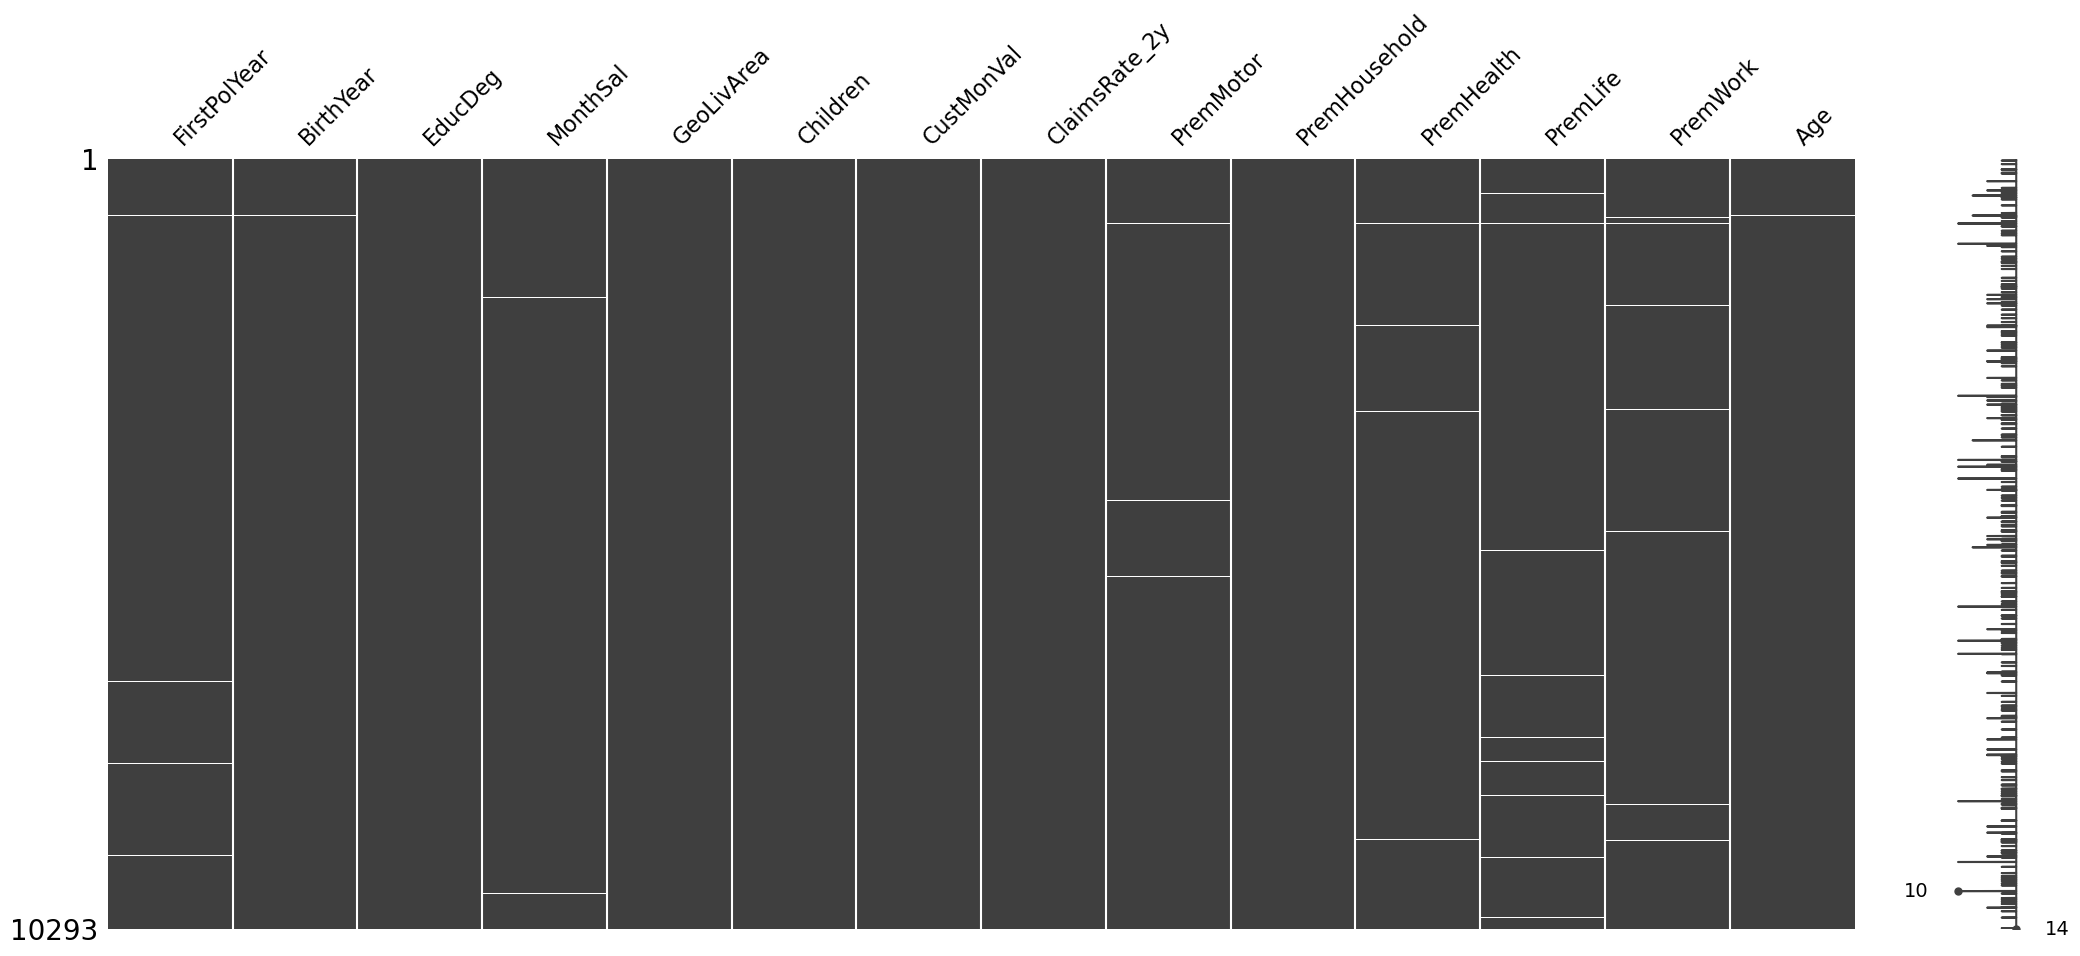

In [48]:
msno.matrix(df_knn)

#### KNN

In [49]:
df_knn.EducDeg.value_counts()

3.0    4799
2.0    3507
1.0    1272
4.0     698
nan      17
Name: EducDeg, dtype: int64

In [50]:
# fill missing values with median:
#df_missing_median.fillna(df_missing_median.median(), inplace=True)
#df_missing_median.isna().sum()


In [51]:
# KNNImputer - only works for numerical variables
imputer = KNNImputer(n_neighbors=6, weights="uniform")
df_knn[df_knn.columns] = imputer.fit_transform(df_knn)

In [52]:
df_knn["EducDeg"] = round(df_knn["EducDeg"]).astype("str")

In [53]:
df_knn["GeoLivArea"] = round(df_knn["GeoLivArea"]).astype("str")


### Result

In [54]:
df_knn.isna().sum()

FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate_2y    0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
Age              0
dtype: int64

In [55]:
df_knn.columns

Index(['FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal', 'GeoLivArea',
       'Children', 'CustMonVal', 'ClaimsRate_2y', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork', 'Age'],
      dtype='object')

## 3. Managing Outliers

In [56]:
metric_features

['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate_2y',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

### a) Definition & Overview

In [57]:
# we have 2 possibilities: either manual handling or IQR handling:
df_outlier_m = df_knn.copy()
df_outlier_iqr=df_knn.copy()

In [58]:
def display_boxplots(df_outlier_m):
         #def display_boxplots(df, metric_features):
     # All Numeric Variables' Box Plots in one figure
     sns.set()

         # Prepare figure. Create individual axes where each box plot will be placed
     fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

         # Plot data
         # Iterate across axes objects and associate each box plot (hint: use the ax argument):
     for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
         sns.boxplot(x=df_outlier_m[feat], ax=ax)

         # Layout
         # Add a centered title to the figure:
     title = "Numeric Variables' Box Plots"

     plt.suptitle(title)

     plt.show()

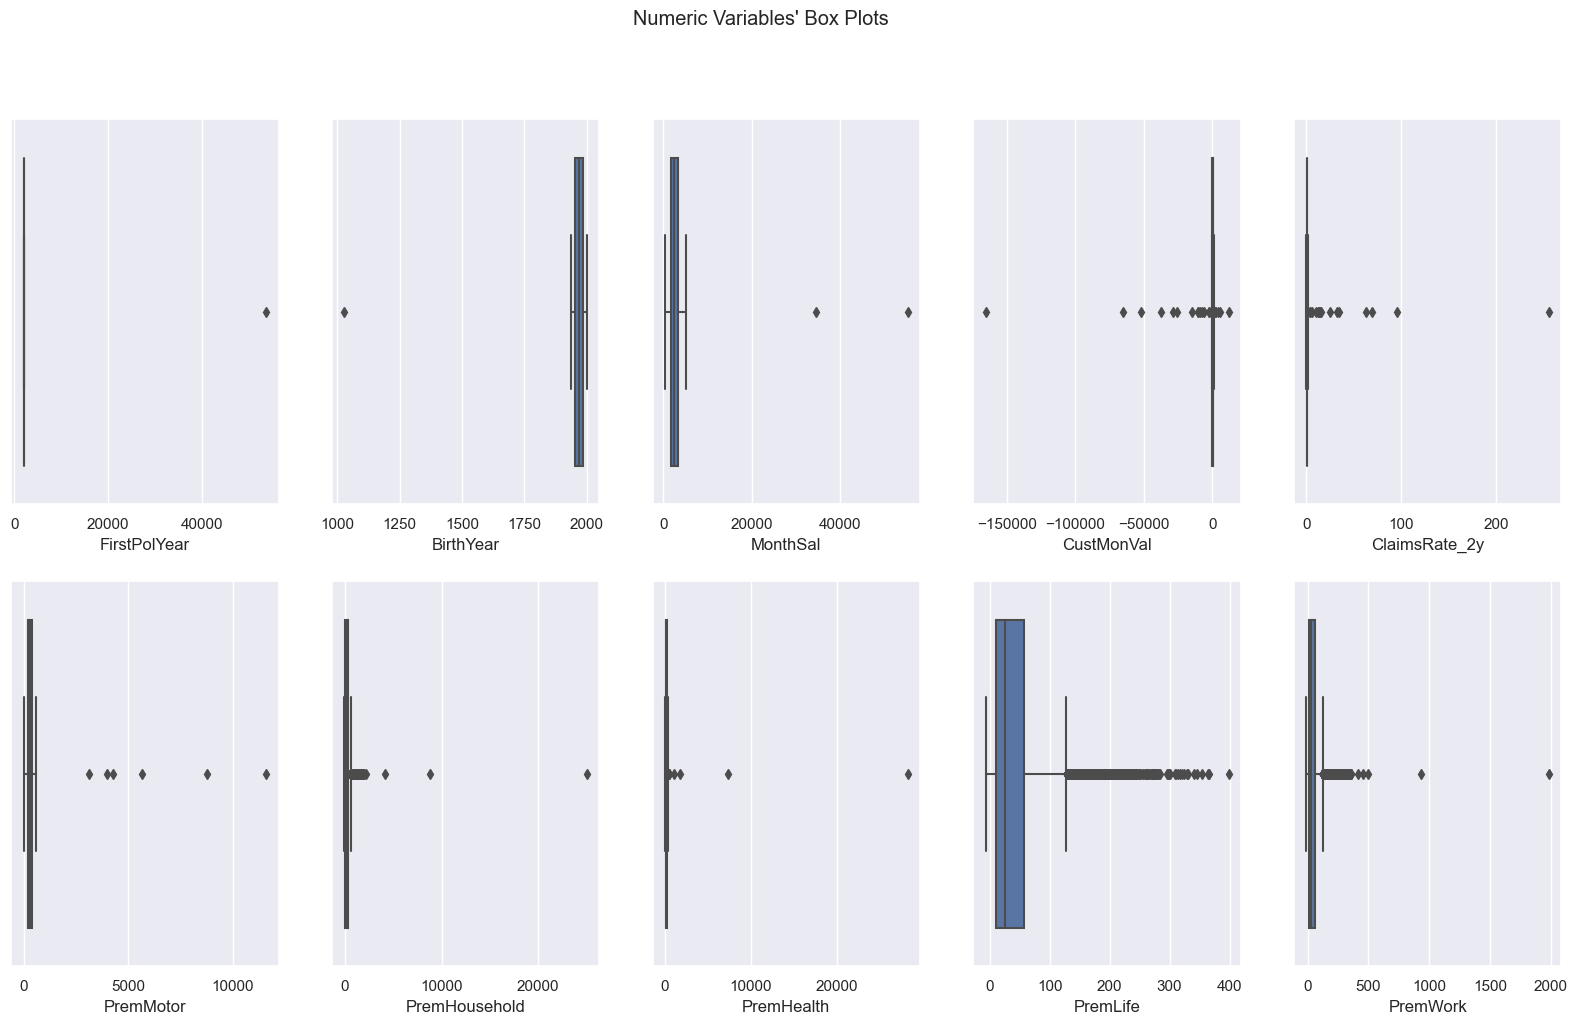

In [59]:
display_boxplots(df_knn)

In [60]:
def display_hist(df):
        # All Numeric Variables' Histograms in one figure
    sns.set()

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
        ax.hist(df[feat])
        ax.set_title(feat, y=-0.13)

    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Histograms"

    plt.suptitle(title)

    plt.show()

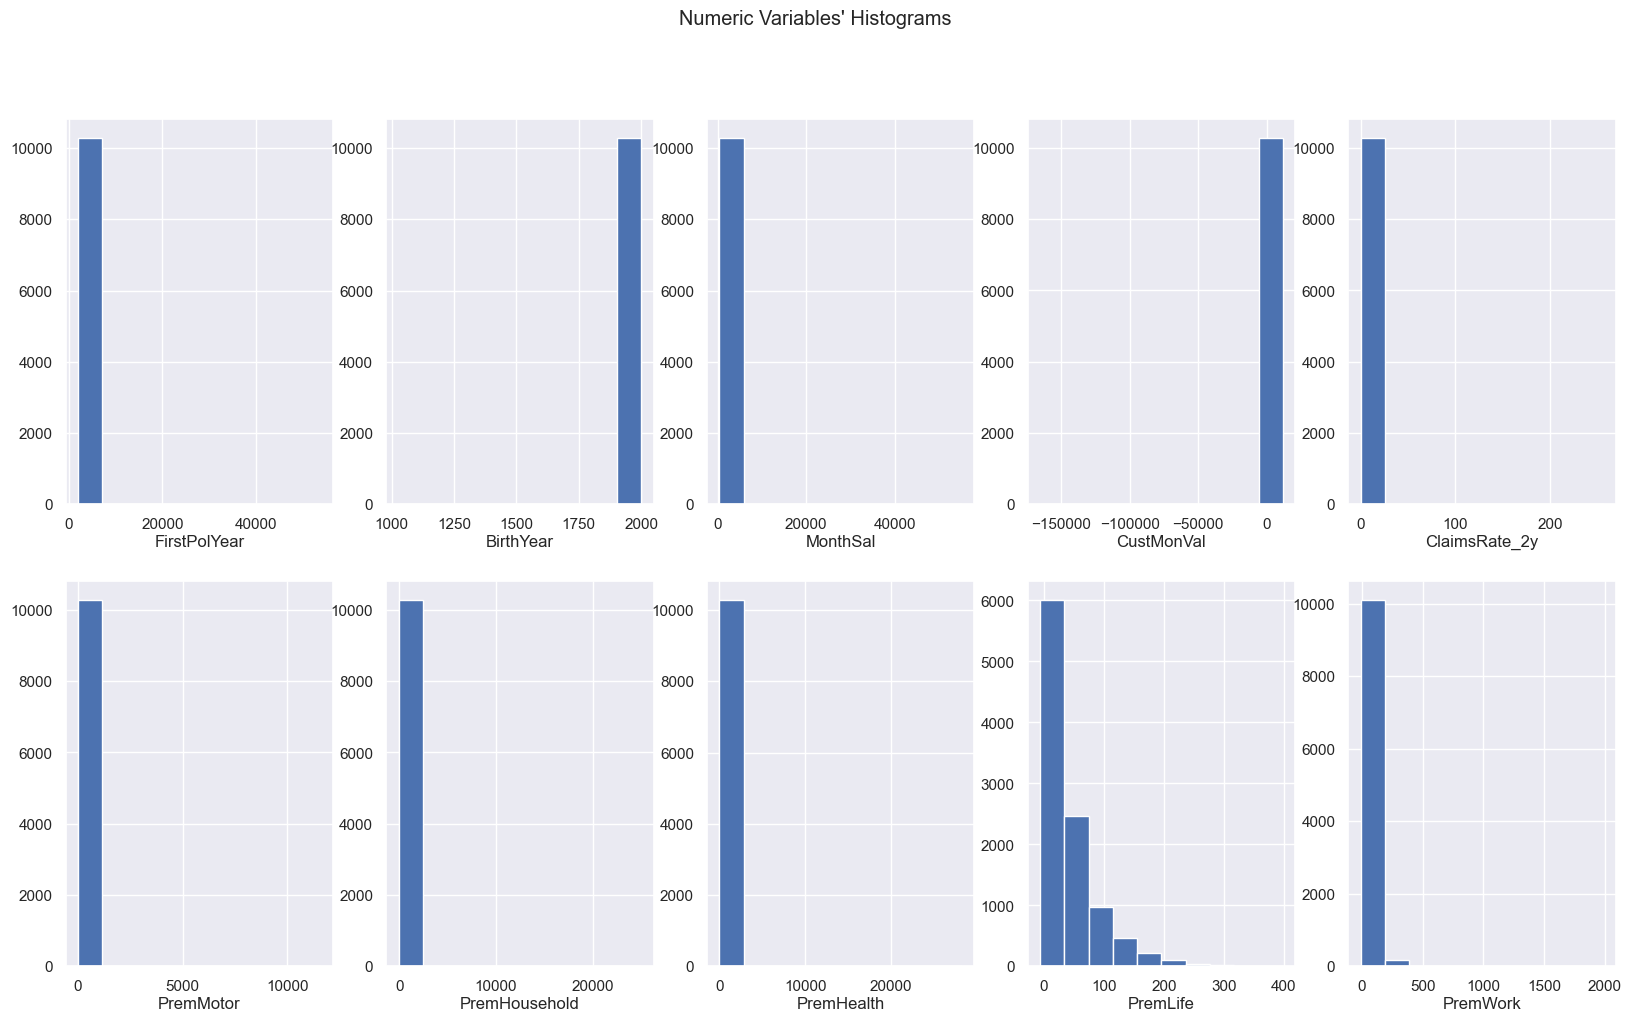

In [61]:
display_hist(df_knn)

### b) Outlier Manual Handling

In [62]:
# def return_number_outliers_removed(var, val, bigger = True):
#     aux = df_outlier_m.loc[df_outlier_m[var] < val]
#     print("Will remove", df_outlier_m.loc[df_outlier_m[var] > val].shape[0], "row(s) for", var)
#     #sns.boxplot(data = aux, x = var)

In [63]:
# return_number_outliers_removed("MonthSal", 20000)
# return_number_outliers_removed("ClaimsRate_2y", 4)
# return_number_outliers_removed("PremMotor", 1800)
# return_number_outliers_removed("PremHousehold", 2000)
# return_number_outliers_removed("PremHealth", 750)
# return_number_outliers_removed("PremWork", 750)
# return_number_outliers_removed("Age", 90)
# return_number_outliers_removed("FirstPolYear", 2500)

In [64]:
#manual filter
def outlier_filter_manual(df):
    filters = ((df.MonthSal < 7000) & 
              (df.ClaimsRate_2y <4) & 
              (df.PremMotor < 1800) & 
              (df.PremHousehold < 1200) & 
              (df.PremHealth < 450) & 
              (df.PremWork < 250) & 
              (df.Age < 90) &
              (df.CustMonVal > -2000) & (df.CustMonVal < 1200) &
              (df.FirstPolYear < 3000) &
              (df.PremLife < 250))
    
    df_filter=df[filters]
    return df_filter

In [65]:
df_outlier_m = outlier_filter_manual(df_outlier_m)

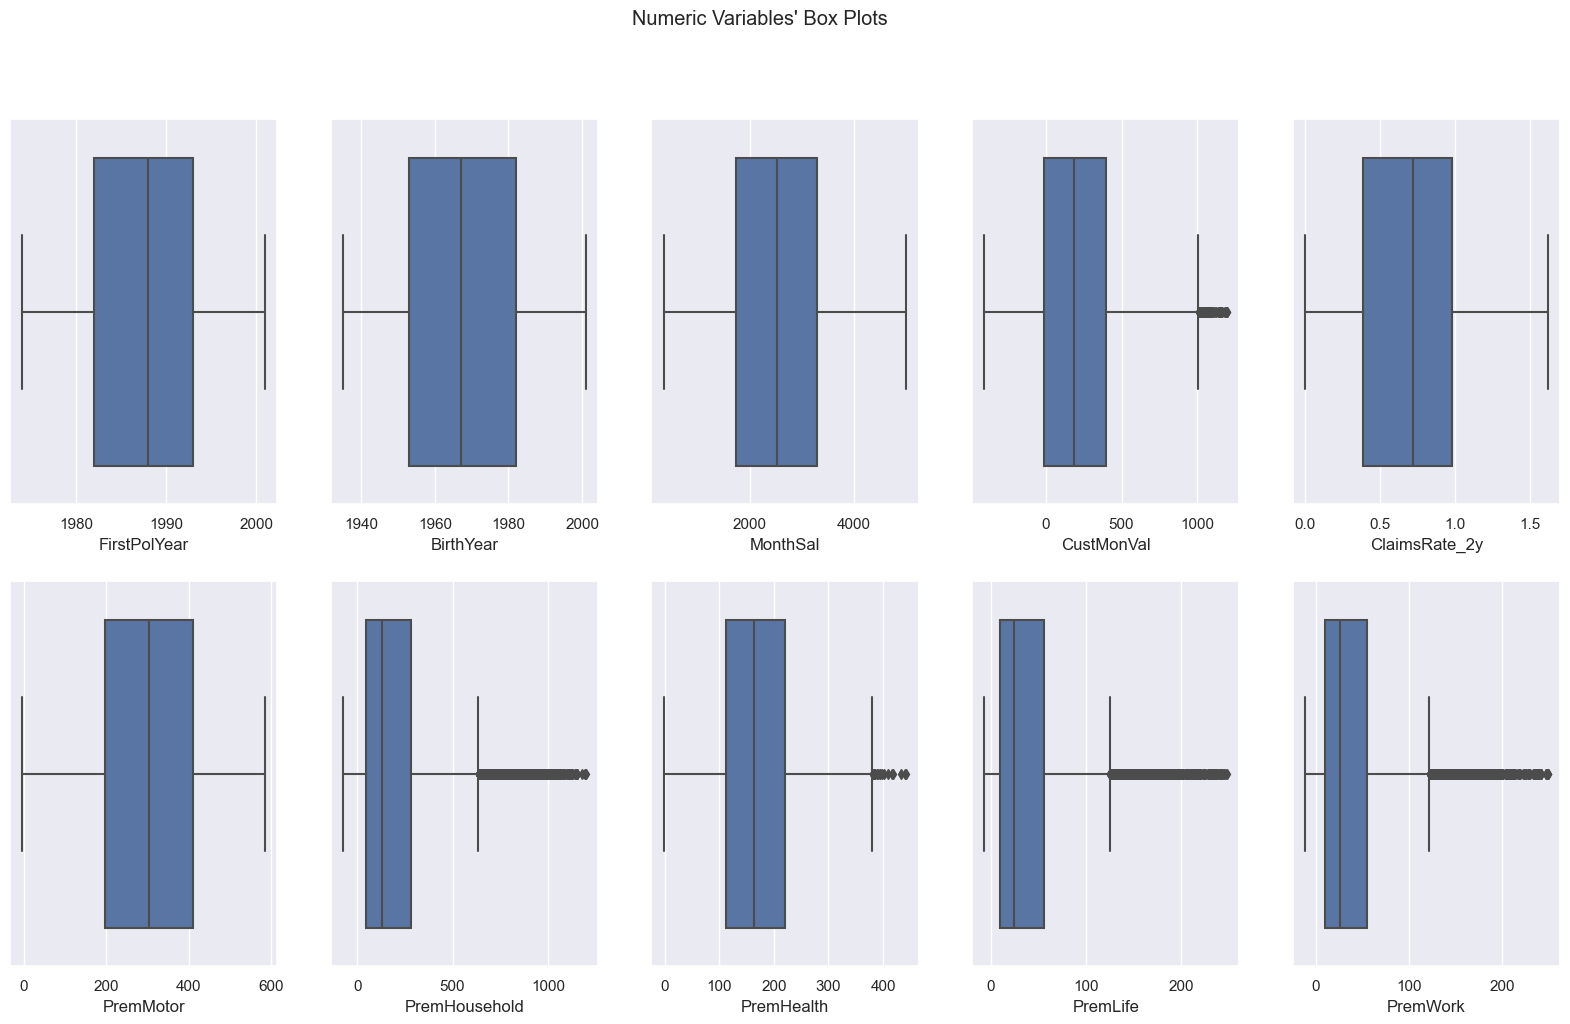

In [66]:
display_boxplots(df_outlier_m)

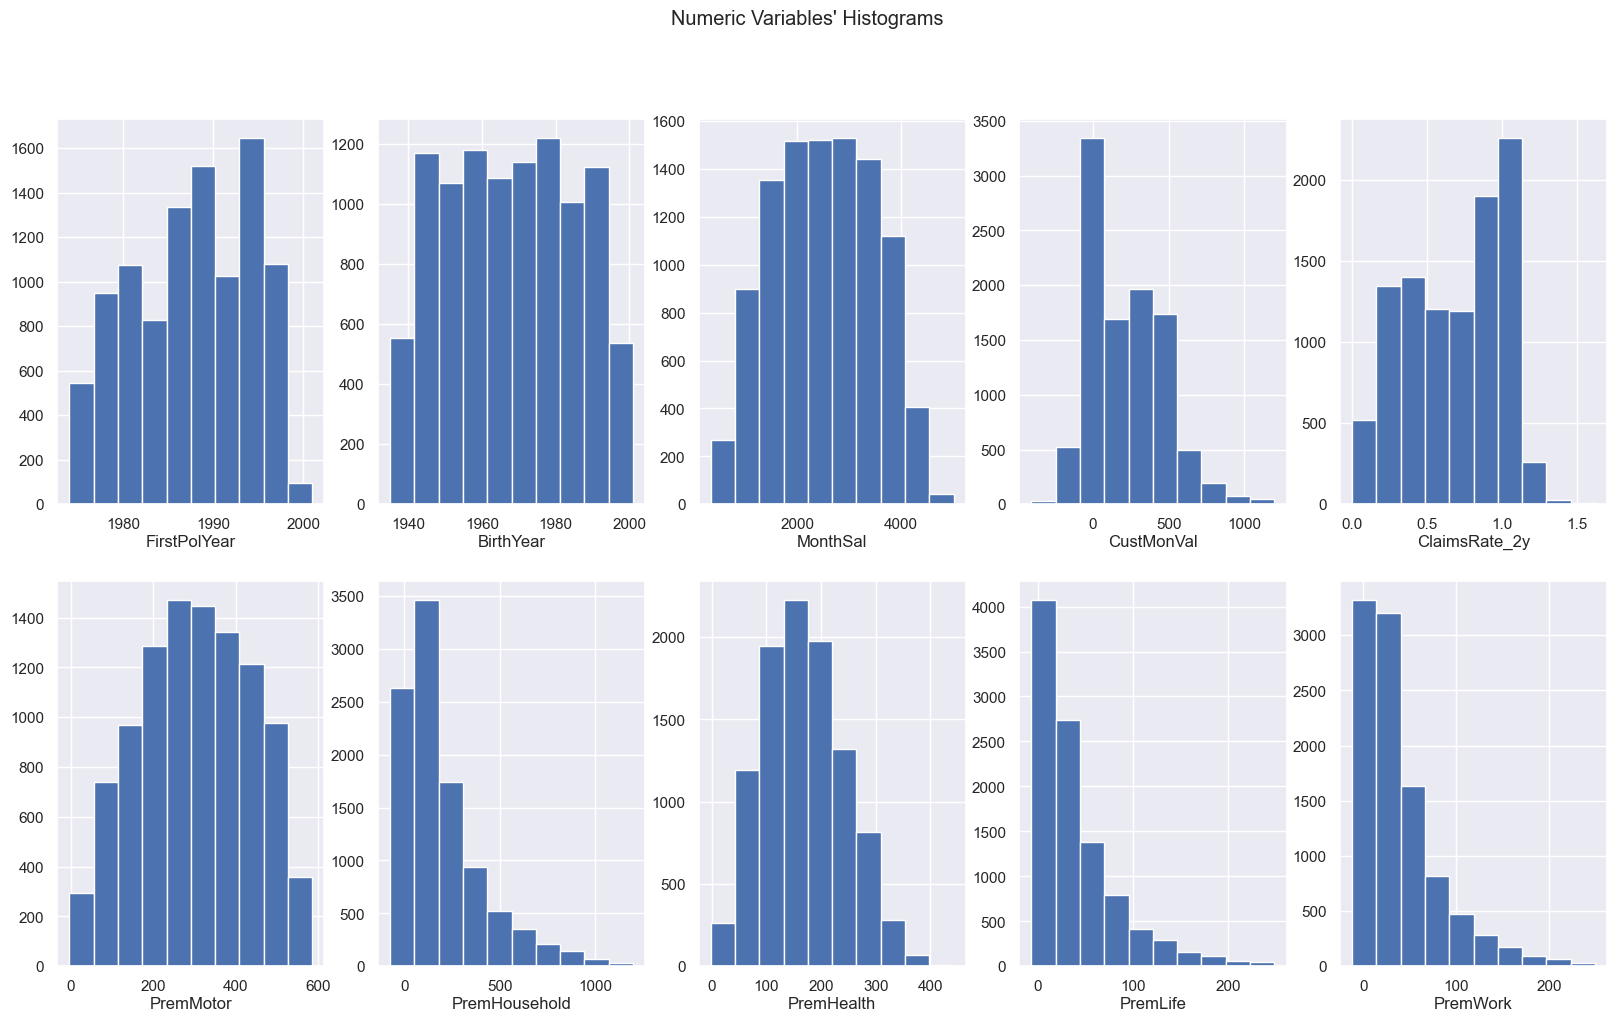

In [67]:
display_hist(df_outlier_m)

In [68]:
#print("The % of deleted rows in the dataset until now (duplicated + incoherences + outliers) is of", (len(df) - len(df_outlier_m))/len(df) *100, "%.")

In [69]:
df_outlier_m.describe()

FirstPolYear     BirthYear      MonthSal      Children    CustMonVal  \
count  10101.000000  10101.000000  10101.000000  10101.000000  10101.000000   
mean    1987.531796   1967.729581   2517.777134      0.706927    214.407548   
std        6.499436     17.190771    974.185015      0.455031    247.444896   
min     1974.000000   1935.000000    333.000000      0.000000   -406.070000   
25%     1982.000000   1953.000000   1741.000000      0.000000     -9.220000   
50%     1988.000000   1967.000000   2524.000000      1.000000    185.820000   
75%     1993.000000   1982.000000   3297.000000      1.000000    397.400000   
max     2001.000000   2001.000000   5021.000000      1.000000   1197.220000   

       ClaimsRate_2y     PremMotor  PremHousehold    PremHealth      PremLife  \
count   10101.000000  10101.000000   10101.000000  10101.000000  10101.000000   
mean        0.680721    300.980002     198.609910    168.866098     40.092211   
std         0.316994    135.627343     218.033649     74.054300     43.764379   
min         0.000000     -4.110000     -75.000000     -2.110000     -7.000000   
25%         0.390000    197.370000      48.900000    112.910000      9.890000   
50%         0.720000    303.170000     131.700000    163.920000     24.670000   
75%         0.980000    409.410000     283.400000    219.930000     56.010000   
max         1.620000    585.220000    1198.000000    442.860000    248.270000   

           PremWork           Age  
count  10101.000000  10101.000000  
mean      39.236739     48.270419  
std       42.780784     17.190771  
min      -12.000000     15.000000  
25%       10.000000     34.000000  
50%       25.450000     49.000000  
75%       54.900000     63.000000  
max      249.490000     81.000000

### c) Outlier Automatic Handling

#### Quantile

In [70]:
def iqr(df):
    q25 = df.quantile(.25)
    q75 = df.quantile(.75)
    iqr = (q75 - q25)

    upper_lim = q75 + 2 * iqr
    lower_lim = q25 - 2 * iqr

    filters2 = []
    for metric in metric_features:
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        filters2.append((df[metric].between(llim, ulim, inclusive=True)) | (df[metric].isna()))

    filters2 = pd.Series(np.all(filters2, 0))
    filters2.index = df.index

    print("The % of deleted rows in the dataset is of", (len(df) - sum(filters2))/len(df) *100, "%.")
    df = df.loc[filters2]
    return df

In [71]:
df_outlier_iqr = iqr(df_outlier_iqr)

The % of deleted rows in the dataset is of 9.851355290002916 %.


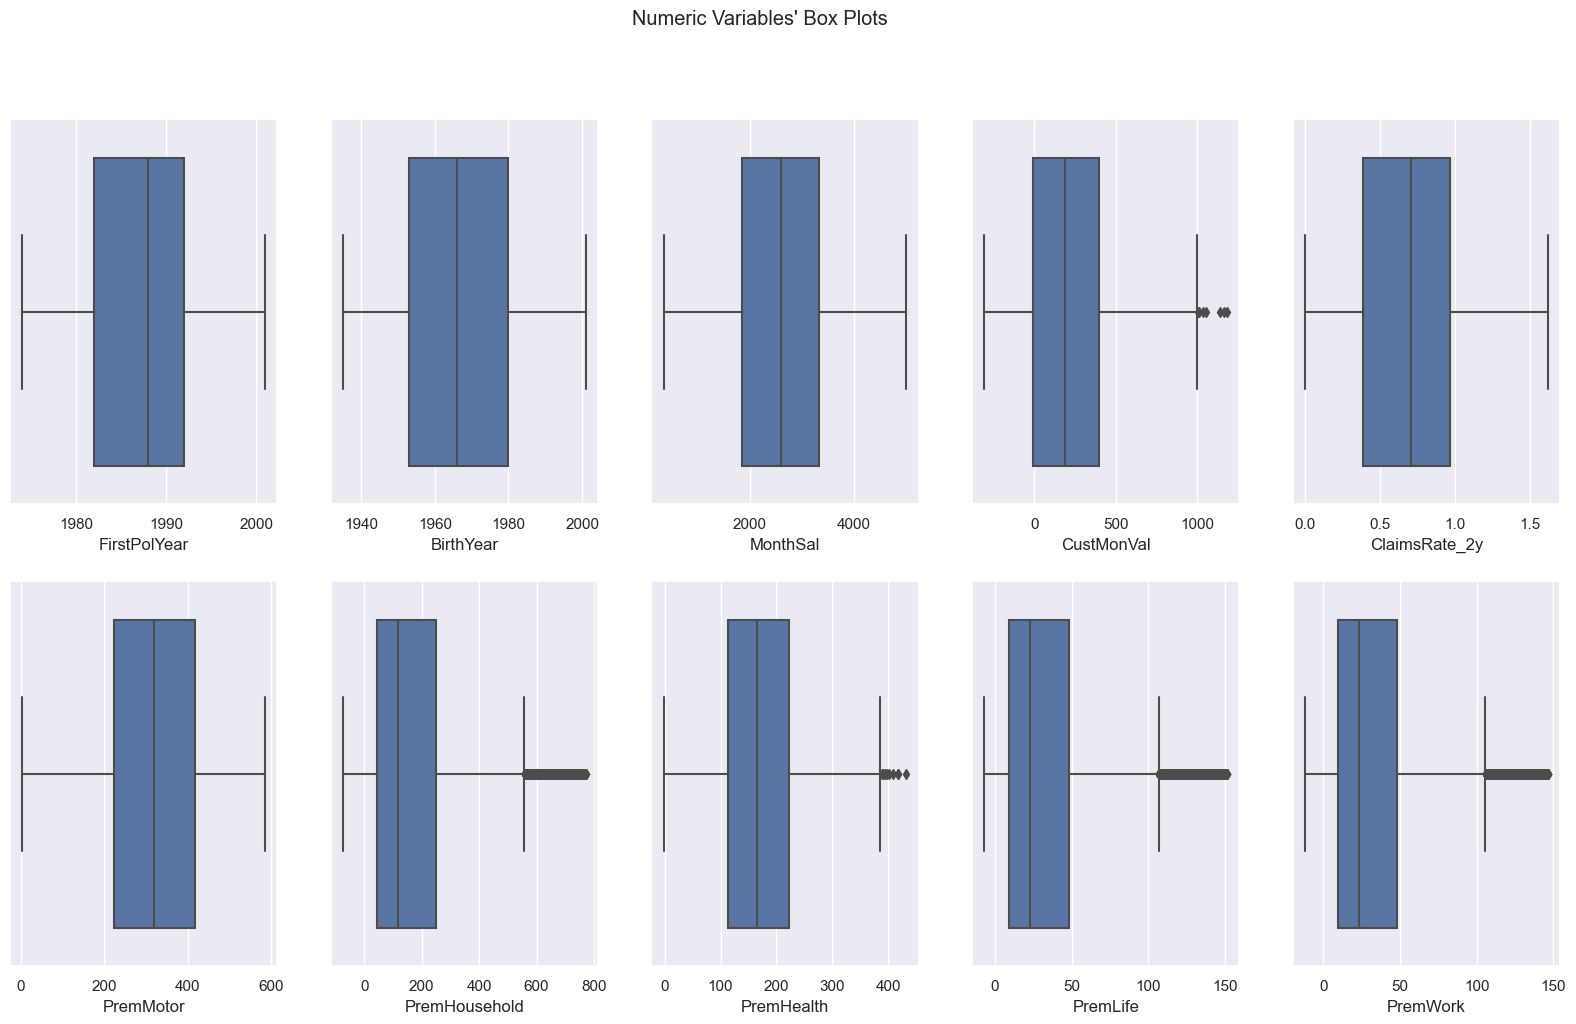

In [72]:
display_boxplots(df_outlier_iqr)

In [73]:
#df_outlier_iqr
df_outlier_m

FirstPolYear  BirthYear EducDeg  MonthSal GeoLivArea  Children  \
CustID                                                                   
1             1985.0     1982.0     2.0    2177.0        1.0       1.0   
2             1995.0     1995.0     2.0     677.0        4.0       1.0   
3             1991.0     1970.0     1.0    2277.0        3.0       0.0   
4             1990.0     1981.0     3.0    1099.0        4.0       1.0   
5             1986.0     1973.0     3.0    1763.0        4.0       1.0   
...              ...        ...     ...       ...        ...       ...   
10291         1999.0     1999.0     1.0     626.0        3.0       1.0   
10292         1984.0     1949.0     4.0    3188.0        2.0       0.0   
10294         1994.0     1976.0     3.0    2918.0        1.0       1.0   
10295         1981.0     1977.0     1.0    1971.0        2.0       1.0   
10296         1990.0     1981.0     4.0    2815.0        1.0       1.0   

        CustMonVal  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1           380.97           0.39     375.85          79.45      146.36   
2          -131.13           1.12      77.46         416.20      116.69   
3           504.67           0.28     206.15         224.50      124.58   
4           -16.99           0.99     182.48          43.35      311.17   
5            35.23           0.90     338.62          47.80      182.59   
...            ...            ...        ...            ...         ...   
10291       176.26           0.85       6.89         878.50      103.13   
10292        -0.11           0.96     393.74          49.45      173.81   
10294       524.10           0.21     403.63         132.80      142.25   
10295       250.05           0.65     188.59         211.15      198.37   
10296       463.75           0.27     414.08          94.45      141.25   

        PremLife  PremWork   Age  
CustID                            
1          47.01     16.89  34.0  
2         194.48    106.13  21.0  
3          86.35     99.02  46.0  
4          35.34     28.34  35.0  
5          18.78     41.45  43.0  
...          ...       ...   ...  
10291     113.02    201.26  17.0  
10292       9.78     14.78  67.0  
10294      12.67      4.89  40.0  
10295      63.90    112.91  39.0  
10296       6.89     12.89  35.0  

[10101 rows x 14 columns]

We proceed with manual filtering.

### c) DBSCAN for outliers


In [74]:
df_dbscan = df_knn.copy()
df_outlier=df_knn.copy()

In [75]:
from collections import Counter

dbscan = DBSCAN(eps=200, min_samples = len(metric_features), n_jobs = -1)
dbscan_labels = dbscan.fit_predict(df_dbscan[metric_features])
Counter(dbscan_labels)

Counter({0: 9804, -1: 482, 1: 7})

In [76]:
# saving the outliers
dbscan_outliers = df_outlier[dbscan_labels == -1].copy()

# saving the good observations
df_dbscan = df_outlier[dbscan_labels != -1].copy()

print('Percentage of data kept after removing outliers:', np.round(df_dbscan.shape[0] / df_outlier.shape[0] * 100, 4))

Percentage of data kept after removing outliers: 95.3172


# IV. Feature Engineering

factors influencing CAR insurance: 
1. Age
2. history
3. Credit score
4. Years of driving experience
5. Gender
6. insurance history ( lack of continuous coverage as an indicator of higher risk. )
7. Claims history
8. maritial status / children 


## 1. Overview and Definition

In [77]:
df_fe = df_outlier_m.copy()
df_fe_non_obj = df_fe.loc[:, ~df_fe.columns.isin(['GeoLivArea', 'EducDeg'])]

In [78]:
# This should be part of 3. a) Fixing Struxtural Errors, but was only possible after getting rid of missing values: 

# # change dtypes: 
df_fe = df_fe.astype({"FirstPolYear":'int', "Age":'int', "MonthSal":'int', "Children":'bool', 'EducDeg':'str'}) 

## 2. Feature Creation

In [79]:
df_fc = df_fe.copy()

Additional Information: 

1. FirstPolicy: May be considered as the first year as a customer
2. BirthYear: The current year of the database is 2016
3. Living Area: No further information provided about the meaning of the area codes
4. Customer Monetary Value: Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
5. Claims Rate: Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
6. Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current year, paid in previous one(s).
--> Premium: the amount of money an individual or business pays for an insurance policy. --> premium is a kind of revenue for the insurance

In [80]:
# the amount of time the customer is already a customer:
df_fc['years_as_cust'] = 2016 - df_fc['FirstPolYear']

#adding all premiums together to calculate the total premium for 2016:
df_fc['prem_total_2016'] = df_fc['PremMotor'] + df_fc['PremHousehold'] + df_fc['PremHealth'] + df_fc['PremLife']+ df_fc['PremWork']

# calculating all the premium ratios in comparison to the total premium 
# --> How important is this specific premium for the customer? 
#df_fc['Ratio_Motor'] = df_fc['PremMotor'] / df_fc['prem_total_2016'] 
# df_fc['Ratio_Household'] = df_fc['PremHousehold'] / df_fc['prem_total_2016'] 
# df_fc['Ratio_Health'] = df_fc['PremHealth'] / df_fc['prem_total_2016'] 
# df_fc['Ratio_Life'] = df_fc['PremLife'] / df_fc['prem_total_2016'] 
# df_fc['Ratio_Work'] = df_fc['PremWork'] / df_fc['prem_total_2016']

# calculating the annual salary:
df_fc["annual_salary"] = df_fc["MonthSal"] * 12

# premium_salary_ratio is the amount paid by customer devided through his salary 
df_fc['premium_salary_ratio'] = df_fc['prem_total_2016'] / df_fc["annual_salary"]

# multiply PremTotal2016 by ClaimsRate --> we get an estimate of amount_paid
df_fc['estimate_paid_to_cust_15_16'] = df_fc['prem_total_2016'] * df_fc['ClaimsRate_2y']





#  - HighEducLevel = 1 if (EducDeg = 3.0 or EducDeg = 4.0); else 0
#  - Sum_Reversal = Sum of the negative PremX values
#  - Reversal = 1 if there is 1 or more negative PremX values; else 0

# info about the variables provided in pdf:
# CustMonVal = (annual profit from the customer) X years_cust - (acquisition cost)
# ClaimsRate = Amount paid by the insurance company (€)/ Premiums (€) [2y]
# Premiums (2016). Negative premiums may manifest reversals occurred in the current year, paid in previous one(s).

In [81]:
metric_features.extend(["years_as_cust", "prem_total_2016", "annual_salary", "premium_salary_ratio", "estimate_paid_to_cust_15_16","Age"])
metric_features

['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate_2y',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'years_as_cust',
 'prem_total_2016',
 'annual_salary',
 'premium_salary_ratio',
 'estimate_paid_to_cust_15_16',
 'Age']

In [82]:
# We continue with all new created features
df_fc.columns

Index(['FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal', 'GeoLivArea',
       'Children', 'CustMonVal', 'ClaimsRate_2y', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork', 'Age', 'years_as_cust',
       'prem_total_2016', 'annual_salary', 'premium_salary_ratio',
       'estimate_paid_to_cust_15_16'],
      dtype='object')

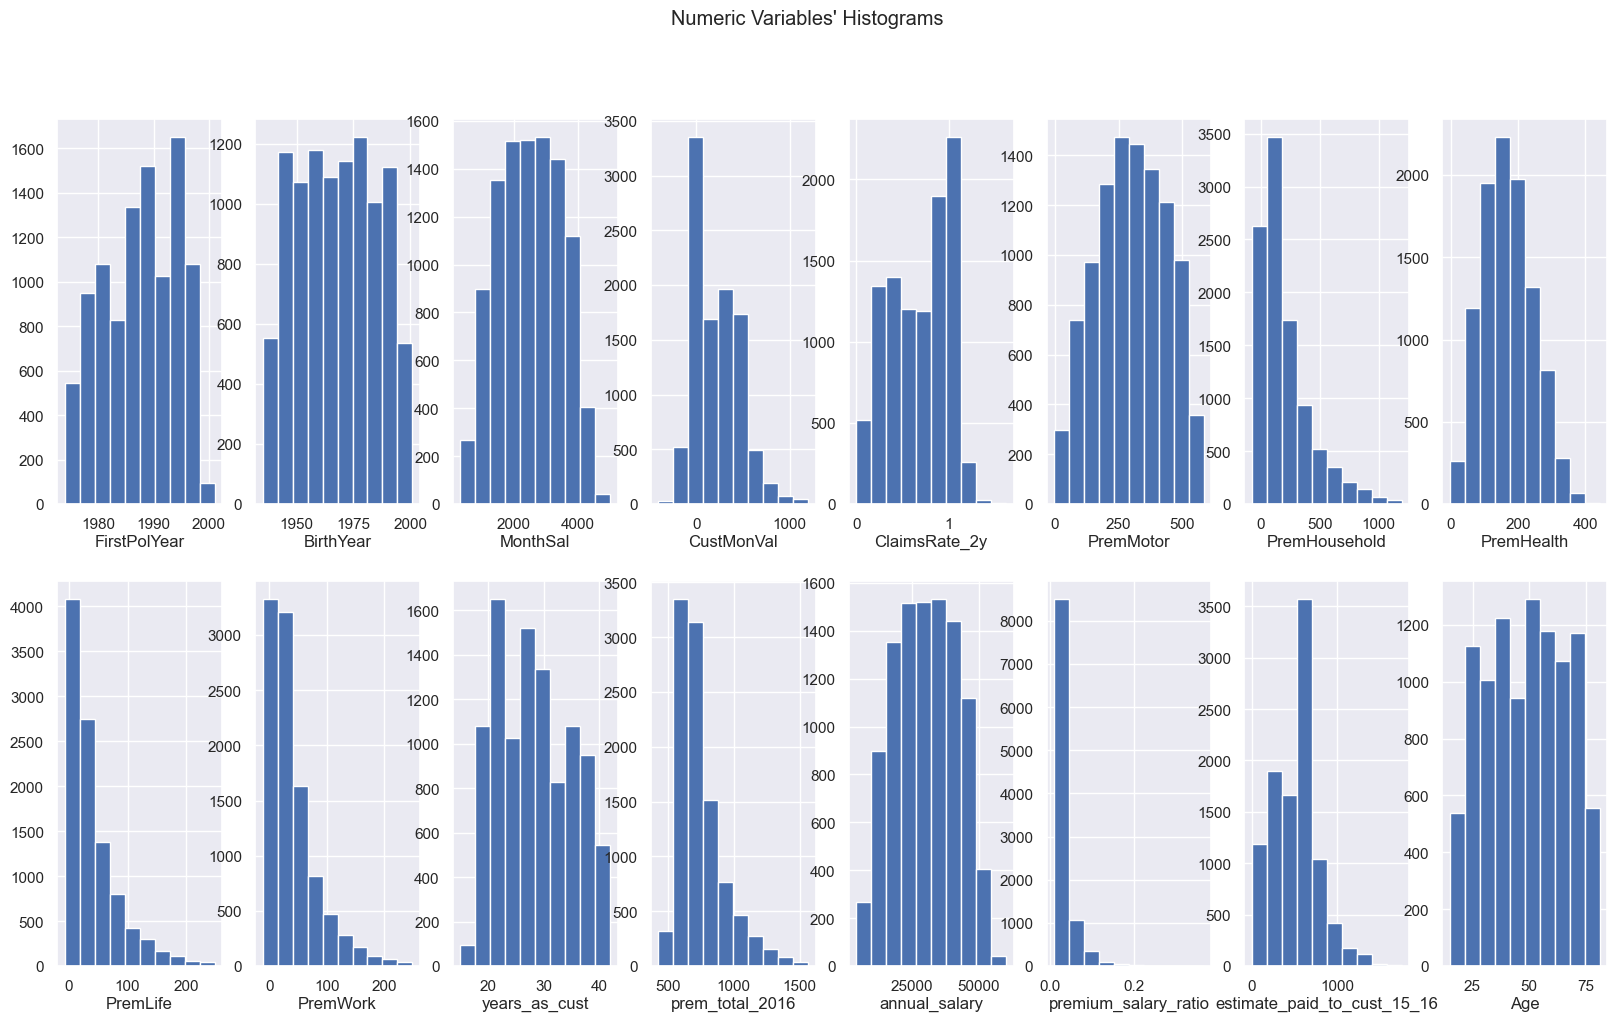

In [83]:
display_hist(df_fc)

In [84]:
df_fc.isna().sum()

FirstPolYear                   0
BirthYear                      0
EducDeg                        0
MonthSal                       0
GeoLivArea                     0
Children                       0
CustMonVal                     0
ClaimsRate_2y                  0
PremMotor                      0
PremHousehold                  0
PremHealth                     0
PremLife                       0
PremWork                       0
Age                            0
years_as_cust                  0
prem_total_2016                0
annual_salary                  0
premium_salary_ratio           0
estimate_paid_to_cust_15_16    0
dtype: int64

## 3. Feature Transformation 

In [85]:
df_fc

FirstPolYear  BirthYear EducDeg  MonthSal GeoLivArea  Children  \
CustID                                                                   
1               1985     1982.0     2.0      2177        1.0      True   
2               1995     1995.0     2.0       677        4.0      True   
3               1991     1970.0     1.0      2277        3.0     False   
4               1990     1981.0     3.0      1099        4.0      True   
5               1986     1973.0     3.0      1763        4.0      True   
...              ...        ...     ...       ...        ...       ...   
10291           1999     1999.0     1.0       626        3.0      True   
10292           1984     1949.0     4.0      3188        2.0     False   
10294           1994     1976.0     3.0      2918        1.0      True   
10295           1981     1977.0     1.0      1971        2.0      True   
10296           1990     1981.0     4.0      2815        1.0      True   

        CustMonVal  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1           380.97           0.39     375.85          79.45      146.36   
2          -131.13           1.12      77.46         416.20      116.69   
3           504.67           0.28     206.15         224.50      124.58   
4           -16.99           0.99     182.48          43.35      311.17   
5            35.23           0.90     338.62          47.80      182.59   
...            ...            ...        ...            ...         ...   
10291       176.26           0.85       6.89         878.50      103.13   
10292        -0.11           0.96     393.74          49.45      173.81   
10294       524.10           0.21     403.63         132.80      142.25   
10295       250.05           0.65     188.59         211.15      198.37   
10296       463.75           0.27     414.08          94.45      141.25   

        PremLife  PremWork  Age  years_as_cust  prem_total_2016  \
CustID                                                            
1          47.01     16.89   34             31           665.56   
2         194.48    106.13   21             21           910.96   
3          86.35     99.02   46             25           740.60   
4          35.34     28.34   35             26           600.68   
5          18.78     41.45   43             30           629.24   
...          ...       ...  ...            ...              ...   
10291     113.02    201.26   17             17          1302.80   
10292       9.78     14.78   67             32           641.56   
10294      12.67      4.89   40             22           696.24   
10295      63.90    112.91   39             35           774.92   
10296       6.89     12.89   35             26           669.56   

        annual_salary  premium_salary_ratio  estimate_paid_to_cust_15_16  
CustID                                                                    
1               26124              0.025477                     259.5684  
2                8124              0.112132                    1020.2752  
3               27324              0.027104                     207.3680  
4               13188              0.045547                     594.6732  
5               21156              0.029743                     566.3160  
...               ...                   ...                          ...  
10291            7512              0.173429                    1107.3800  
10292           38256              0.016770                     615.8976  
10294           35016              0.019883                     146.2104  
10295           23652              0.032763                     503.6980  
10296           33780              0.019821                     180.7812  

[10101 rows x 19 columns]

In [86]:
df_ft=df_fc.copy()

In [87]:
df_ft.isna().sum()

FirstPolYear                   0
BirthYear                      0
EducDeg                        0
MonthSal                       0
GeoLivArea                     0
Children                       0
CustMonVal                     0
ClaimsRate_2y                  0
PremMotor                      0
PremHousehold                  0
PremHealth                     0
PremLife                       0
PremWork                       0
Age                            0
years_as_cust                  0
prem_total_2016                0
annual_salary                  0
premium_salary_ratio           0
estimate_paid_to_cust_15_16    0
dtype: int64

### a) LogTransformation
As most of the distributions are skewed, we will apply log transformation before scalling.
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

We need to take into consideration that, to **interpret** cluster solutions mean and similar, we can't read the data as it is because of the transformations

In [88]:
df_log=df_ft.copy()
df_log.columns

Index(['FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal', 'GeoLivArea',
       'Children', 'CustMonVal', 'ClaimsRate_2y', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork', 'Age', 'years_as_cust',
       'prem_total_2016', 'annual_salary', 'premium_salary_ratio',
       'estimate_paid_to_cust_15_16'],
      dtype='object')

In [89]:
df_ft.describe()

FirstPolYear     BirthYear      MonthSal    CustMonVal  ClaimsRate_2y  \
count  10101.000000  10101.000000  10101.000000  10101.000000   10101.000000   
mean    1987.530443   1967.729581   2517.775666    214.407548       0.680721   
std        6.499550     17.190771    974.185072    247.444896       0.316994   
min     1974.000000   1935.000000    333.000000   -406.070000       0.000000   
25%     1982.000000   1953.000000   1741.000000     -9.220000       0.390000   
50%     1988.000000   1967.000000   2524.000000    185.820000       0.720000   
75%     1993.000000   1982.000000   3297.000000    397.400000       0.980000   
max     2001.000000   2001.000000   5021.000000   1197.220000       1.620000   

          PremMotor  PremHousehold    PremHealth      PremLife      PremWork  \
count  10101.000000   10101.000000  10101.000000  10101.000000  10101.000000   
mean     300.980002     198.609910    168.866098     40.092211     39.236739   
std      135.627343     218.033649     74.054300     43.764379     42.780784   
min       -4.110000     -75.000000     -2.110000     -7.000000    -12.000000   
25%      197.370000      48.900000    112.910000      9.890000     10.000000   
50%      303.170000     131.700000    163.920000     24.670000     25.450000   
75%      409.410000     283.400000    219.930000     56.010000     54.900000   
max      585.220000    1198.000000    442.860000    248.270000    249.490000   

                Age  years_as_cust  prem_total_2016  annual_salary  \
count  10101.000000   10101.000000      10101.00000   10101.000000   
mean      48.269676      28.469557        747.78496   30213.307989   
std       17.190607       6.499550        177.29055   11690.220868   
min       15.000000      15.000000        429.19000    3996.000000   
25%       34.000000      23.000000        626.24000   20892.000000   
50%       49.000000      28.000000        696.68000   30288.000000   
75%       63.000000      34.000000        819.16000   39564.000000   
max       81.000000      42.000000       1565.28000   60252.000000   

       premium_salary_ratio  estimate_paid_to_cust_15_16  
count          10101.000000                 10101.000000  
mean               0.032193                   507.248020  
std                0.027813                   263.021736  
min                0.009789                     0.000000  
25%                0.017788                   295.110000  
50%                0.023036                   545.977600  
75%                0.034991                   646.052400  
max                0.365061                  1755.058500

In [90]:
variables_for_log=['PremHousehold','PremHealth', 'PremLife', 'PremWork','years_as_cust','prem_total_2016','estimate_paid_to_cust_15_16']

In [91]:
df_log[variables_for_log] = np.log(df_log[variables_for_log]+76)

In [92]:
df_log.isna().sum()

FirstPolYear                   0
BirthYear                      0
EducDeg                        0
MonthSal                       0
GeoLivArea                     0
Children                       0
CustMonVal                     0
ClaimsRate_2y                  0
PremMotor                      0
PremHousehold                  0
PremHealth                     0
PremLife                       0
PremWork                       0
Age                            0
years_as_cust                  0
prem_total_2016                0
annual_salary                  0
premium_salary_ratio           0
estimate_paid_to_cust_15_16    0
dtype: int64

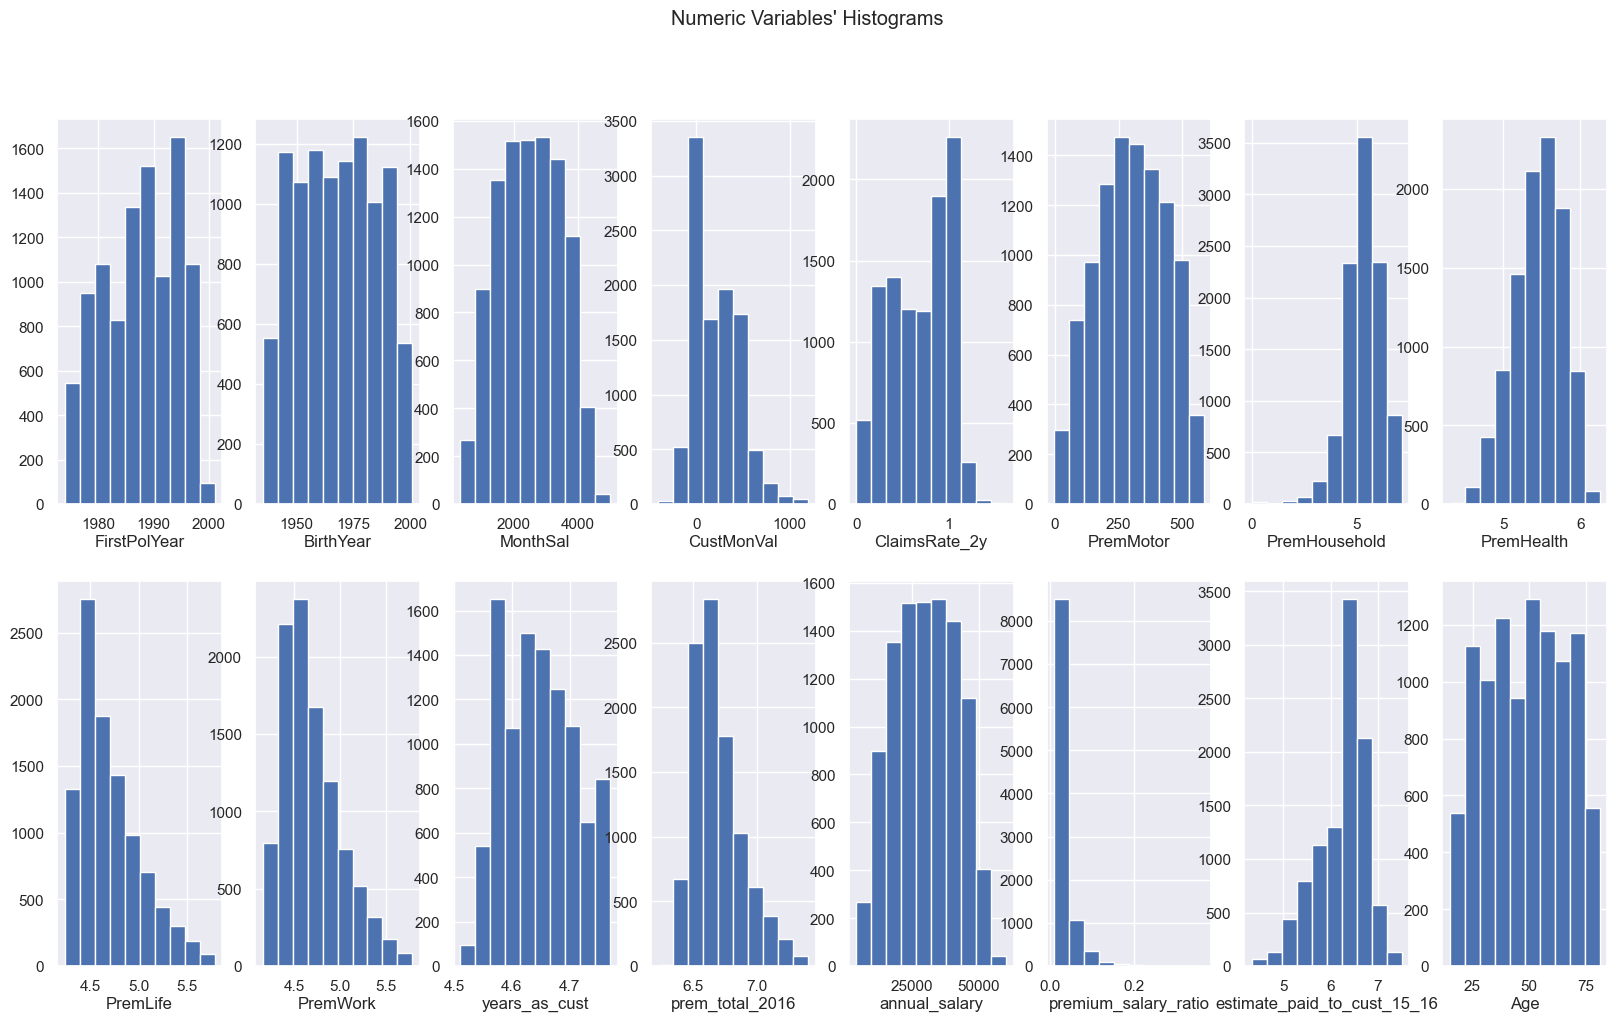

In [93]:
display_hist(df_log)

### b) MinMax Scaler


In [94]:
df_scal=df_log.copy()

In [95]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_scal[metric_features])
scaled_feat

df_scal[metric_features] = scaled_feat
df_scal.describe().T

count      mean       std  min       25%  \
FirstPolYear                 10101.0  0.501128  0.240724  0.0  0.296296   
BirthYear                    10101.0  0.495903  0.260466  0.0  0.272727   
MonthSal                     10101.0  0.466036  0.207804  0.0  0.300341   
CustMonVal                   10101.0  0.387003  0.154336  0.0  0.247522   
ClaimsRate_2y                10101.0  0.420198  0.195675  0.0  0.240741   
PremMotor                    10101.0  0.517690  0.230138  0.0  0.341880   
PremHousehold                10101.0  0.741601  0.120466  0.0  0.675185   
PremHealth                   10101.0  0.589933  0.163053  0.0  0.481614   
PremLife                     10101.0  0.299824  0.206344  0.0  0.141496   
PremWork                     10101.0  0.327569  0.195442  0.0  0.181662   
Age                          10101.0  0.504086  0.260464  0.0  0.287879   
years_as_cust                10101.0  0.523863  0.238389  0.0  0.324296   
prem_total_2016              10101.0  0.397891  0.165144  0.0  0.279506   
annual_salary                10101.0  0.466036  0.207804  0.0  0.300341   
premium_salary_ratio         10101.0  0.063062  0.078287  0.0  0.022516   
estimate_paid_to_cust_15_16  10101.0  0.602131  0.167187  0.0  0.498368   

                                  50%       75%  max  
FirstPolYear                 0.518519  0.703704  1.0  
BirthYear                    0.484848  0.712121  1.0  
MonthSal                     0.467363  0.632253  1.0  
CustMonVal                   0.369172  0.501138  1.0  
ClaimsRate_2y                0.444444  0.604938  1.0  
PremMotor                    0.521406  0.701678  1.0  
PremHousehold                0.746316  0.823008  1.0  
PremHealth                   0.604255  0.711906  1.0  
PremLife                     0.244103  0.419246  1.0  
PremWork                     0.283245  0.439947  1.0  
Age                          0.515152  0.727273  1.0  
years_as_cust                0.513928  0.729802  1.0  
prem_total_2016              0.360631  0.485504  1.0  
annual_salary                0.467363  0.632253  1.0  
premium_salary_ratio         0.037288  0.070938  1.0  
estimate_paid_to_cust_15_16  0.660662  0.707550  1.0

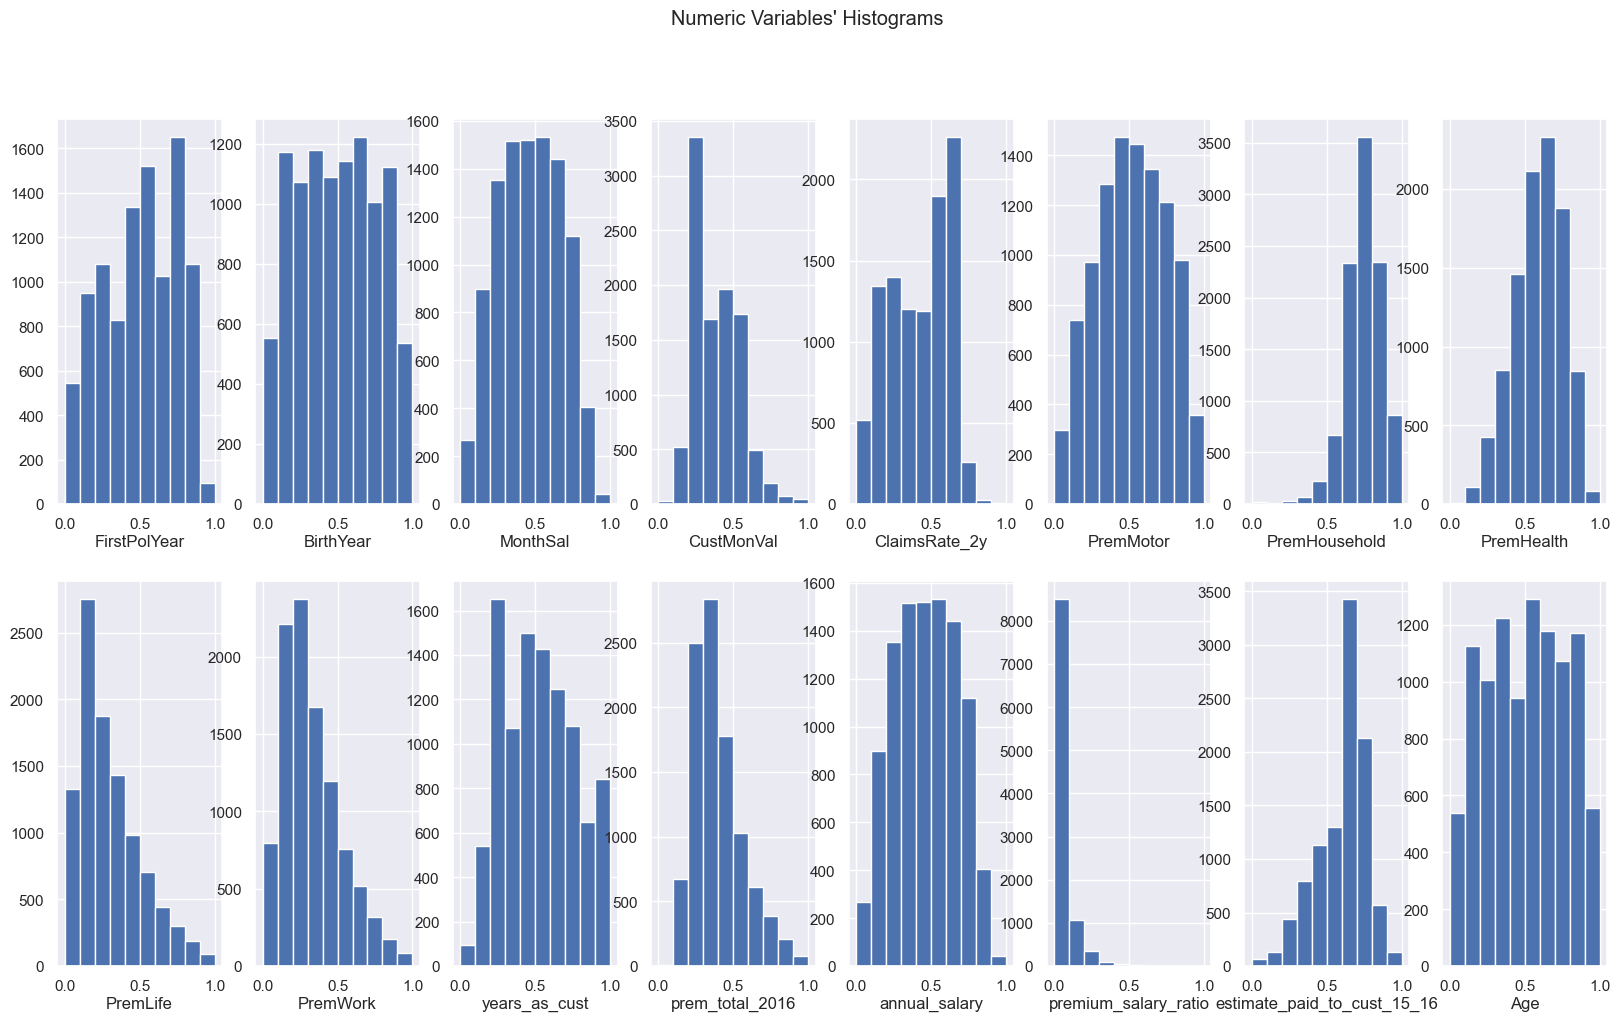

In [96]:
display_hist(df_scal)

### c) Dummy Encoding


In [97]:
df_encoded = df_scal.copy()

In [98]:
df_encoded["Children"] = df_encoded["Children"].astype("int")

In [99]:
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

## V. Dimensionality Reduction

In [100]:
df_dr = df_encoded.copy()

### a) Correlation analysis

In [101]:
df_corr = df_dr.copy()

In [102]:
def cor_heatmap(cor):
    plt.figure(figsize=(30,20))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

1. Perfect correlation 
    - custmonval // ClaimsRate // estimate_paid_to_cust
    - annual_sal // month_sal
    - Age // birth
    - Years_as_cust // 

Variables to go
- Prem motor (corr < -0.7)
- Custmonval (more correlated with other vars than Claims rate) -0.9
- Age // Anual sallary // month sall , drop sallary

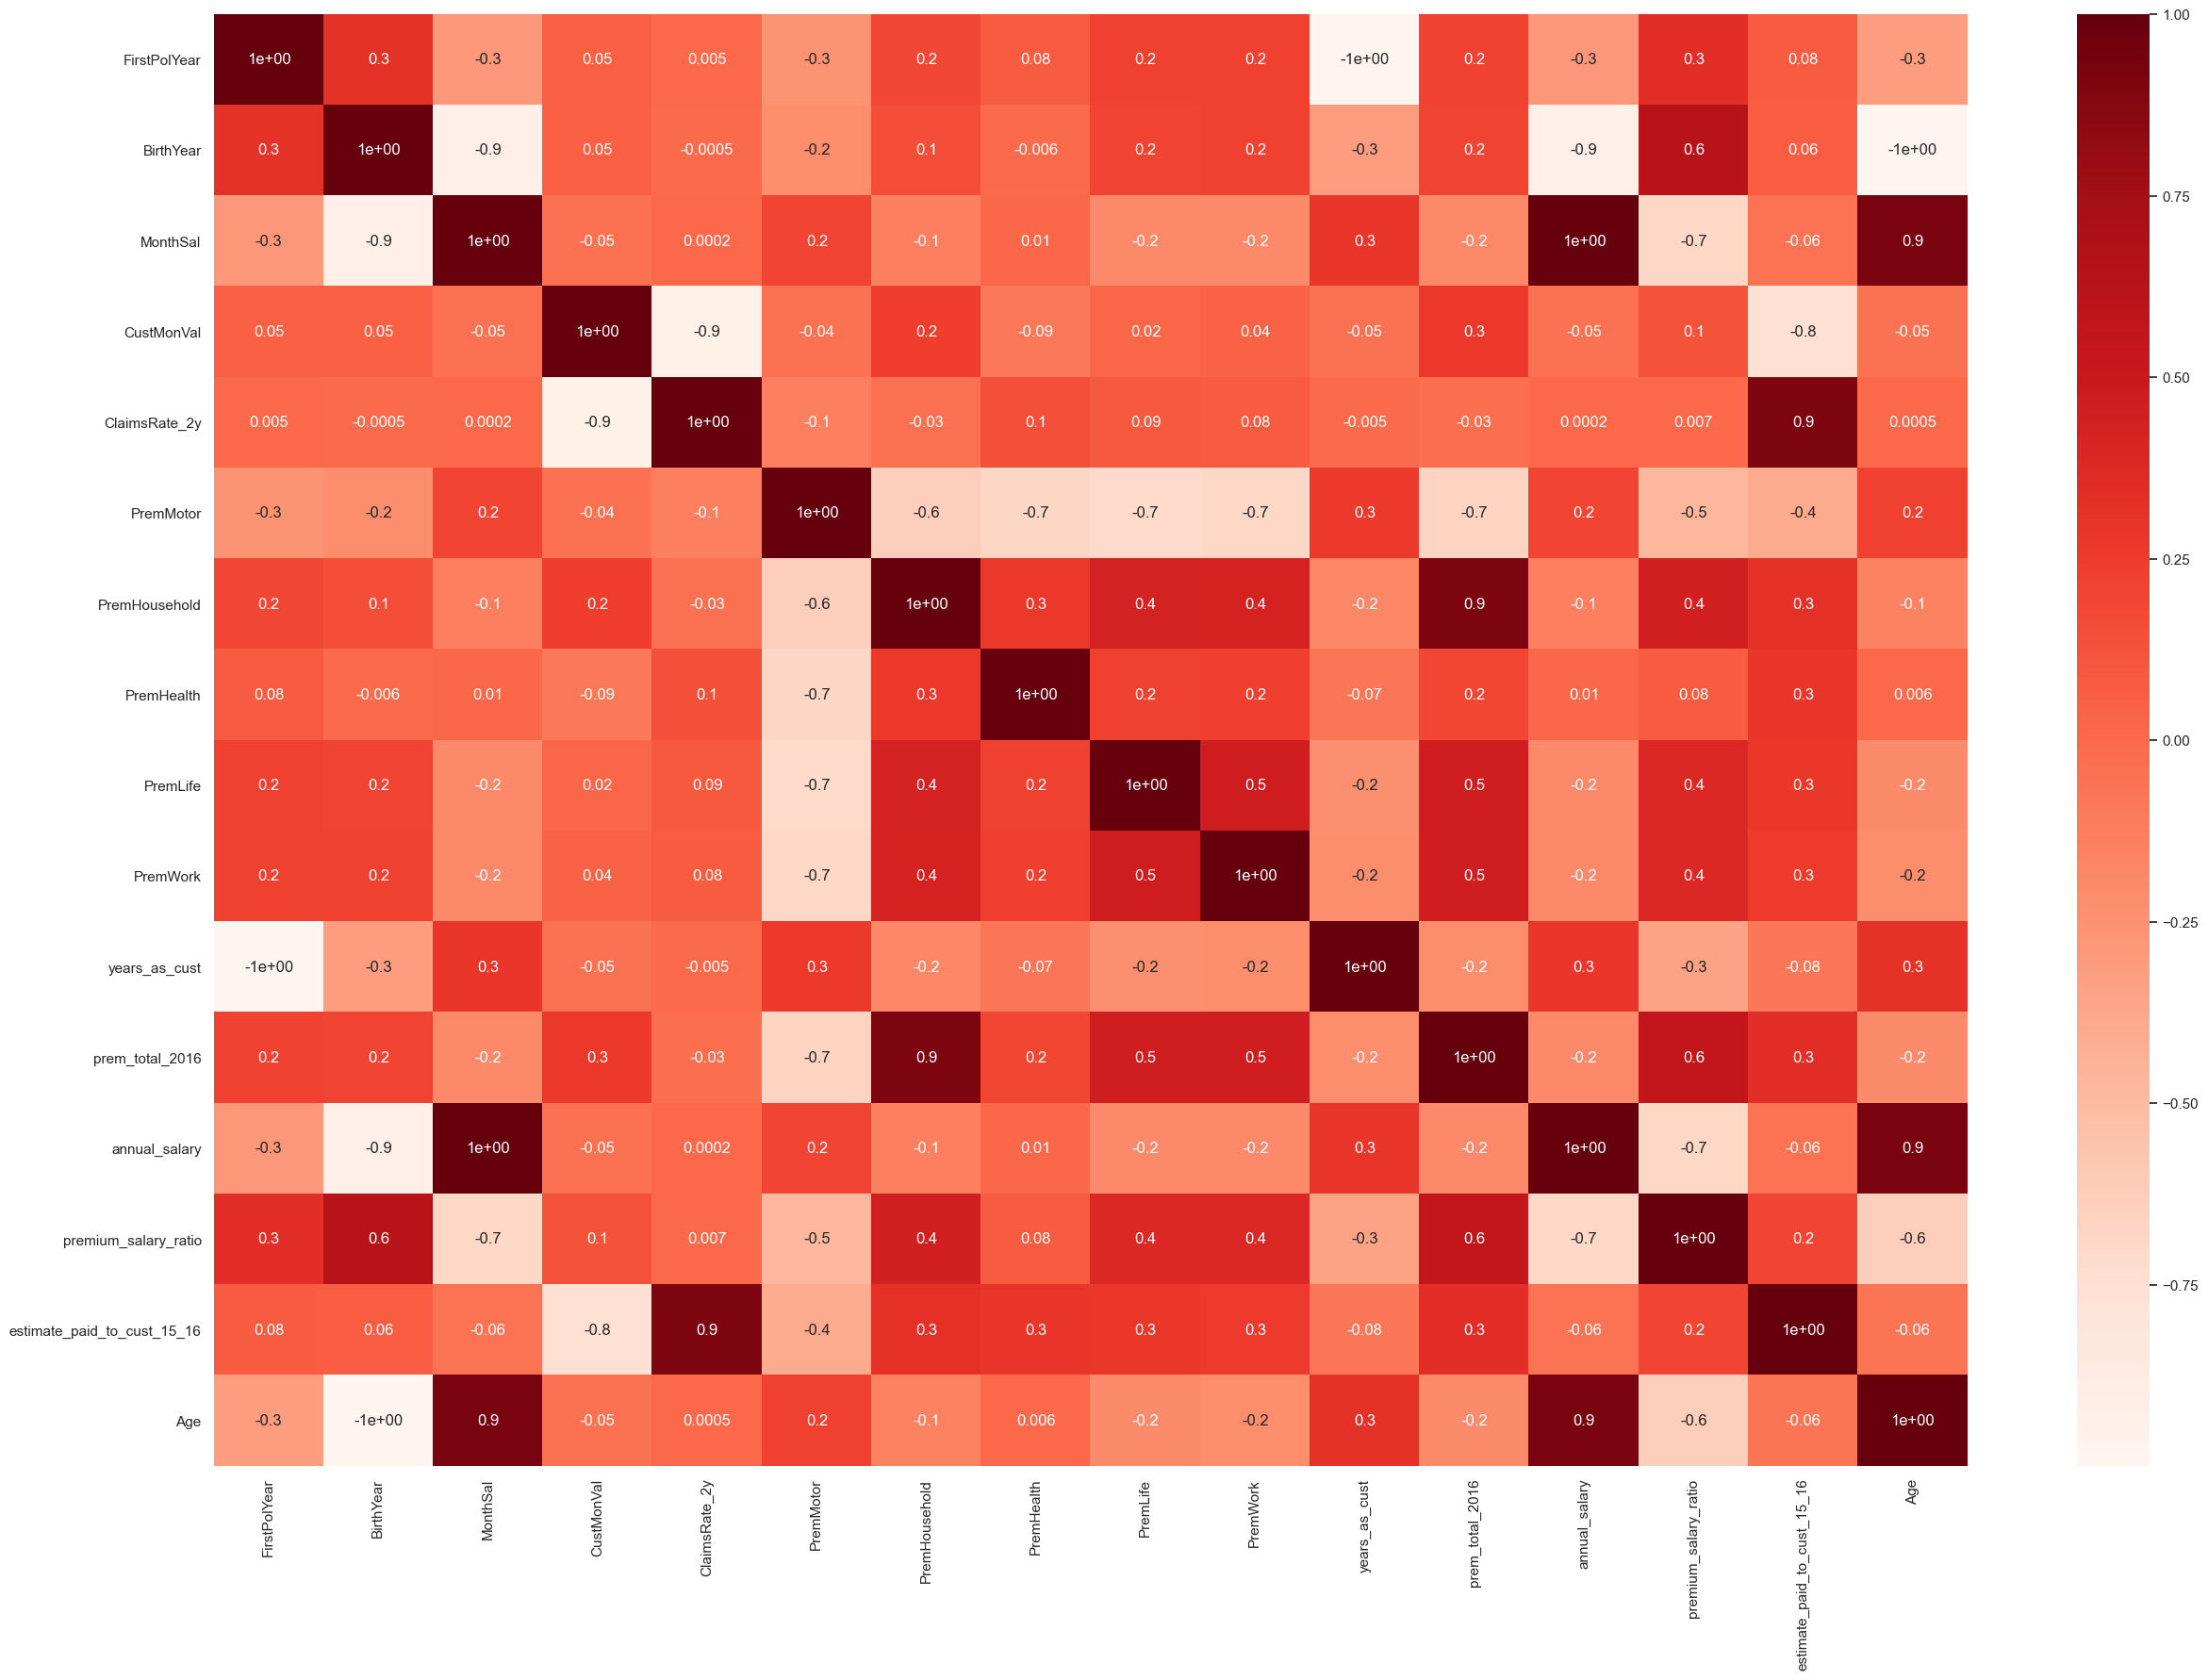

In [103]:
correlation = df_corr[metric_features].corr(method ='pearson')
cor_heatmap(correlation)

In [104]:
metric_features


['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate_2y',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'years_as_cust',
 'prem_total_2016',
 'annual_salary',
 'premium_salary_ratio',
 'estimate_paid_to_cust_15_16',
 'Age']

In [105]:
fe_drop = ["BirthYear", "FirstPolYear", "CustMonVal", "MonthSal", "prem_total_2016","premium_salary_ratio", "estimate_paid_to_cust_15_16"]
df_corr.drop(fe_drop, axis = 1, inplace = True)

In [106]:
df_original = df_fc.drop(fe_drop, axis = 1)

In [107]:
df_original
df_original["Children"] = df_original.Children.astype(int)

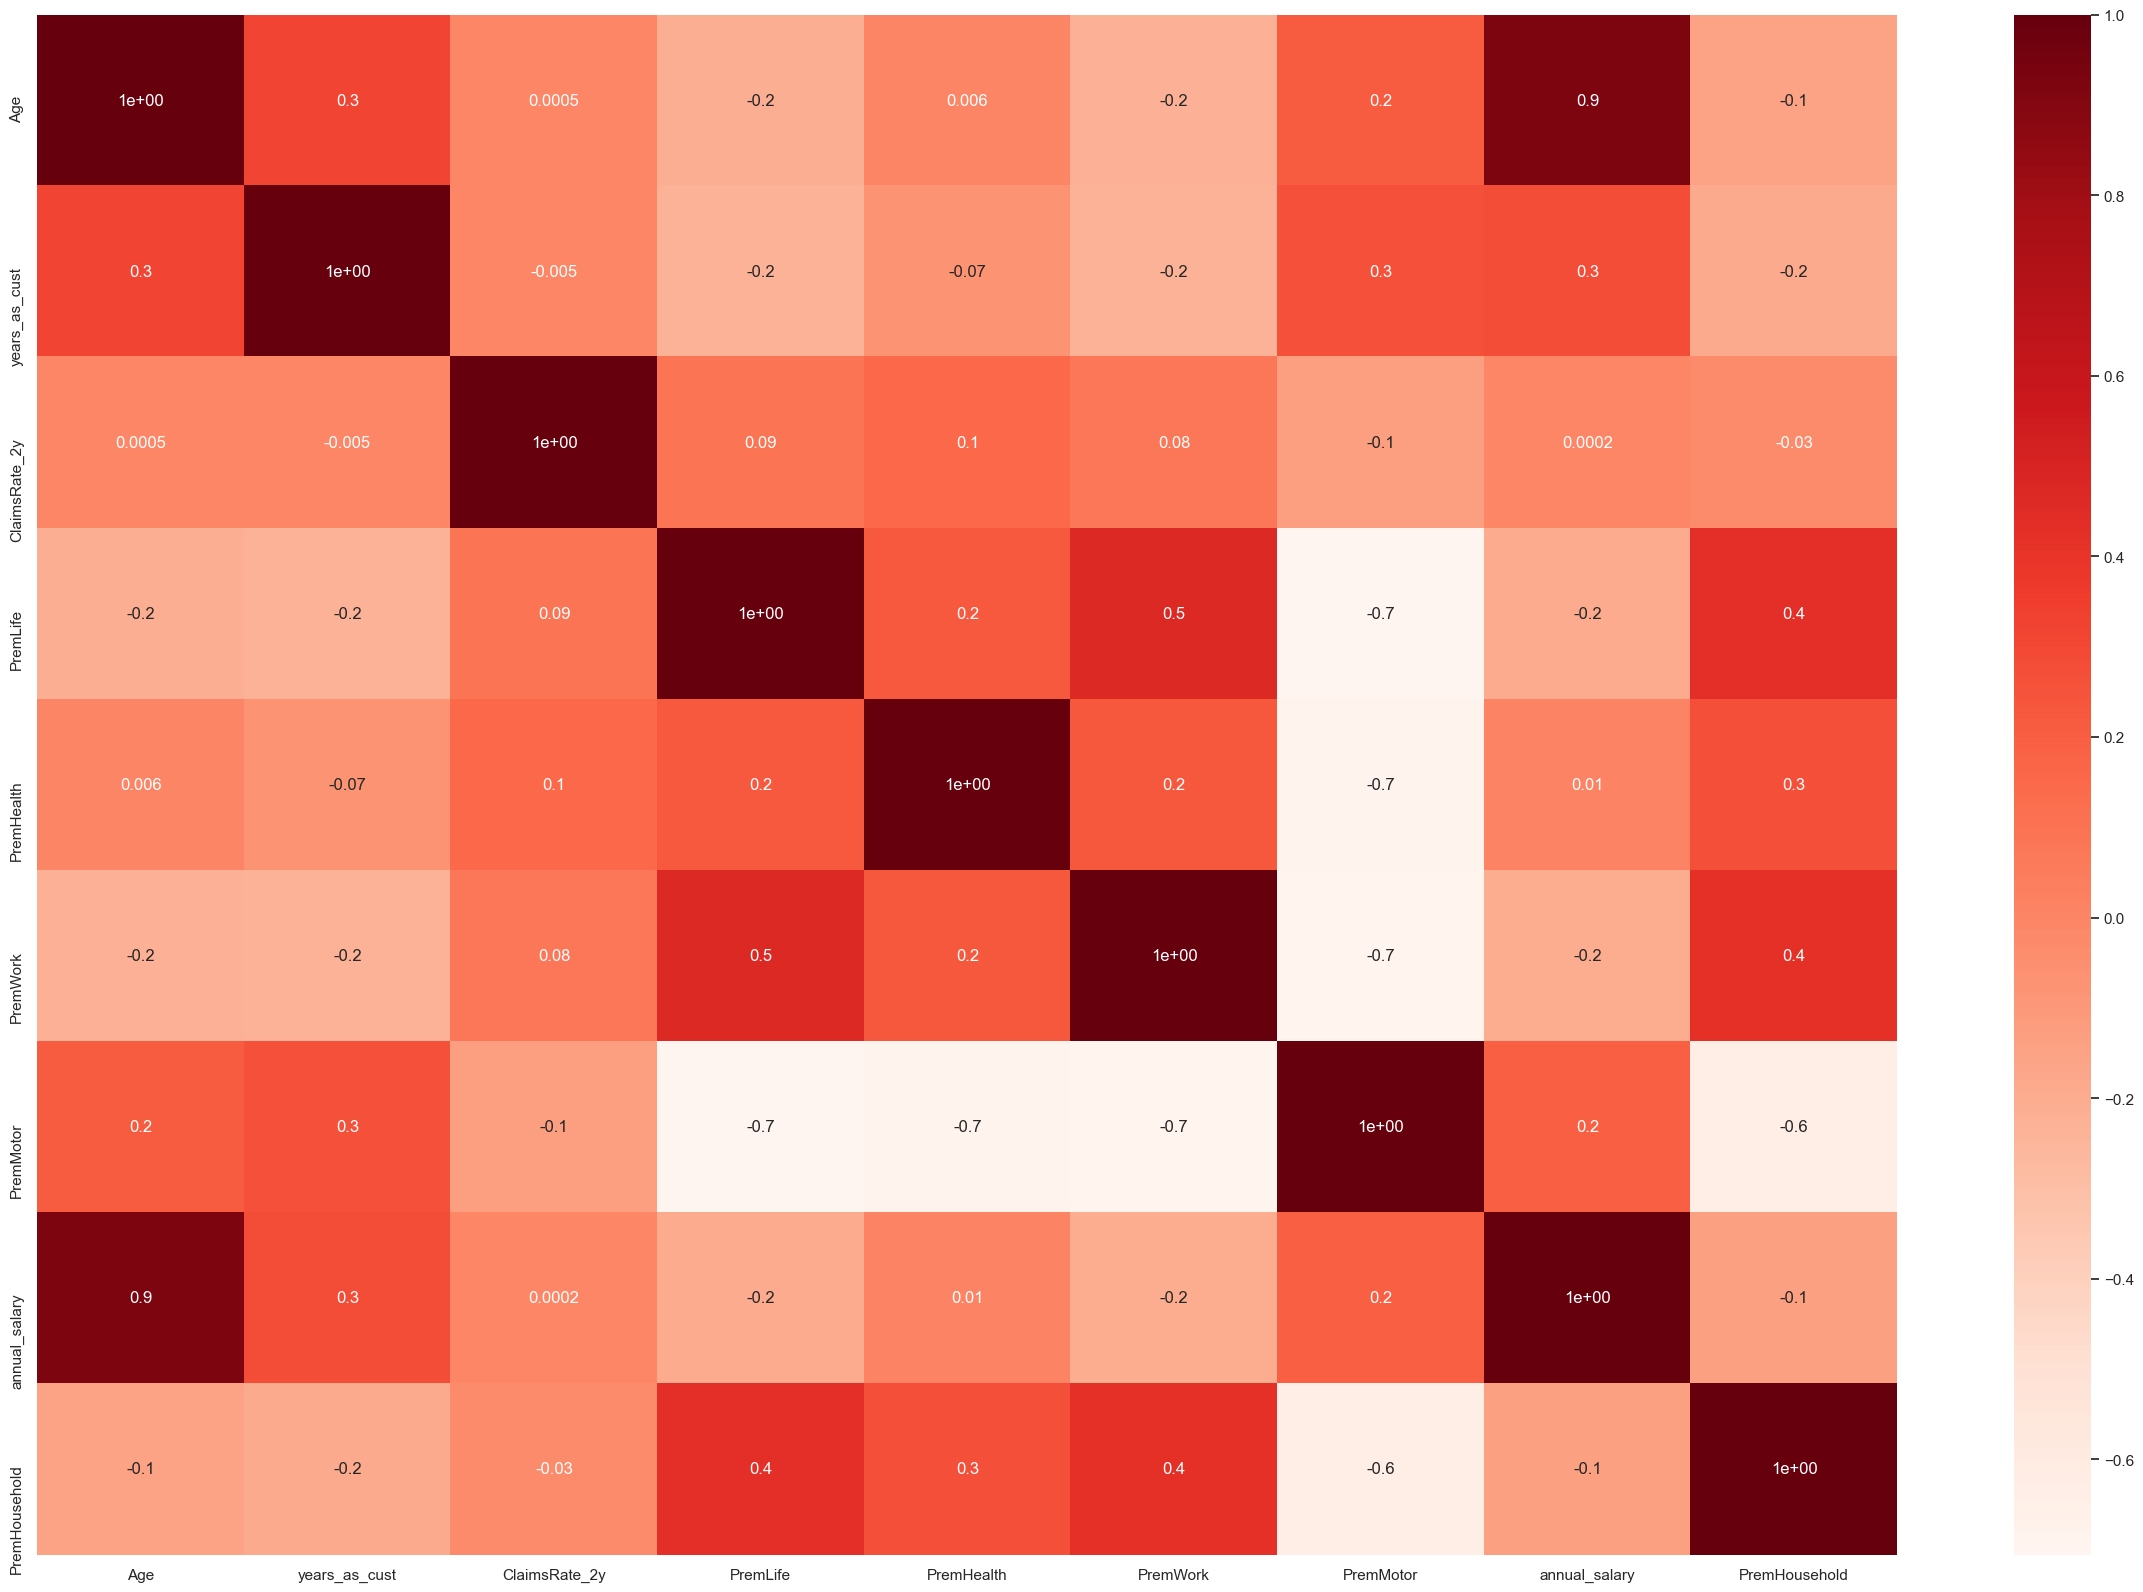

In [108]:
correlation = df_corr[set(metric_features).intersection(list(df_corr.columns))].corr(method ='pearson')
cor_heatmap(correlation)

In [109]:
df_corr.columns

Index(['Children', 'ClaimsRate_2y', 'PremMotor', 'PremHousehold', 'PremHealth',
       'PremLife', 'PremWork', 'Age', 'years_as_cust', 'annual_salary',
       'EducDeg_2.0', 'EducDeg_3.0', 'EducDeg_4.0', 'GeoLivArea_2.0',
       'GeoLivArea_3.0', 'GeoLivArea_4.0'],
      dtype='object')

### b) Non-metric variables distribution

### 


In [110]:
vars_iterate = ['ClaimsRate_2y',"PremMotor", "PremHousehold", "PremHealth", 'PremLife',
       'PremWork', 'Age', 'years_as_cust', 'annual_salary',
       ]

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


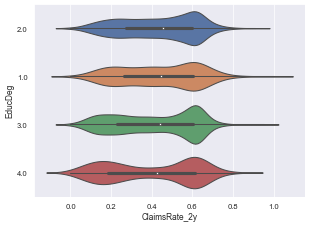

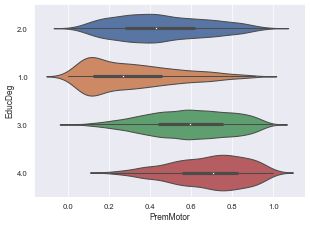

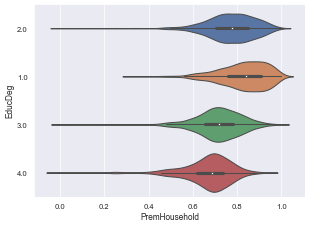

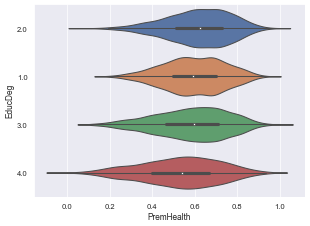

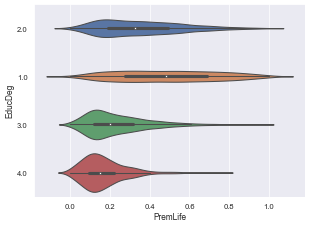

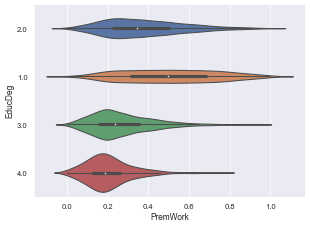

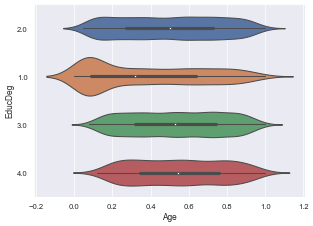

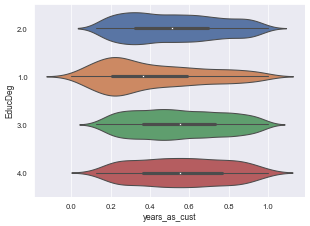

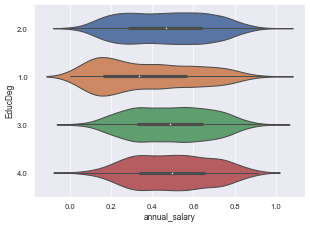

In [111]:
for var in vars_iterate:
    plt.figure(figsize = (7, 5), dpi = 50)
    print(sns.violinplot(x = var, y = "EducDeg", data = df_scal))

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


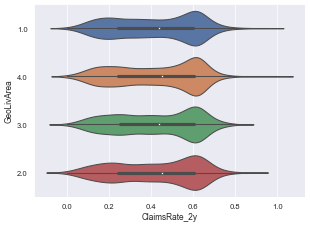

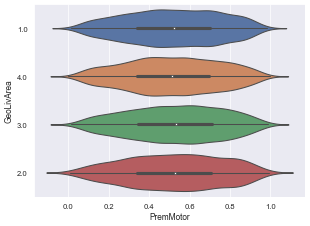

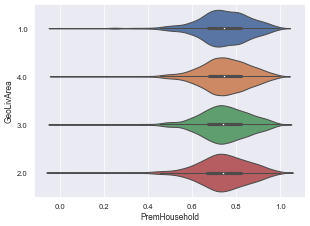

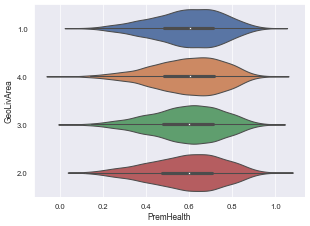

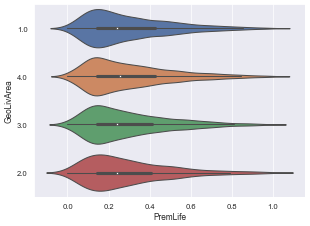

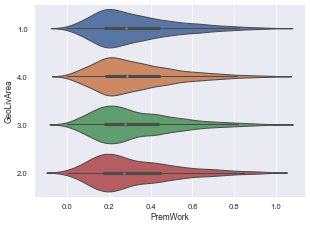

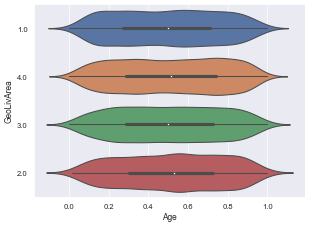

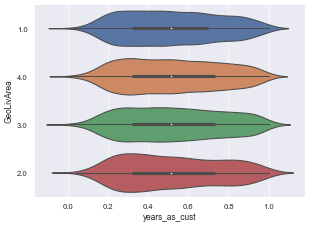

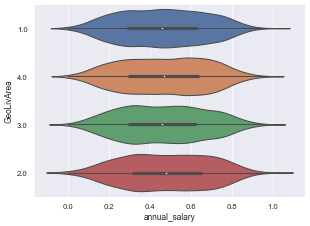

In [112]:
for var in vars_iterate:
    plt.figure(figsize = (7, 5), dpi = 50)
    print(sns.violinplot(x = var, y = "GeoLivArea", data = df_scal) )

As we can see, variabale GeoLivArea has very similar distributions for all of its values. Since it does not vary much, we will keep it out of our clustering analysis.

In [113]:
df_scal["Children"] = df_scal["Children"].astype(int).astype(str)

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


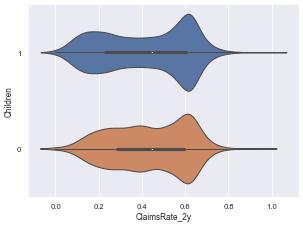

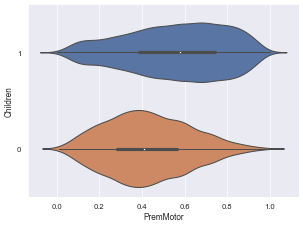

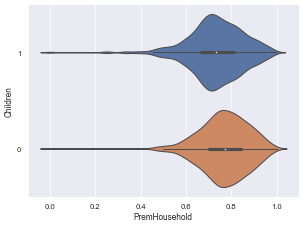

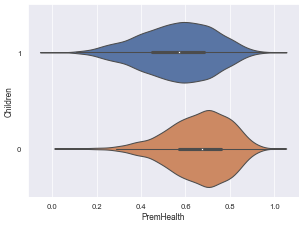

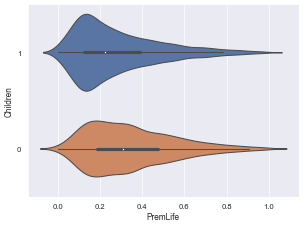

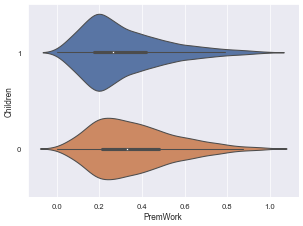

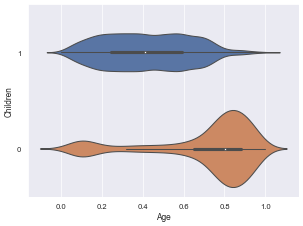

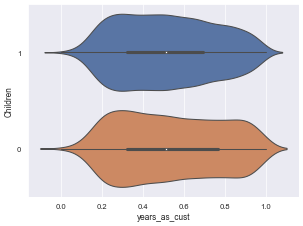

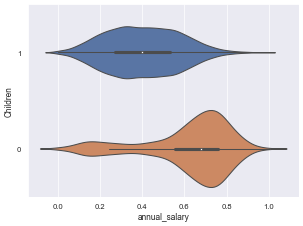

In [114]:
for var in vars_iterate:
    plt.figure(figsize = (7, 5), dpi = 50)
    print(sns.violinplot(x = var, y = "Children", data = df_scal) )

### c) PCA
PCA is still performed with the variables of the previous step

In [115]:
metric_features

['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate_2y',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'years_as_cust',
 'prem_total_2016',
 'annual_salary',
 'premium_salary_ratio',
 'estimate_paid_to_cust_15_16',
 'Age']

In [116]:
df_pca = df_dr.copy()

In [117]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat 

array([[ 1.43026685e-01, -3.53859761e-01, -3.12248683e-02, ...,
        -4.14695814e-03, -2.08789902e-05,  4.54839572e-16],
       [ 1.13403779e+00,  3.56206917e-01, -2.35667308e-01, ...,
        -1.25782885e-03, -2.62942302e-06,  8.36841838e-16],
       [ 2.54353768e-01,  1.46949462e-01,  2.20552524e-01, ...,
        -3.95099824e-03, -9.45284606e-06,  2.02684833e-15],
       ...,
       [ 5.87615520e-02, -2.71972338e-01,  5.37440168e-01, ...,
         1.69359714e-03, -1.48746121e-05, -8.48567364e-17],
       [ 2.31117069e-01,  7.28931678e-02, -4.28432691e-01, ...,
        -9.36121476e-04, -1.51234561e-05, -2.37687654e-17],
       [ 5.83638153e-02, -3.77817836e-01,  3.13652169e-01, ...,
        -3.65040371e-03, -1.85298845e-05, -1.22565256e-17]])

#### Number of PC to retain

In [118]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue    Difference    Proportion  Cumulative
1   2.579261e-01  0.000000e+00  4.061031e-01    0.406103
2   1.250027e-01 -1.329234e-01  1.968160e-01    0.602919
3   8.973744e-02 -3.526525e-02  1.412911e-01    0.744210
4   7.628971e-02 -1.344773e-02  1.201177e-01    0.864328
5   2.650234e-02 -4.978738e-02  4.172778e-02    0.906056
6   2.346544e-02 -3.036895e-03  3.694620e-02    0.943002
7   2.098996e-02 -2.475480e-03  3.304857e-02    0.976050
8   8.181056e-03 -1.280891e-02  1.288102e-02    0.988931
9   2.565230e-03 -5.615826e-03  4.038939e-03    0.992970
10  1.589679e-03 -9.755513e-04  2.502940e-03    0.995473
11  1.326762e-03 -2.629162e-04  2.088979e-03    0.997562
12  8.924544e-04 -4.343079e-04  1.405164e-03    0.998967
13  6.316369e-04 -2.608175e-04  9.945086e-04    0.999962
14  2.410047e-05 -6.075364e-04  3.794605e-05    1.000000
15  5.639505e-08 -2.404408e-05  8.879368e-08    1.000000
16  4.359215e-33 -5.639505e-08  6.863558e-33    1.000000

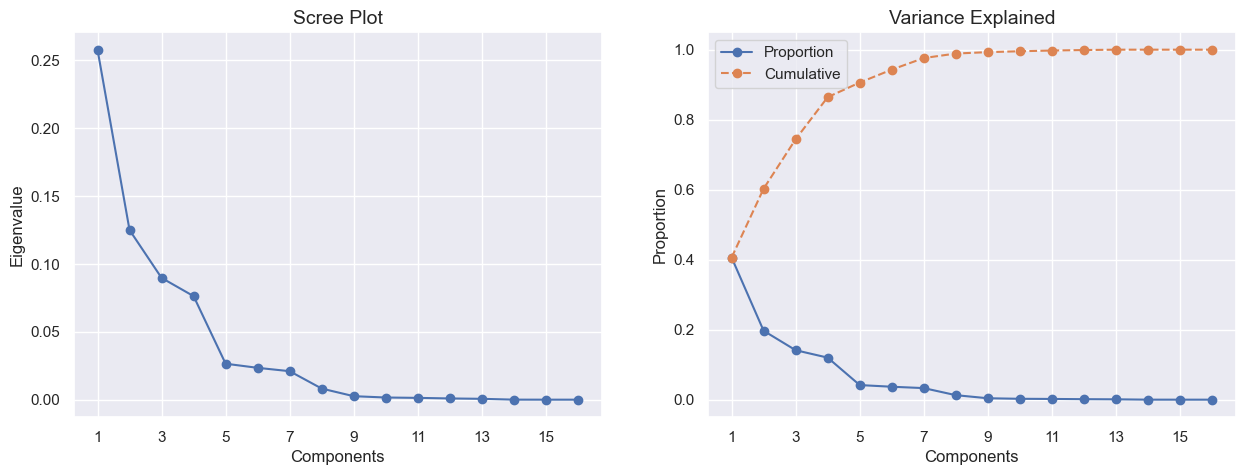

In [119]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [120]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

PC0       PC1       PC2       PC3       PC4
CustID                                                  
1       0.143027 -0.353860 -0.031225  0.190487 -0.013007
2       1.134038  0.356207 -0.235667 -0.178542  0.285958
3       0.254354  0.146949  0.220553  0.369454  0.105253
4       0.492617 -0.033868 -0.182394 -0.236834 -0.333268
5       0.119812 -0.163665 -0.191851 -0.181430 -0.089253
...          ...       ...       ...       ...       ...
10291   1.378988  0.479737 -0.024482  0.032903  0.357935
10292  -0.538708  0.032998 -0.101967 -0.241781 -0.044751
10294   0.058762 -0.271972  0.537440  0.122381 -0.073194
10295   0.231117  0.072893 -0.428433  0.282924  0.003245
10296   0.058364 -0.377818  0.313652  0.130534 -0.078125

[10101 rows x 5 columns]

In [121]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

FirstPolYear  BirthYear  MonthSal  Children  CustMonVal  \
CustID                                                            
1           0.407407   0.712121  0.393345         1    0.490891   
2           0.777778   0.909091  0.073379         1    0.171485   
3           0.629630   0.530303  0.414676         0    0.568044   
4           0.592593   0.696970  0.163396         1    0.242676   
5           0.444444   0.575758  0.305034         1    0.275247   

        ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  PremLife  ...  \
CustID                                                                 ...   
1            0.240741   0.644732       0.705788    0.565258  0.373616  ...   
2            0.691358   0.138411       0.866987    0.491779  0.882790  ...   
3            0.172840   0.356778       0.797974    0.512369  0.552933  ...   
4            0.611111   0.316614       0.668827    0.849789  0.309203  ...   
5            0.555556   0.581559       0.673947    0.642704  0.205143  ...   

        EducDeg_3.0  EducDeg_4.0  GeoLivArea_2.0  GeoLivArea_3.0  \
CustID                                                             
1                 0            0               0               0   
2                 0            0               0               0   
3                 0            0               0               1   
4                 1            0               0               0   
5                 1            0               0               0   

        GeoLivArea_4.0       PC0       PC1       PC2       PC3       PC4  
CustID                                                                    
1                    0  0.143027 -0.353860 -0.031225  0.190487 -0.013007  
2                    1  1.134038  0.356207 -0.235667 -0.178542  0.285958  
3                    0  0.254354  0.146949  0.220553  0.369454  0.105253  
4                    1  0.492617 -0.033868 -0.182394 -0.236834 -0.333268  
5                    1  0.119812 -0.163665 -0.191851 -0.181430 -0.089253  

[5 rows x 28 columns]

In [122]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

# VI. Models // Clustering

We proceed with the dataset with dimensionality reduction through interpretation of correlation

## 1. Definition of perspectives

In [123]:
df_final=df_corr.copy()
df_final=df_final.drop(columns=['GeoLivArea_2.0',
       'GeoLivArea_3.0', 'GeoLivArea_4.0'])

In [124]:
df_final

Children  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1              1       0.240741   0.644732       0.705788    0.565258   
2              1       0.691358   0.138411       0.866987    0.491779   
3              0       0.172840   0.356778       0.797974    0.512369   
4              1       0.611111   0.316614       0.668827    0.849789   
5              1       0.555556   0.581559       0.673947    0.642704   
...          ...            ...        ...            ...         ...   
10291          1       0.524691   0.018665       0.959618    0.454340   
10292          0       0.592593   0.675089       0.675799    0.624981   
10294          1       0.129630   0.691870       0.747054    0.555686   
10295          1       0.401235   0.326981       0.791618    0.673095   
10296          1       0.166667   0.709602       0.718672    0.553330   

        PremLife  PremWork       Age  years_as_cust  annual_salary  \
CustID                                                               
1       0.373616  0.229047  0.287879       0.623378       0.393345   
2       0.882790  0.643019  0.090909       0.245748       0.073379   
3       0.552933  0.618536  0.469697       0.401274       0.414676   
4       0.309203  0.300515  0.303030       0.439193       0.163396   
5       0.205143  0.373285  0.424242       0.587240       0.305034   
...          ...       ...       ...            ...            ...   
10291   0.651222  0.901395  0.030303       0.083672       0.062500   
10292   0.140668  0.214920  0.787879       0.659181       0.609002   
10294   0.162081  0.143999  0.378788       0.285223       0.551408   
10295   0.456759  0.665491  0.363636       0.764632       0.349403   
10296   0.118521  0.201984  0.303030       0.439193       0.529437   

        EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  
CustID                                         
1                 1            0            0  
2                 1            0            0  
3                 0            0            0  
4                 0            1            0  
5                 0            1            0  
...             ...          ...          ...  
10291             0            0            0  
10292             0            0            1  
10294             0            1            0  
10295             0            0            0  
10296             0            0            1  

[10101 rows x 13 columns]

In [125]:
# # redefine metric and non metric for SOM: 
# non_metric_features = ["GeoLivArea"]
# metric_features = df.columns.drop(non_metric_features).to_list()

In [126]:
df.columns

Index(['FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal', 'GeoLivArea',
       'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork'],
      dtype='object')

In [127]:
#df_og_selected = df_fc.copy()
#df_og_selected = df_og_selected[['Children', 'ClaimsRate_2y', 'PremMotor', 'PremHousehold', 'PremHealth',
#       'PremLife', 'PremWork', 'Age', 'years_as_cust', 'annual_salary', 'EducDeg']]

In [128]:
metric_features = ['ClaimsRate_2y', 'PremMotor', 'PremHousehold', 'PremHealth',
       'PremLife', 'PremWork', 'Age', 'years_as_cust', 'annual_salary']
non_metric_features = ['Children','EducDeg_2.0', 'EducDeg_3.0',
       'EducDeg_4.0']

In [129]:
value_features =['PremMotor', 'PremHousehold', 'PremHealth',
       'PremLife', 'PremWork','ClaimsRate_2y']
demographic_features = ['Age', 'years_as_cust', 'annual_salary']
demographic_features_categorical=['Age', 'years_as_cust', 'annual_salary','Children','EducDeg']

In [130]:
#cor_heatmap(df_final[value_features].corr(method ='pearson'))

In [131]:
#cor_heatmap(df_final[demographic_features].corr(method ='pearson'))

In [132]:
df_val = df_final[value_features]
df_dem = df_final[demographic_features]

## 2. Preparing Cluster Algorithms

### 2.1) K-Means & Hierarchical Clustering


In [133]:
df_val_km=df_val.copy()
df_dem_km=df_dem.copy()
#f_km=df_og_selected.copy()
df_og_selected=df_final.copy()

In [134]:
df_og_selected

Children  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1              1       0.240741   0.644732       0.705788    0.565258   
2              1       0.691358   0.138411       0.866987    0.491779   
3              0       0.172840   0.356778       0.797974    0.512369   
4              1       0.611111   0.316614       0.668827    0.849789   
5              1       0.555556   0.581559       0.673947    0.642704   
...          ...            ...        ...            ...         ...   
10291          1       0.524691   0.018665       0.959618    0.454340   
10292          0       0.592593   0.675089       0.675799    0.624981   
10294          1       0.129630   0.691870       0.747054    0.555686   
10295          1       0.401235   0.326981       0.791618    0.673095   
10296          1       0.166667   0.709602       0.718672    0.553330   

        PremLife  PremWork       Age  years_as_cust  annual_salary  \
CustID                                                               
1       0.373616  0.229047  0.287879       0.623378       0.393345   
2       0.882790  0.643019  0.090909       0.245748       0.073379   
3       0.552933  0.618536  0.469697       0.401274       0.414676   
4       0.309203  0.300515  0.303030       0.439193       0.163396   
5       0.205143  0.373285  0.424242       0.587240       0.305034   
...          ...       ...       ...            ...            ...   
10291   0.651222  0.901395  0.030303       0.083672       0.062500   
10292   0.140668  0.214920  0.787879       0.659181       0.609002   
10294   0.162081  0.143999  0.378788       0.285223       0.551408   
10295   0.456759  0.665491  0.363636       0.764632       0.349403   
10296   0.118521  0.201984  0.303030       0.439193       0.529437   

        EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  
CustID                                         
1                 1            0            0  
2                 1            0            0  
3                 0            0            0  
4                 0            1            0  
5                 0            1            0  
...             ...          ...          ...  
10291             0            0            0  
10292             0            0            1  
10294             0            1            0  
10295             0            0            0  
10296             0            0            1  

[10101 rows x 13 columns]

In [135]:
df_final = df_fc.copy()
df_final = df_final[['Children', 'ClaimsRate_2y', 'PremMotor', 'PremHousehold', 'PremHealth',
       'PremLife', 'PremWork', 'Age', 'years_as_cust', 'annual_salary', 'EducDeg']]
df_final

Children  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1           True           0.39     375.85          79.45      146.36   
2           True           1.12      77.46         416.20      116.69   
3          False           0.28     206.15         224.50      124.58   
4           True           0.99     182.48          43.35      311.17   
5           True           0.90     338.62          47.80      182.59   
...          ...            ...        ...            ...         ...   
10291       True           0.85       6.89         878.50      103.13   
10292      False           0.96     393.74          49.45      173.81   
10294       True           0.21     403.63         132.80      142.25   
10295       True           0.65     188.59         211.15      198.37   
10296       True           0.27     414.08          94.45      141.25   

        PremLife  PremWork  Age  years_as_cust  annual_salary EducDeg  
CustID                                                                 
1          47.01     16.89   34             31          26124     2.0  
2         194.48    106.13   21             21           8124     2.0  
3          86.35     99.02   46             25          27324     1.0  
4          35.34     28.34   35             26          13188     3.0  
5          18.78     41.45   43             30          21156     3.0  
...          ...       ...  ...            ...            ...     ...  
10291     113.02    201.26   17             17           7512     1.0  
10292       9.78     14.78   67             32          38256     4.0  
10294      12.67      4.89   40             22          35016     3.0  
10295      63.90    112.91   39             35          23652     1.0  
10296       6.89     12.89   35             26          33780     4.0  

[10101 rows x 11 columns]

df_final -> unscaled data

#### 2.1.1) Demographic perspective

In [136]:
kmeans_dem = KMeans(
    n_clusters=20,
    init='k-means++',
    n_init=20,
    random_state=42
)
demographic_labels = kmeans_dem.fit_predict(df_dem_km)
df_dem_km['demographic_labels'] = demographic_labels

In [137]:
demographic_labels

array([11,  6,  9, ...,  9, 15, 12], dtype=int32)

In [138]:
df_dem_km

Age  years_as_cust  annual_salary  demographic_labels
CustID                                                            
1       0.287879       0.623378       0.393345                  11
2       0.090909       0.245748       0.073379                   6
3       0.469697       0.401274       0.414676                   9
4       0.303030       0.439193       0.163396                   0
5       0.424242       0.587240       0.305034                  12
...          ...            ...            ...                 ...
10291   0.030303       0.083672       0.062500                   6
10292   0.787879       0.659181       0.609002                  18
10294   0.378788       0.285223       0.551408                   9
10295   0.363636       0.764632       0.349403                  15
10296   0.303030       0.439193       0.529437                  12

[10101 rows x 4 columns]

In [139]:
# Centroids of the concatenated cluster labels
df_centroids_d = df_dem_km.groupby(['demographic_labels'])\
    [demographic_features].mean()
df_centroids_d

Age  years_as_cust  annual_salary
demographic_labels                                        
0                   0.222692       0.511677       0.244634
1                   0.878992       0.885976       0.768337
2                   0.755973       0.260261       0.668078
3                   0.731969       0.475383       0.621633
4                   0.488551       0.681888       0.458486
5                   0.278228       0.251614       0.305748
6                   0.075733       0.174256       0.139387
7                   0.561659       0.883084       0.513111
8                   0.855138       0.675352       0.743655
9                   0.455838       0.278988       0.424793
10                  0.735748       0.880475       0.631056
11                  0.303733       0.679492       0.300659
12                  0.374704       0.476224       0.381195
13                  0.569460       0.500611       0.499283
14                  0.876687       0.453583       0.769762
15                  0.395669       0.852089       0.369556
16                  0.144880       0.345215       0.190771
17                  0.605055       0.265679       0.542234
18                  0.670304       0.678721       0.594779
19                  0.891978       0.245180       0.774691

In [140]:
df_dem_km

Age  years_as_cust  annual_salary  demographic_labels
CustID                                                            
1       0.287879       0.623378       0.393345                  11
2       0.090909       0.245748       0.073379                   6
3       0.469697       0.401274       0.414676                   9
4       0.303030       0.439193       0.163396                   0
5       0.424242       0.587240       0.305034                  12
...          ...            ...            ...                 ...
10291   0.030303       0.083672       0.062500                   6
10292   0.787879       0.659181       0.609002                  18
10294   0.378788       0.285223       0.551408                   9
10295   0.363636       0.764632       0.349403                  15
10296   0.303030       0.439193       0.529437                  12

[10101 rows x 4 columns]

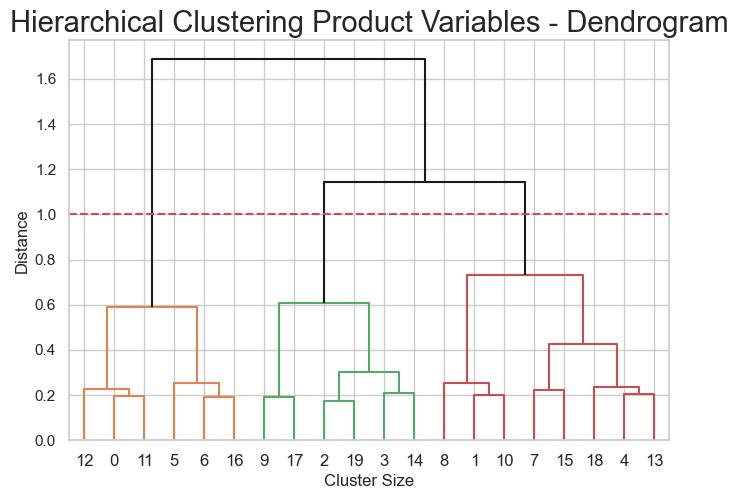

In [141]:
# performing hierarchical clustering
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
Z = linkage(df_centroids_d, method = "ward")

# plotting the hierarchical clustering as a dendrogram
y_threshold = 1
dendrogram(Z, truncate_mode = "lastp", p = 40, color_threshold=y_threshold, above_threshold_color='k',show_contracted = True, show_leaf_counts = True)
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
cur_axes = plt.gca()
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Product Variables - Dendrogram', fontsize=21)
#plt.savefig(r'Figures\product_dendrogram.png', dpi=200)
plt.show()

In [142]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids_d)
df_centroids_d['demographic_labels_H'] = hclust_labels

In [143]:
metrics.silhouette_score(df_centroids_d, hclust_labels, metric='euclidean')

0.7287692744987442

In [144]:
metrics.calinski_harabasz_score(df_centroids_d, hclust_labels)

129.97671534500088

In [145]:
df_centroids_d

Age  years_as_cust  annual_salary  \
demographic_labels                                           
0                   0.222692       0.511677       0.244634   
1                   0.878992       0.885976       0.768337   
2                   0.755973       0.260261       0.668078   
3                   0.731969       0.475383       0.621633   
4                   0.488551       0.681888       0.458486   
5                   0.278228       0.251614       0.305748   
6                   0.075733       0.174256       0.139387   
7                   0.561659       0.883084       0.513111   
8                   0.855138       0.675352       0.743655   
9                   0.455838       0.278988       0.424793   
10                  0.735748       0.880475       0.631056   
11                  0.303733       0.679492       0.300659   
12                  0.374704       0.476224       0.381195   
13                  0.569460       0.500611       0.499283   
14                  0.876687       0.453583       0.769762   
15                  0.395669       0.852089       0.369556   
16                  0.144880       0.345215       0.190771   
17                  0.605055       0.265679       0.542234   
18                  0.670304       0.678721       0.594779   
19                  0.891978       0.245180       0.774691   

                    demographic_labels_H  
demographic_labels                        
0                                      1  
1                                      0  
2                                      2  
3                                      2  
4                                      0  
5                                      1  
6                                      1  
7                                      0  
8                                      0  
9                                      2  
10                                     0  
11                                     1  
12                                     1  
13                                     0  
14                                     2  
15                                     0  
16                                     1  
17                                     2  
18                                     0  
19                                     2

In [146]:
hclust_labels

array([1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2])

In [147]:
df_centroids_d_H = df_centroids_d.groupby(['demographic_labels_H'])\
    [demographic_features].mean()
df_centroids_d_H

Age  years_as_cust  annual_salary
demographic_labels_H                                        
0                     0.644440       0.754775       0.572283
1                     0.233328       0.406413       0.260399
2                     0.719583       0.329846       0.633532

In [148]:
df_dem_km


Age  years_as_cust  annual_salary  demographic_labels
CustID                                                            
1       0.287879       0.623378       0.393345                  11
2       0.090909       0.245748       0.073379                   6
3       0.469697       0.401274       0.414676                   9
4       0.303030       0.439193       0.163396                   0
5       0.424242       0.587240       0.305034                  12
...          ...            ...            ...                 ...
10291   0.030303       0.083672       0.062500                   6
10292   0.787879       0.659181       0.609002                  18
10294   0.378788       0.285223       0.551408                   9
10295   0.363636       0.764632       0.349403                  15
10296   0.303030       0.439193       0.529437                  12

[10101 rows x 4 columns]

In [149]:
df_dem

Age  years_as_cust  annual_salary
CustID                                        
1       0.287879       0.623378       0.393345
2       0.090909       0.245748       0.073379
3       0.469697       0.401274       0.414676
4       0.303030       0.439193       0.163396
5       0.424242       0.587240       0.305034
...          ...            ...            ...
10291   0.030303       0.083672       0.062500
10292   0.787879       0.659181       0.609002
10294   0.378788       0.285223       0.551408
10295   0.363636       0.764632       0.349403
10296   0.303030       0.439193       0.529437

[10101 rows x 3 columns]

In [150]:
df_dem_km_h=df_dem_km.copy()
df_dem_km_h

Age  years_as_cust  annual_salary  demographic_labels
CustID                                                            
1       0.287879       0.623378       0.393345                  11
2       0.090909       0.245748       0.073379                   6
3       0.469697       0.401274       0.414676                   9
4       0.303030       0.439193       0.163396                   0
5       0.424242       0.587240       0.305034                  12
...          ...            ...            ...                 ...
10291   0.030303       0.083672       0.062500                   6
10292   0.787879       0.659181       0.609002                  18
10294   0.378788       0.285223       0.551408                   9
10295   0.363636       0.764632       0.349403                  15
10296   0.303030       0.439193       0.529437                  12

[10101 rows x 4 columns]

In [151]:
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(0,1)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(1,0)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(2,2)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(3,2)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(4,0)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(5,1)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(6,1)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(7,0)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(8,0)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(9,2)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(10,0)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(11,1)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(12,1)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(13,0)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(14,2)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(15,0)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(16,1)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(17,2)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(18,0)
df_dem_km_h['demographic_labels'] = df_dem_km_h['demographic_labels'].replace(19,2)


In [152]:
df_dem_km_h


Age  years_as_cust  annual_salary  demographic_labels
CustID                                                            
1       0.287879       0.623378       0.393345                   1
2       0.090909       0.245748       0.073379                   1
3       0.469697       0.401274       0.414676                   2
4       0.303030       0.439193       0.163396                   0
5       0.424242       0.587240       0.305034                   1
...          ...            ...            ...                 ...
10291   0.030303       0.083672       0.062500                   1
10292   0.787879       0.659181       0.609002                   0
10294   0.378788       0.285223       0.551408                   2
10295   0.363636       0.764632       0.349403                   0
10296   0.303030       0.439193       0.529437                   1

[10101 rows x 4 columns]

In [153]:
df_dem_km_h.groupby('demographic_labels').count()

Age  years_as_cust  annual_salary
demographic_labels                                    
0                   4581           4581           4581
1                   2995           2995           2995
2                   2525           2525           2525

In [154]:
df_final_dem = df_final.merge(df_dem_km_h[['demographic_labels']],on='CustID', how='left')

In [155]:
df_final_dem.groupby('demographic_labels').mean()

Children  ClaimsRate_2y   PremMotor  PremHousehold  \
demographic_labels                                                       
0                   0.708797       0.674080  334.042915     159.909823   
1                   0.866778       0.691723  235.520965     280.468614   
2                   0.515248       0.679719  318.638858     171.726059   

                    PremHealth   PremLife   PremWork        Age  \
demographic_labels                                                
0                   160.781234  31.098000  31.062092  52.747435   
1                   182.241508  58.495325  56.681700  29.901836   
2                   167.669032  34.581382  33.375512  61.932673   

                    years_as_cust  annual_salary  
demographic_labels                                
0                       33.704650   32999.387033  
1                       24.772621   18353.445075  
2                       23.356832   39226.084752

In [156]:
demographic_feat_label=['Age', 'years_as_cust', 'annual_salary','demographic_labels']

In [157]:
df_final_dem.Children = df_final_dem.Children.astype(int)                  

In [158]:
def plot_hist(df, cluster_label):

    plt.close()
    x_axis = len(df.columns)
    y_axis = len(df[cluster_label].unique())
    fig, axs = plt.subplots(x_axis -1 , y_axis, figsize=(y_axis *3, x_axis*2), dpi = 75, constrained_layout=True)
    colors = [ "lightsteelblue", "cornflowerblue", "steelblue", "midnightblue", "navy", "slateblue", "darkslateblue"]
    
    for col in range(x_axis - 1):
        for cluster in range(y_axis):
            axs[col][cluster].set_title(f"cluster {cluster} / {df.columns[col]}")
            axs[col][cluster].hist(df.loc[df[cluster_label] == cluster].iloc[:,col], color=colors[cluster], bins = 18)#, edgecolor = "black")
            axs[col][cluster].set_xlim((0, df.iloc[:,col].max()))
   
    #plt.title(title)
    plt.show()

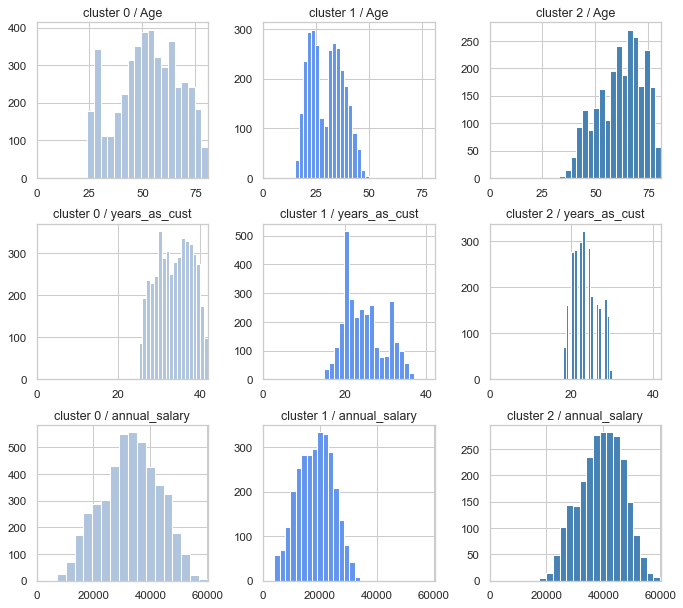

In [159]:
plot_hist(df_final_dem[demographic_feat_label], 'demographic_labels')

#### 2.1.2) Value perspective

In [160]:
kmeans_val = KMeans(
    n_clusters=20,
    init='k-means++',
    n_init=20,
    random_state=42
)
value_labels = kmeans_val.fit_predict(df_val_km)
df_val_km['value_labels'] = value_labels

In [161]:
# Centroids of the concatenated cluster labels
df_centroids_v = df_val_km.groupby(['value_labels'])\
    [value_features].mean()
df_centroids_v

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
value_labels                                                             
0              0.132607       0.855693    0.513471  0.725711  0.768652   
1              0.723958       0.687782    0.502538  0.165685  0.207241   
2              0.269454       0.861047    0.707742  0.530017  0.354040   
3              0.467191       0.786294    0.657170  0.195182  0.455039   
4              0.578558       0.776875    0.527212  0.370308  0.302434   
5              0.195408       0.862995    0.614051  0.812479  0.318512   
6              0.263355       0.824812    0.685063  0.241237  0.694616   
7              0.746055       0.680847    0.475322  0.159859  0.204807   
8              0.556149       0.707394    0.688239  0.188807  0.214988   
9              0.605592       0.687975    0.647504  0.173099  0.212823   
10             0.236335       0.881138    0.661527  0.276829  0.671384   
11             0.159718       0.871227    0.550114  0.697280  0.685610   
12             0.529568       0.732494    0.588052  0.320848  0.419746   
13             0.410863       0.785424    0.553587  0.514738  0.533440   
14             0.417440       0.768438    0.773551  0.253621  0.242125   
15             0.876761       0.599874    0.308581  0.099386  0.139172   
16             0.319081       0.771209    0.816131  0.281706  0.359536   
17             0.392682       0.789926    0.689106  0.514348  0.224639   
18             0.221959       0.793126    0.741544  0.541130  0.537436   
19             0.869767       0.606284    0.318869  0.103287  0.139918   

              ClaimsRate_2y  
value_labels                 
0                  0.592818  
1                  0.589746  
2                  0.239984  
3                  0.335874  
4                  0.277357  
5                  0.517904  
6                  0.586633  
7                  0.161576  
8                  0.588383  
9                  0.240174  
10                 0.222874  
11                 0.234963  
12                 0.604393  
13                 0.405166  
14                 0.345403  
15                 0.095735  
16                 0.544165  
17                 0.538435  
18                 0.560769  
19                 0.631632

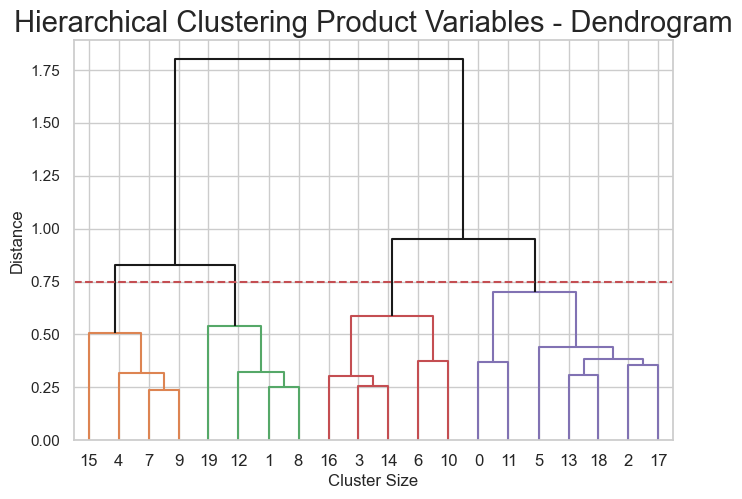

In [162]:
# performing hierarchical clustering
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
Z = linkage(df_centroids_v, method = "ward")

# plotting the hierarchical clustering as a dendrogram
y_threshold = 0.75
dendrogram(Z, truncate_mode = "lastp", p = 40, color_threshold=y_threshold, above_threshold_color='k',show_contracted = True, show_leaf_counts = True)
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
cur_axes = plt.gca()
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Product Variables - Dendrogram', fontsize=21)
#plt.savefig(r'Figures\product_dendrogram.png', dpi=200)
plt.show()

In [163]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust_v = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=4
)
hclust_labels_v = hclust_v.fit_predict(df_centroids_v)
df_centroids_v['value_labels_H'] = hclust_labels_v


In [164]:
metrics.silhouette_score(df_centroids_v, hclust_labels_v, metric='euclidean')

0.6732348486370792

In [165]:
metrics.calinski_harabasz_score(df_centroids_v, hclust_labels_v)

112.84957276380469

In [166]:
df_centroids_v_H = df_centroids_v.groupby(['value_labels_H'])\
    [value_features].mean()
df_centroids_v_H

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
value_labels_H                                                             
0                0.254670       0.831348    0.624231  0.619386  0.488904   
1                0.669860       0.683489    0.524425  0.194657  0.245473   
2                0.340680       0.806378    0.718688  0.249715  0.484540   
3                0.701741       0.686393    0.489655  0.200663  0.214809   

                ClaimsRate_2y  
value_labels_H                 
0                    0.441434  
1                    0.603539  
2                    0.406990  
3                    0.193711

In [167]:
df_val_km_h=df_val_km.copy()

In [168]:
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(0,0)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(1,3)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(2,0)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(3,1)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(4,2)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(5,0)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(6,1)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(7,2)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(8,3)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(9,2)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(10,1)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(11,0)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(12,3)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(13,0)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(14,1)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(15,2)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(16,1)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(17,0)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(18,0)
df_val_km_h['value_labels'] = df_val_km_h['value_labels'].replace(19,3)

In [169]:
df_centroids_v

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
value_labels                                                             
0              0.132607       0.855693    0.513471  0.725711  0.768652   
1              0.723958       0.687782    0.502538  0.165685  0.207241   
2              0.269454       0.861047    0.707742  0.530017  0.354040   
3              0.467191       0.786294    0.657170  0.195182  0.455039   
4              0.578558       0.776875    0.527212  0.370308  0.302434   
5              0.195408       0.862995    0.614051  0.812479  0.318512   
6              0.263355       0.824812    0.685063  0.241237  0.694616   
7              0.746055       0.680847    0.475322  0.159859  0.204807   
8              0.556149       0.707394    0.688239  0.188807  0.214988   
9              0.605592       0.687975    0.647504  0.173099  0.212823   
10             0.236335       0.881138    0.661527  0.276829  0.671384   
11             0.159718       0.871227    0.550114  0.697280  0.685610   
12             0.529568       0.732494    0.588052  0.320848  0.419746   
13             0.410863       0.785424    0.553587  0.514738  0.533440   
14             0.417440       0.768438    0.773551  0.253621  0.242125   
15             0.876761       0.599874    0.308581  0.099386  0.139172   
16             0.319081       0.771209    0.816131  0.281706  0.359536   
17             0.392682       0.789926    0.689106  0.514348  0.224639   
18             0.221959       0.793126    0.741544  0.541130  0.537436   
19             0.869767       0.606284    0.318869  0.103287  0.139918   

              ClaimsRate_2y  value_labels_H  
value_labels                                 
0                  0.592818               0  
1                  0.589746               1  
2                  0.239984               0  
3                  0.335874               2  
4                  0.277357               3  
5                  0.517904               0  
6                  0.586633               2  
7                  0.161576               3  
8                  0.588383               1  
9                  0.240174               3  
10                 0.222874               2  
11                 0.234963               0  
12                 0.604393               1  
13                 0.405166               0  
14                 0.345403               2  
15                 0.095735               3  
16                 0.544165               2  
17                 0.538435               0  
18                 0.560769               0  
19                 0.631632               1

In [170]:
df_val_km_h

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
CustID                                                             
1        0.644732       0.705788    0.565258  0.373616  0.229047   
2        0.138411       0.866987    0.491779  0.882790  0.643019   
3        0.356778       0.797974    0.512369  0.552933  0.618536   
4        0.316614       0.668827    0.849789  0.309203  0.300515   
5        0.581559       0.673947    0.642704  0.205143  0.373285   
...           ...            ...         ...       ...       ...   
10291    0.018665       0.959618    0.454340  0.651222  0.901395   
10292    0.675089       0.675799    0.624981  0.140668  0.214920   
10294    0.691870       0.747054    0.555686  0.162081  0.143999   
10295    0.326981       0.791618    0.673095  0.456759  0.665491   
10296    0.709602       0.718672    0.553330  0.118521  0.201984   

        ClaimsRate_2y  value_labels  
CustID                               
1            0.240741             2  
2            0.691358             0  
3            0.172840             0  
4            0.611111             1  
5            0.555556             3  
...               ...           ...  
10291        0.524691             0  
10292        0.592593             1  
10294        0.129630             2  
10295        0.401235             0  
10296        0.166667             2  

[10101 rows x 7 columns]

In [171]:
df_val_km_h.groupby('value_labels').count()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
value_labels                                                             
0                  2424           2424        2424      2424      2424   
1                  3249           3249        3249      3249      3249   
2                  2557           2557        2557      2557      2557   
3                  1871           1871        1871      1871      1871   

              ClaimsRate_2y  
value_labels                 
0                      2424  
1                      3249  
2                      2557  
3                      1871

In [172]:
value_features

['PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'ClaimsRate_2y']

In [173]:
value_feat_label=['PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'ClaimsRate_2y', 'value_labels']

In [174]:
value_feat_label

['PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'ClaimsRate_2y',
 'value_labels']

In [175]:
df_final_val = df_final.merge(df_val_km_h[['value_labels']],on='CustID', how='left')


In [176]:
df_final_val[value_feat_label]

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
CustID                                                             
1          375.85          79.45      146.36     47.01     16.89   
2           77.46         416.20      116.69    194.48    106.13   
3          206.15         224.50      124.58     86.35     99.02   
4          182.48          43.35      311.17     35.34     28.34   
5          338.62          47.80      182.59     18.78     41.45   
...           ...            ...         ...       ...       ...   
10291        6.89         878.50      103.13    113.02    201.26   
10292      393.74          49.45      173.81      9.78     14.78   
10294      403.63         132.80      142.25     12.67      4.89   
10295      188.59         211.15      198.37     63.90    112.91   
10296      414.08          94.45      141.25      6.89     12.89   

        ClaimsRate_2y  value_labels  
CustID                               
1                0.39             2  
2                1.12             0  
3                0.28             0  
4                0.99             1  
5                0.90             3  
...               ...           ...  
10291            0.85             0  
10292            0.96             1  
10294            0.21             2  
10295            0.65             0  
10296            0.27             2  

[10101 rows x 7 columns]

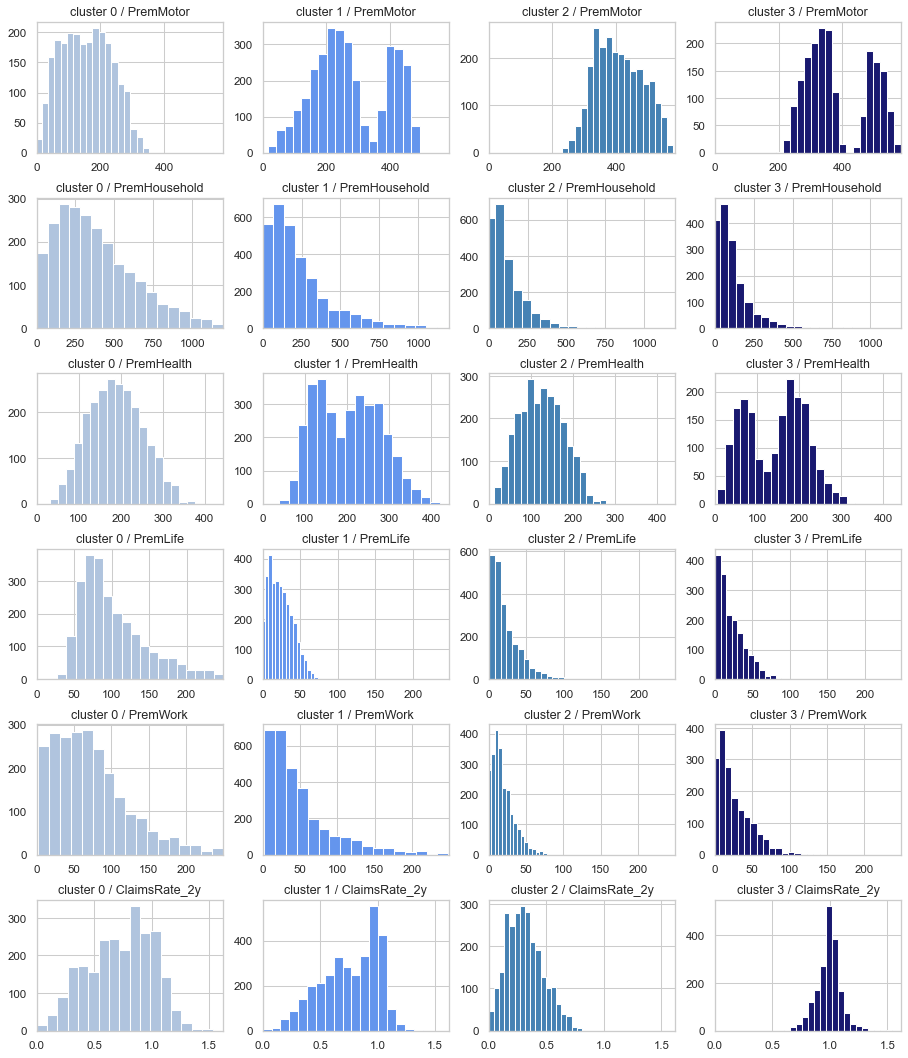

In [177]:
plot_hist(df_final_val[value_feat_label], 'value_labels')


### 2.2) K-Prototypes

In [179]:
df_dem_kp=df_scal[demographic_features_categorical]
df_dem_kp

Age  years_as_cust  annual_salary Children EducDeg
CustID                                                         
1       0.287879       0.623378       0.393345        1     2.0
2       0.090909       0.245748       0.073379        1     2.0
3       0.469697       0.401274       0.414676        0     1.0
4       0.303030       0.439193       0.163396        1     3.0
5       0.424242       0.587240       0.305034        1     3.0
...          ...            ...            ...      ...     ...
10291   0.030303       0.083672       0.062500        1     1.0
10292   0.787879       0.659181       0.609002        0     4.0
10294   0.378788       0.285223       0.551408        1     3.0
10295   0.363636       0.764632       0.349403        1     1.0
10296   0.303030       0.439193       0.529437        1     4.0

[10101 rows x 5 columns]

#### 2.2.1 Demographic perspective

In [180]:
# # Function for plotting elbow curve
# def plot_elbow_curve(start, end, data):
#     no_of_clusters = list(range(start, end+1))
#     cost_values = []
# #    
#     for k in no_of_clusters:
#         test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
#         test_model.fit_predict(data, categorical=[3,4])
#         cost_values.append(test_model.cost_)
# #        
#     sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
# #    
#     plt.figure(figsize=(15, 7))
#     ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
#     ax.set_title('Elbow curve', fontsize=18)
#     ax.set_xlabel('No of clusters', fontsize=14)
#     ax.set_ylabel('Cost', fontsize=14)
#     ax.set(xlim=(start-0.1, end+0.1))
#     plt.plot();
# #    
# # Plotting elbow curve for k=2 to k=10
# plot_elbow_curve(2,8,df_dem_kp)

In [181]:
kprot = KPrototypes(n_jobs = -1, n_clusters = 3, random_state = 42)
demographic_labels_kp = kprot.fit_predict(df_dem_kp, categorical = [3,4])

In [182]:
df_dem_kp

Age  years_as_cust  annual_salary Children EducDeg
CustID                                                         
1       0.287879       0.623378       0.393345        1     2.0
2       0.090909       0.245748       0.073379        1     2.0
3       0.469697       0.401274       0.414676        0     1.0
4       0.303030       0.439193       0.163396        1     3.0
5       0.424242       0.587240       0.305034        1     3.0
...          ...            ...            ...      ...     ...
10291   0.030303       0.083672       0.062500        1     1.0
10292   0.787879       0.659181       0.609002        0     4.0
10294   0.378788       0.285223       0.551408        1     3.0
10295   0.363636       0.764632       0.349403        1     1.0
10296   0.303030       0.439193       0.529437        1     4.0

[10101 rows x 5 columns]

In [183]:
df_dem_kp['demographic_labels'] = kprot.labels_
df_dem_kp['Segment'] = df_dem_kp['demographic_labels'].map({0:'0', 1:'1', 2:'2'})

df_dem_kp['Segment'] = df_dem_kp['Segment'].astype('category')
df_dem_kp['Segment'] = df_dem_kp['Segment'].cat.reorder_categories(['0','1','2'])

In [184]:
df_dem_kp

Age  years_as_cust  annual_salary Children EducDeg  \
CustID                                                            
1       0.287879       0.623378       0.393345        1     2.0   
2       0.090909       0.245748       0.073379        1     2.0   
3       0.469697       0.401274       0.414676        0     1.0   
4       0.303030       0.439193       0.163396        1     3.0   
5       0.424242       0.587240       0.305034        1     3.0   
...          ...            ...            ...      ...     ...   
10291   0.030303       0.083672       0.062500        1     1.0   
10292   0.787879       0.659181       0.609002        0     4.0   
10294   0.378788       0.285223       0.551408        1     3.0   
10295   0.363636       0.764632       0.349403        1     1.0   
10296   0.303030       0.439193       0.529437        1     4.0   

        demographic_labels Segment  
CustID                              
1                        1       1  
2                        1       1  
3                        0       0  
4                        1       1  
5                        0       0  
...                    ...     ...  
10291                    1       1  
10292                    2       2  
10294                    0       0  
10295                    0       0  
10296                    1       1  

[10101 rows x 7 columns]

In [185]:
df_dem_kp.rename(columns = {'demographic_labels':'Total'}, inplace = True)
df_dem_kp.groupby('Segment').agg(
    {
        
        'Children': lambda x: x.value_counts().index[0],
        'EducDeg': lambda x: x.value_counts().index[0],
        'Age': 'mean',
        'years_as_cust': 'mean',
        'annual_salary': 'mean',
    }
).reset_index()


Segment Children EducDeg       Age  years_as_cust  annual_salary
0       0        1     3.0  0.513038       0.641151       0.473004
1       1        1     2.0  0.231951       0.347271       0.257110
2       2        0     3.0  0.822202       0.552374       0.710110

In [186]:
demographic_feat_label_cat=['Age', 'years_as_cust', 'annual_salary',  'Children','EducDeg','Segment']


In [187]:
df_final_demkp = df_final.merge(df_dem_kp[['Segment']],on='CustID', how='left')


In [188]:
df_final_demkp.Children = df_final_demkp.Children.astype(int)
df_final_demkp.EducDeg = df_final_demkp.EducDeg.astype(float)

#df_final_demkp['EducDeg'] = df_final_demkp['EducDeg'].cat.as_ordered()


In [189]:
df_final_demkp[demographic_feat_label_cat]

Age  years_as_cust  annual_salary  Children  EducDeg Segment
CustID                                                              
1        34             31          26124         1      2.0       1
2        21             21           8124         1      2.0       1
3        46             25          27324         0      1.0       0
4        35             26          13188         1      3.0       1
5        43             30          21156         1      3.0       0
...     ...            ...            ...       ...      ...     ...
10291    17             17           7512         1      1.0       1
10292    67             32          38256         0      4.0       2
10294    40             22          35016         1      3.0       0
10295    39             35          23652         1      1.0       0
10296    35             26          33780         1      4.0       1

[10101 rows x 6 columns]

In [190]:
df_final_demkp.Segment = df_final_demkp.Segment.astype(int)

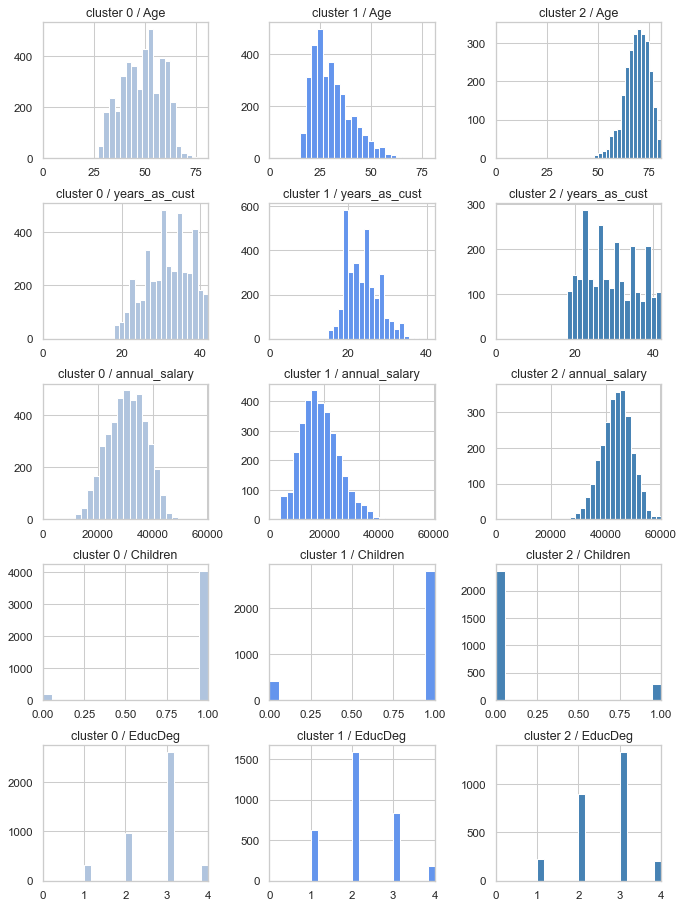

In [191]:
plot_hist(df_final_demkp[demographic_feat_label_cat], 'Segment')


In [192]:
metrics.silhouette_score(df_dem_kp, demographic_labels_kp, metric='euclidean')

0.4919014584518292

In [193]:
metrics.calinski_harabasz_score(df_dem_kp[demographic_features], demographic_labels_kp)

6710.180171952189

### 2.3) Mean-Shift Clustering

In [194]:
df_dem_ms=df_dem.copy()
df_val_ms=df_val.copy()

#### 2.3.1) Value Perspective

In [195]:
def mean_shift_clustering(data, quantile):
    
    # defining the bandwidth using estimate_bandwidth (based on distance to nearest neighbors for all observations)
    bandwidth = estimate_bandwidth(data, random_state = 5, n_jobs = -1, quantile = quantile)
    
    # performing mean-shift clustering with bandwidth estimated above
    ms = MeanShift(bandwidth = bandwidth, bin_seeding = True, n_jobs = -1) 
    
    # getting the labels from this clustering solution
    ms_labels = ms.fit_predict(data)

    # getting the number of different clusters
    ms_n_clusters = len(np.unique(ms_labels))
    print("Number of estimated clusters : %d" % ms_n_clusters)

    return ms_labels

In [196]:
# getting the labels for mean-shift clustering
ms_dem_labels = mean_shift_clustering(df_dem_ms, 0.09)

# print the clusters with the respective number of observtions
print(Counter(ms_dem_labels))

Number of estimated clusters : 5
Counter({0: 3245, 2: 1946, 3: 1874, 1: 1625, 4: 1411})


In [197]:
df_dem_ms = pd.concat([df_dem_ms, pd.Series(ms_dem_labels, index = df_dem_ms.index, name = 'demographic_labels')],
                           axis = 1)

In [198]:
df_dem_ms.groupby('demographic_labels').mean()

Age  years_as_cust  annual_salary
demographic_labels                                        
0                   0.207275       0.363313       0.238801
1                   0.623571       0.866565       0.555677
2                   0.445740       0.609623       0.416177
3                   0.736304       0.309821       0.647327
4                   0.821135       0.664417       0.713373

In [199]:
df_dem_ms

Age  years_as_cust  annual_salary  demographic_labels
CustID                                                            
1       0.287879       0.623378       0.393345                   2
2       0.090909       0.245748       0.073379                   0
3       0.469697       0.401274       0.414676                   2
4       0.303030       0.439193       0.163396                   0
5       0.424242       0.587240       0.305034                   2
...          ...            ...            ...                 ...
10291   0.030303       0.083672       0.062500                   0
10292   0.787879       0.659181       0.609002                   4
10294   0.378788       0.285223       0.551408                   2
10295   0.363636       0.764632       0.349403                   2
10296   0.303030       0.439193       0.529437                   2

[10101 rows x 4 columns]

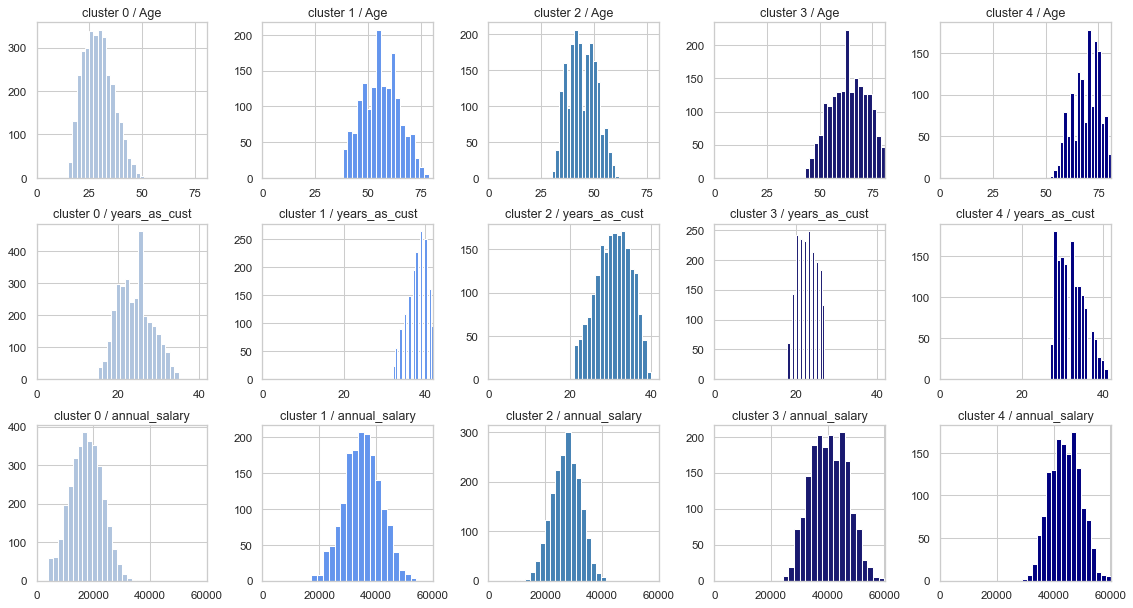

In [200]:
df_final_demms = df_final.merge(df_dem_ms[['demographic_labels']],on='CustID', how='left')
plot_hist(df_final_demms[demographic_feat_label], 'demographic_labels')


In [201]:
metrics.silhouette_score(df_dem_ms, ms_dem_labels, metric='euclidean')

0.776541569618738

In [202]:
metrics.calinski_harabasz_score(df_dem_ms, ms_dem_labels)

140170.84033367844

#### 2.3.2) Value perspective

In [203]:
# get the labels 
ms_val_labels = mean_shift_clustering(df_val_ms, 0.08)

# print the clusters with the respective number of observtions
print(Counter(ms_val_labels))

Number of estimated clusters : 5
Counter({0: 9332, 1: 685, 3: 74, 2: 9, 4: 1})


In [204]:
df_val_ms = pd.concat([df_val_ms, pd.Series(ms_val_labels, index = df_val_ms.index, name = 'value_labels')],
                           axis = 1)

In [205]:
df_val_ms.groupby('value_labels').mean()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
value_labels                                                             
0              0.545834       0.737770    0.589653  0.267888  0.299457   
1              0.155002       0.815286    0.588559  0.726470  0.671340   
2              0.800619       0.000000    0.367628  0.111035  0.224732   
3              0.294480       0.642806    0.664491  0.399747  0.695575   
4              0.283610       0.000000    0.632686  0.379993  0.878810   

              ClaimsRate_2y  
value_labels                 
0                  0.415305  
1                  0.448455  
2                  0.769547  
3                  0.727311  
4                  0.858025

In [206]:
value_feat_label = ['PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'ClaimsRate_2y', 'value_labels']

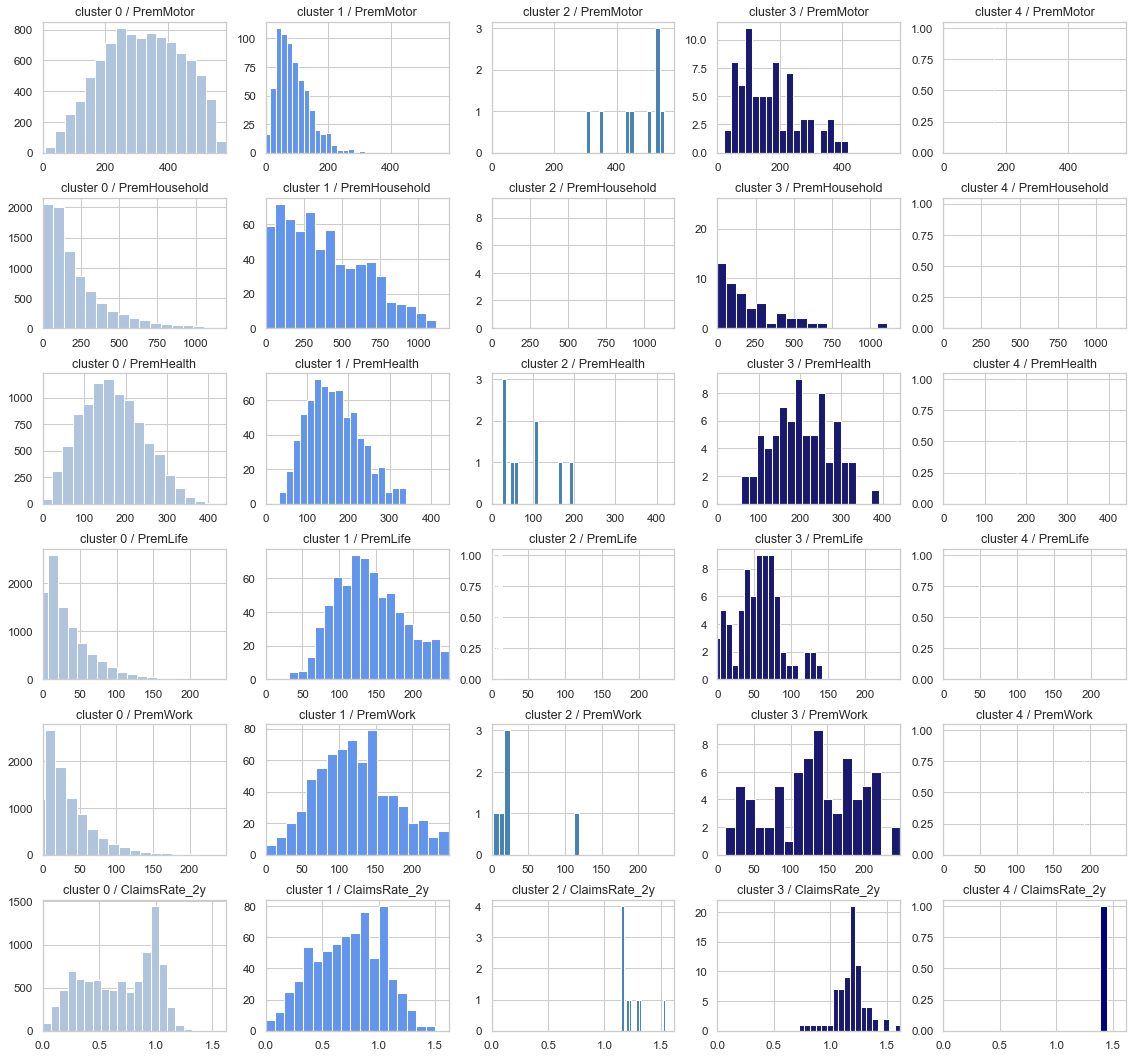

In [207]:
df_final_valms = df_final.merge(df_val_ms[['value_labels']],on='CustID', how='left')
plot_hist(df_final_valms[value_feat_label], 'value_labels')


In [208]:
metrics.silhouette_score(df_val_ms, ms_val_labels, metric='euclidean')

0.5810941784527742

In [209]:
metrics.calinski_harabasz_score(df_val_ms, ms_val_labels)

2351.065641429352

### 2.4) SOM

https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

In [209]:
# clustering = DBSCAN(eps=3, min_samples=2).fit(df_db)
# db_labels = clustering.labels_
# df_db['dbscan_cluster'] = db_labels

# df_db['dbscan_cluster'].unique()

In [210]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df[non_metric_features])]
print('Categorical columns           : {}'.format(list(df[non_metric_features])))
print('Categorical columns position  : {}'.format(catColumnsPos))

KeyError: "['EducDeg_2.0', 'EducDeg_3.0', 'EducDeg_4.0'] not in index"

In [ ]:
dfMatrix = df.to_numpy()
dfMatrix

In [ ]:
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 8), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### c) Self-Organizing Map

#### Definition and Overview

In [ ]:
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors

from matplotlib.lines import Line2D
from matplotlib import __version__ as mplver


import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [ ]:
df_dem_som = df_dem.copy()
df_val_som = df_val.copy()

In [ ]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [ ]:
def plot_component_planes(weights,
                          features,
                          M=3, N=4, 
                          figsize=(20,20),
                          figlayout=(3,4),
                          title="Component Planes",
                          cmap=cm.magma
                         ):
    
    xx, yy = np.meshgrid(np.arange(M), np.arange(N))
    xx = xx.astype(float)
    yy = yy.astype(float)

    xx[::-2] -= 0.5

    xx = xx.T
    yy = yy.T
    
    weights_ = weights.reshape((M,N,len(features)))

    fig = plt.figure(figsize=figsize, constrained_layout=True)
    subfigs = fig.subfigures(figlayout[0], figlayout[1], wspace=.15)
    
    ## Normalize color scale to range of all values
    colornorm = mpl_colors.Normalize(vmin=np.min(weights), 
                                         vmax=np.max(weights))

    for cpi, sf in zip(range(len(metric_features)), subfigs.flatten()):

        sf.suptitle(features[cpi], y=0.95)

        axs = sf.subplots(1,1, )
        axs.set_aspect('equal')

        ## Normalize color scale to range of values in each component
        colornorm = mpl_colors.Normalize(vmin=np.min(weights_[:,:,cpi]), 
                                         vmax=np.max(weights_[:,:,cpi]))

        # iteratively add hexagons
        for i in range(weights_.shape[0]):
            for j in range(weights_.shape[1]):
                wy = yy[(i, j)] * np.sqrt(3) / 2
                hexagon = RegularPolygon((xx[(i, j)], wy), 
                                     numVertices=6, 
                                     radius=.99 / np.sqrt(3),
                                     facecolor=cmap(colornorm(weights_[i, j, cpi])), 
                                     alpha=1, 
                                     linewidth=.5,
                                     edgecolor=cmap(colornorm(weights_[i, j, cpi]))
                                    )
                axs.add_patch(hexagon)


       
        mplv = [int(i) for i in mplver.split('.')]
        if mplv[1] >= 6:
            ## Add colorbar
            divider = make_axes_locatable(axs)

            ax_cb = divider.append_axes("right", size="7%")#, pad="2%")

            ## Create a Mappable object
            cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
            cmap_sm.set_array([])

            ## Create custom colorbar 
            cb1 = colorbar.Colorbar(ax_cb,
                                    orientation='vertical', 
                                    alpha=1,
                                    mappable=cmap_sm
                                    )
            cb1.ax.get_yaxis().labelpad = 16

            ## Add colorbar to plot
            sf.add_axes(ax_cb)



        ## Remove axes for hex plot
        axs.margins(.05)
        axs.axis("off")


    fig.suptitle(title)
    plt.show()

In [ ]:
def apply_clustering_on_som(trained_som, dataset, cluster_algo):
    '''
    Performs a sklearn clustering model on top of the nodes of a trained SOM.

    # Arguments:
    trained_som, sompy object: SOM trained on the input dataset.
    dataset, pd DataFrame: Input dataframe.
    cluster_algo, sklearn object: Clustering model from scikit-learn.

    # Returns:

    '''

    # Saves the nodes of the trained SOM.
    nodes = trained_som.codebook.matrix

    # Predicts the labels based on the nodes of the SOM.
    labels = cluster_algo.fit_predict(nodes)

    # Sets the cluster labels of the SOM.
    trained_som.cluster_labels = labels

    # Calculate the silhouette score. 
    # For optimal clustering we want 2 clusters minimum, therfore
    # the score is set to zero, if only one cluster is predicted.
    if len(np.unique(labels)) != 1:

        score = np.round(silhouette_score(nodes, labels), 4)
    
    else: score = 0
    
    # Saves the nodes in a dataframe and add the predicted labels.
    dataset_nodes = pd.DataFrame(nodes, columns= dataset.columns)
    dataset_nodes['Cluster'] = labels

    # Get the best matching unit for each row in the dataset.
    bmu_set = trained_som.find_bmu(dataset.values)[0]

    # Concats the input dataset with the BMUs.
    dataset_bmus = pd.DataFrame(np.concatenate((dataset, np.expand_dims(bmu_set, 1)), axis=1),
                                index= dataset.index, 
                                columns= np.append(dataset.columns,"BMU")
                                )

    # Merge the cluster labels and nodes on column BMU, 
    # to get the final clusters for each row.
    dataset = dataset_bmus.merge(dataset_nodes['Cluster'], 'left', left_on="BMU", right_index=True)

    return dataset.drop("BMU", axis=1), score

#### SOMPY application using Function

##### SOM for Value Features (using function)

In [ ]:
# Initialize and train a SOM with different neighborhood, 
# mapsize and lattice parameters.
# Saves them in a dictionary, according to a key, which is a combination
# of the neighborhood and lattice.

single_som_dict = {}

neighborhood_list = ["gaussian", "bubble"]
mapsize_list = ["rect", "hex"]
lattice_list = ["rect", "hexa"]

for neighborhood in neighborhood_list:
   
    for lattice in lattice_list:

        if lattice == "hexa":
            
            mapsize = "hex"
        
        else: mapsize = "rect"

        # Sets the random seed manually, because sompy is not
        # supporting this parameter.
        np.random.seed(42)      

        # Initialize the SOM with given parameters. The mapsize
        # is set to [2,2], that we get maximum 4 clusters.
        som = sompy.SOMFactory().build(
                                    data=df_val_som.values,
                                    neighborhood= neighborhood,
                                    normalization="var",
                                    mapsize= [2,2],
                                    lattice= lattice,
                                    initialization= "random",
                                    training="seq",
                                    component_names=df_val_som.columns
                                    )

        # Trains the SOM.
        som.train(n_job=-1, verbose='info', train_rough_len=30, train_finetune_len=100)

        # Defines the key for the dictionary.
        key = neighborhood + "_" + lattice
        
        # Saves the trained SOM in the dictionary.
        single_som_dict[key] = som

In [ ]:
# combination of parameters.

# Loops every trained SOM in the dictionary.
for key in single_som_dict.keys():

    # Selects the iterated SOM.
    som = single_som_dict[key]

    # Get the best matching unit for each row in the dataset.
    labels = som.find_bmu(df_val_som.values)[0]

    # Calculate the silhouette score. 
    # For optimal clustering we want 2 clusters minimum, therfore
    # the score is set to zero, if only one cluster is predicted.
    if len(np.unique(labels)) != 1:

        score = np.round(silhouette_score(df_val_som, labels), 4)

    else: score = 0

    # Prints the score and the parameters of the SOM.
    print(f"{key} score is {score}")

In [ ]:
# Plot the histograms for all Prems for the 
# SOM parameters which has the highest score.

df_val_som_hexa = df_val_som.copy()

# Defines the SOM.
som_final = single_som_dict["bubble_hexa"]

# Get the best matching unit for each row in the dataset
# and assigns the clusters to the dataset.
df_val_som_hexa["Cluster"] = som_final.find_bmu(df_val_som_hexa.values)[0]

display(df_val_som_hexa.groupby("Cluster").count().iloc[:,0])

##### SOM for Demographic Features (using function)

In [ ]:
# Initialize and train a SOM with different neighborhood, 
# mapsize and lattice parameters.
# Saves them in a dictionary, according to a key, which is a combination
# of the neighborhood and lattice.

single_som_dict = {}

neighborhood_list = ["gaussian", "bubble"]
mapsize_list = ["rect", "hex"]
lattice_list = ["rect", "hexa"]

for neighborhood in neighborhood_list:
   
    for lattice in lattice_list:

        if lattice == "hexa":
            
            mapsize = "hex"
        
        else: mapsize = "rect"

        # Sets the random seed manually, because sompy is not
        # supporting this parameter.
        np.random.seed(42)      

        # Initialize the SOM with given parameters. The mapsize
        # is set to [2,2], that we get maximum 4 clusters.
        som = sompy.SOMFactory().build(
                                    data=df_dem_som.values,
                                    neighborhood= neighborhood,
                                    normalization="var",
                                    mapsize= [2,2],
                                    lattice= lattice,
                                    initialization= "random",
                                    training="seq",
                                    component_names=df_val_som.columns
                                    )

        # Trains the SOM.
        som.train(n_job=-1, verbose='info', train_rough_len=30, train_finetune_len=100)

        # Defines the key for the dictionary.
        key = neighborhood + "_" + lattice
        
        # Saves the trained SOM in the dictionary.
        single_som_dict[key] = som

In [ ]:
# combination of parameters.

# Loops every trained SOM in the dictionary.
for key in single_som_dict.keys():

    # Selects the iterated SOM.
    som = single_som_dict[key]

    # Get the best matching unit for each row in the dataset.
    labels = som.find_bmu(df_dem_som.values)[0]

    # Calculate the silhouette score. 
    # For optimal clustering we want 2 clusters minimum, therfore
    # the score is set to zero, if only one cluster is predicted.
    if len(np.unique(labels)) != 1:

        score = np.round(silhouette_score(df_dem_som, labels), 4)

    else: score = 0

    # Prints the score and the parameters of the SOM.
    print(f"{key} score is {score}")

In [ ]:
# Plot the histograms for all Prems for the 
# SOM parameters which has the highest score.

df_dem_som_hexa = df_dem_som.copy()

# Defines the SOM.
som_final = single_som_dict["bubble_rect"]

# Get the best matching unit for each row in the dataset
# and assigns the clusters to the dataset.
df_dem_som_hexa["Cluster"] = som_final.find_bmu(df_dem_som_hexa.values)[0]

display(df_dem_som_hexa.groupby("Cluster").count().iloc[:,0])

In [ ]:
# Initialize and train a SOM with different neighborhood, 
# mapsize and lattice parameters.
# Saves them in a dictionary, according to a key, which is a combination
# of the neighborhood and lattice.

combi_som_dict = {}

neighborhood_list = ["gaussian", "bubble"]
mapsize_list = ["rect", "hex"]
lattice_list = ["rect", "hexa"]

for neighborhood in neighborhood_list:
   
    for lattice in lattice_list:

        if lattice == "hexa":
            
            mapsize = "hex"
        
        else: mapsize = "rect"

        # Sets the random seed manually, because sompy is not
        # supporting this parameter.
        np.random.seed(42)      

        # Initialize the SOM with given parameters. The mapsize
        # is set to [2,2], that we get maximum 4 clusters.
        som = sompy.SOMFactory().build(
                                    data=df_val_som.values,
                                    neighborhood= neighborhood, 
                                    normalization="var",
                                    mapsize=som.calculate_map_size(mapsize), 
                                    lattice= lattice, 
                                    initialization= "random", 
                                    training="seq",
                                    component_names=df_val_som.columns
                                    )

        # Trains the SOM.
        som.train(n_job=-1, verbose='info', train_rough_len=30, train_finetune_len=100)

        # Defines the key for the dictionary.
        key = neighborhood + "_" + lattice
        
        # Saves the trained SOM in the dictionary.
        combi_som_dict[key] = som

In [ ]:
# Initializes a dictionary, to save the 
# dataset, score and number of clusters
# for the best silhouette score.

best_score = {}

# Loops every trained SOM in the dictionary.
for key in combi_som_dict.keys():

    # Selects the iterated SOM.
    som = combi_som_dict[key]

    # Initialize the best score for kmeans
    # and hierarchical.
    best_kmeans_score = -1
    best_hier_score = -1

    # Checks the silhouette scores for 2, 3 and 4 clusters.
    for k in range(2, 5):

        # Initialize kmeans model and pass to the defined function,
        # which gives us the dataset with clusters and the silhouette score.
        kmeans = KMeans(n_clusters= k, init='k-means++', n_init=20, random_state=42)
        kmeans_dataset, kmeans_score = apply_clustering_on_som(som, df_val_som, kmeans)

        # Saves the best score, best k and associated dataframe in the
        # dictionary.
        if kmeans_score > best_kmeans_score:

            best_kmeans_score = kmeans_score
            best_score[f"KMeans_{key}"] = [best_kmeans_score, k, kmeans_dataset]    

        # Initialize hierarchical model and pass to the defined function,
        # which gives us the dataset with clusters and the silhouette score.
        hierarchical = AgglomerativeClustering(n_clusters= k, linkage='ward')
        hier_dataset, hier_score = apply_clustering_on_som(som, df_val_som, hierarchical)

        # Saves the best score, best k and associated dataframe in the
        # dictionary.
        if hier_score > best_hier_score:

            best_hier_score = hier_score
            best_score[f"Hier_{key}"] = [best_hier_score, k, hier_dataset]

In [ ]:
# Saves the results in dataframe and sets the columns.
# Only columns Score and number of clusters is displayed,
# because we want to identify the best combination
# of KMeans or hiearchical and SOM.

result_table  = pd.DataFrame(best_score).T  

result_table.columns = ["Score", "Number_Clusters", "Dataset"]

result_table = result_table[['Score', 'Number_Clusters']]

result_table

In [ ]:
# Initialize and train a SOM with different neighborhood, 
# mapsize and lattice parameters.
# Saves them in a dictionary, according to a key, which is a combination
# of the neighborhood and lattice.

combi_som_dict = {}

neighborhood_list = ["gaussian", "bubble"]
mapsize_list = ["rect", "hex"]
lattice_list = ["rect", "hexa"]

for neighborhood in neighborhood_list:
   
    for lattice in lattice_list:

        if lattice == "hexa":
            
            mapsize = "hex"
        
        else: mapsize = "rect"

        # Sets the random seed manually, because sompy is not
        # supporting this parameter.
        np.random.seed(42)      

        # Initialize the SOM with given parameters. The mapsize
        # is set to [2,2], that we get maximum 4 clusters.
        som = sompy.SOMFactory().build(
                                    data=df_dem_som.values,
                                    neighborhood= neighborhood, 
                                    normalization="var",
                                    mapsize=som.calculate_map_size(mapsize), 
                                    lattice= lattice, 
                                    initialization= "random", 
                                    training="seq",
                                    component_names=df_dem_som.columns
                                    )

        # Trains the SOM.
        som.train(n_job=-1, verbose='info', train_rough_len=30, train_finetune_len=100)

        # Defines the key for the dictionary.
        key = neighborhood + "_" + lattice
        
        # Saves the trained SOM in the dictionary.
        combi_som_dict[key] = som

In [ ]:
# Initializes a dictionary, to save the 
# dataset, score and number of clusters
# for the best silhouette score.

best_score = {}

# Loops every trained SOM in the dictionary.
for key in combi_som_dict.keys():

    # Selects the iterated SOM.
    som = combi_som_dict[key]

    # Initialize the best score for kmeans
    # and hierarchical.
    best_kmeans_score = -1
    best_hier_score = -1

    # Checks the silhouette scores for 2, 3 and 4 clusters.
    for k in range(2, 5):

        # Initialize kmeans model and pass to the defined function,
        # which gives us the dataset with clusters and the silhouette score.
        kmeans = KMeans(n_clusters= k, init='k-means++', n_init=20, random_state=42)
        kmeans_dataset, kmeans_score = apply_clustering_on_som(som, df_dem_som, kmeans)

        # Saves the best score, best k and associated dataframe in the
        # dictionary.
        if kmeans_score > best_kmeans_score:

            best_kmeans_score = kmeans_score
            best_score[f"KMeans_{key}"] = [best_kmeans_score, k, kmeans_dataset]    

        # Initialize hierarchical model and pass to the defined function,
        # which gives us the dataset with clusters and the silhouette score.
        hierarchical = AgglomerativeClustering(n_clusters= k, linkage='ward')
        hier_dataset, hier_score = apply_clustering_on_som(som, df_dem_som, hierarchical)

        # Saves the best score, best k and associated dataframe in the
        # dictionary.
        if hier_score > best_hier_score:

            best_hier_score = hier_score
            best_score[f"Hier_{key}"] = [best_hier_score, k, hier_dataset]

In [ ]:
# Saves the results in dataframe and sets the columns.
# Only columns Score and number of clusters is displayed,
# because we want to identify the best combination
# of KMeans or hiearchical and SOM.

result_table  = pd.DataFrame(best_score).T  

result_table.columns = ["Score", "Number_Clusters", "Dataset"]

result_table = result_table[['Score', 'Number_Clusters']]

result_table

#### SOMPY ONLY, manual

##### SOMPY only, Demographic manual 

In [ ]:
# SOM for demographic features: 
np.random.seed(0)

sm_only_dem = sompy.SOMFactory().build(
    df_dem_som[demographic_features].values, 
    mapsize=[5,5],  # geändert von [3,1]
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    component_names=demographic_features, 
)
sm_only_dem.train(n_job=-1 ,train_rough_len=1000, train_finetune_len=1000)

In [ ]:
# Assign labels to observations in df_dem
n_clusters = 3  # specify number of clusters
clusters = [0,1,2]
df_dem_som['cluster'] = -1  # initialize cluster labels to -1
for i, obs in df_dem_som.iterrows():
    min_dist = float('inf')  # initialize minimum distance to infinity
    for j, neuron in enumerate(sm_only_dem.codebook.matrix):
        dist = np.linalg.norm(obs[demographic_features].values - neuron)  # calculate distance between observation and neuron
        if dist < min_dist:  # update minimum distance and cluster label if distance is smaller
            min_dist = dist
            cluster = clusters[j % n_clusters]  # use modulo to ensure index is within bounds
    df_dem_som.at[i, 'cluster'] = cluster  # assign cluster label to observation

In [ ]:
df_dem_som.groupby('cluster').count()


In [ ]:
sst_dem = get_ss(df_dem_som[demographic_features])  # get total sum of squares
ssw_dem_labels = df_dem_som[demographic_features + ["cluster"]].groupby(by='cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb_dem = sst_dem - np.sum(ssw_dem_labels)  # remember: SST = SSW + SSB
r2_dem = ssb_dem / sst_dem
r2_dem

In [ ]:
def cluster_var_dist(df, cluster_label_name):
    df["CustID"] = df.index
    df.rename({cluster_label_name:"cluster"}, axis = 1, inplace = True)
    df = df.melt(id_vars = ["cluster", "CustID"])
    g = sns.FacetGrid(df, col="cluster", row="variable", palette="crest", hue = "variable")
    g.map(sns.histplot, "value")

In [ ]:
df_dem_som['cluster']


In [ ]:
demographic_feat_label_som=['Age', 'years_as_cust', 'annual_salary', 'cluster']

In [ ]:
df_final_dem_som = df_final.merge(df_dem_som[['cluster']],on='CustID', how='left')


In [ ]:
plot_hist(df_final_dem_som[demographic_feat_label_som], 'cluster')


In [ ]:
# umatrix for demographic variables
u = sompy.umatrix.UMatrixView(5, 5, 'umatrix (demographic features)', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm_only_dem, 
    distance=2,
    row_normalized=False,
    show_data=True, 
    contour=True, # Visualize isomorphic curves
    blob=True
)

In [ ]:
# hit map for demographic features
vhts  = BmuHitsView(12,12,"Hits Map for demographic features")
vhts.show(sm_only_dem, anotate=True, onlyzeros=False, labelsize=12, cmap="viridis")
plt.show()

##### SOMPY only, Value manual 

In [ ]:
# SOM for value features: 
np.random.seed(0)

sm_only_val = sompy.SOMFactory().build(
    df_val_som[value_features].values, 
    mapsize=[10,10],  # geändert von [3,1]
    initialization='random', 
    neighborhood='gaussian',
    training='online',
    component_names=value_features, 
)
sm_only_dem.train(n_job=-1 ,train_rough_len=1000, train_finetune_len=1000)

In [ ]:
# Assign labels to observations in df_dem
n_clusters = 4  # specify number of clusters
clusters = [0, 1, 2, 3]
df_val_som['cluster'] = -1  # initialize cluster labels to -1
for i, obs in df_val_som.iterrows():
    min_dist = float('inf')  # initialize minimum distance to infinity
    for j, neuron in enumerate(sm_only_val.codebook.matrix):
        dist = np.linalg.norm(obs[value_features].values - neuron)  # calculate distance between observation and neuron
        if dist < min_dist:  # update minimum distance and cluster label if distance is smaller
            min_dist = dist
            cluster = clusters[j % n_clusters]  # use modulo to ensure index is within bounds
    df_val_som.at[i, 'cluster'] = cluster  # assign cluster label to observation

In [ ]:
df_val_som.groupby('cluster').count()


In [ ]:
sst_val = get_ss(df_val_som[value_features])  # get total sum of squares
ssw_val_labels = df_val_som[value_features + ["cluster"]].groupby(by='cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb_val = sst_val - np.sum(ssw_val_labels)  # remember: SST = SSW + SSB
r2_val = ssb_val / sst_val
r2_val

#### SOMPY manual preparation for KMeans and Hierarchical

In [ ]:
# SOM for demographic features: 
np.random.seed(0)

sm_dem = sompy.SOMFactory().build(
    df_dem[demographic_features].values, 
    mapsize=[20,20],
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    component_names=demographic_features, 
)
sm_dem.train(n_job=-1 ,train_rough_len=100, train_finetune_len=100)
# SOM for value features: 

In [ ]:
# SOM for value features: 
np.random.seed(0)
sm_val = sompy.SOMFactory().build(
    df_val[value_features].values, 
    mapsize=[20, 20],
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    component_names=value_features, 
)
sm_val.train(n_job=-1,  train_rough_len=100, train_finetune_len=100)

##### SOMPY Component Planes

In [ ]:
plt.rcParams['figure.dpi'] = 72


In [ ]:
# plotting of component planes for dem:
plot_component_planes(weights=sm_dem.codebook.matrix,features=demographic_features,
                     M=20,N=20,
                     figsize=(16,4),figlayout=(1,3),
                     title="Component Planes (demographic)",
                     cmap=sns.color_palette("rocket", as_cmap=True))

In [ ]:
# plotting of component planes for val:
plot_component_planes(weights=sm_val.codebook.matrix,features=value_features,
                     M=20,N=20,
                     figsize=(16,10),figlayout=(2,3),
                     title="Component Planes (demographic)",
                     cmap=sns.color_palette("rocket", as_cmap=True))

##### Unified Distance Matrix (U-Matrix)
Calculates average distance to all its neighbors in the input space.
The U-Matrix is often visualized as a heat map, with darker colors representing smaller distances and lighter colors representing larger distances. By looking at the U-matrix, you can identify patterns and relationships between neurons in the SOM and evaluate the quality of the SOM map.

TO DO: 
- Analysis of Clustering of units
- Analysis of Potential outliers (units that are very far from their neighbors and have low frequency).

In [ ]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(20, 20, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm_val, 
    distance=2,
    row_normalized=False,
    show_data=True, 
    contour=True, # Visualize isomorphic curves
    blob=True
)

np.flip(UMAT[1], axis=1) # U-matrix values - they match with the plot colors

In [ ]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(20, 20, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm_dem, 
    distance=2,
    row_normalized=False,
    show_data=True, 
    contour=True, # Visualize isomorphic curves
    blob=True
)

np.flip(UMAT[1], axis=1) # U-matrix values - they match with the plot colors

##### Hit Map
The color or intensity of each unit on the hit map reflects the number
of times that unit has been "hit" by a data point during training.
This can be used to identify patterns in the data and understand 
the distribution of data points on the Kohonen network.

In [ ]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm_val, anotate=True, onlyzeros=False, labelsize=12, cmap="viridis")
plt.show()

In [ ]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm_dem, anotate=True, onlyzeros=False, labelsize=12, cmap="viridis")
plt.show()

TO DO : Analyse these plots from the following perspectives:
- Feature importance
- Feature correlation (both globally and locally)
- Data distribution
- Outlier detection
!!!

#### Kmeans on top of SOM units

In [ ]:
# Perform K-Means clustering on top of the units
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
nodeclus_labels_kmeans = kmeans.fit_predict(sm_dem.codebook.matrix)
sm_dem.cluster_labels = nodeclus_labels_kmeans  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering kmeans", text_size=10)
hits.show(sm_dem, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
# Perform K-Means clustering on top of the units
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels_kmeans = kmeans.fit_predict(sm_val.codebook.matrix)
sm_val.cluster_labels = nodeclus_labels_kmeans  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering kmeans", text_size=10)
hits.show(sm_val, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

#### Hierarchical Clustering on top of SOM units

In [ ]:
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
nodeclus_labels_hier = hierclust.fit_predict(sm_dem.codebook.matrix)
sm_dem.cluster_labels = nodeclus_labels_hier  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm_dem, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
nodeclus_labels_hier = hierclust.fit_predict(sm_val.codebook.matrix)
sm_val.cluster_labels = nodeclus_labels_hier  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm_val, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

#### Final SOM Clustering Solution

In [ ]:
# Check the nodes and and respective clusters
nodes = sm.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=metric_features)
df_nodes['cluster'] = nodeclus_labels_hier
df_nodes

In [ ]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(df[metric_features])[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((df, np.expand_dims(bmus_map,1)), axis=1),
    index=df.index, columns=np.append(df.columns,"BMU")
)
df_bmus

In [ ]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['cluster'], 'left', left_on="BMU", right_index=True)
df_final

In [ ]:
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('cluster').mean()

### 3.5) DBSCAN

In [ ]:
df_db = df_og_selected.copy()
df_db

Children  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1              1       0.240741   0.644732       0.705788    0.565258   
2              1       0.691358   0.138411       0.866987    0.491779   
3              0       0.172840   0.356778       0.797974    0.512369   
4              1       0.611111   0.316614       0.668827    0.849789   
5              1       0.555556   0.581559       0.673947    0.642704   
...          ...            ...        ...            ...         ...   
10291          1       0.524691   0.018665       0.959618    0.454340   
10292          0       0.592593   0.675089       0.675799    0.624981   
10294          1       0.129630   0.691870       0.747054    0.555686   
10295          1       0.401235   0.326981       0.791618    0.673095   
10296          1       0.166667   0.709602       0.718672    0.553330   

        PremLife  PremWork       Age  years_as_cust  annual_salary  \
CustID                                                               
1       0.373616  0.229047  0.287879       0.623378       0.393345   
2       0.882790  0.643019  0.090909       0.245748       0.073379   
3       0.552933  0.618536  0.469697       0.401274       0.414676   
4       0.309203  0.300515  0.303030       0.439193       0.163396   
5       0.205143  0.373285  0.424242       0.587240       0.305034   
...          ...       ...       ...            ...            ...   
10291   0.651222  0.901395  0.030303       0.083672       0.062500   
10292   0.140668  0.214920  0.787879       0.659181       0.609002   
10294   0.162081  0.143999  0.378788       0.285223       0.551408   
10295   0.456759  0.665491  0.363636       0.764632       0.349403   
10296   0.118521  0.201984  0.303030       0.439193       0.529437   

        EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  
CustID                                         
1                 1            0            0  
2                 1            0            0  
3                 0            0            0  
4                 0            1            0  
5                 0            1            0  
...             ...          ...          ...  
10291             0            0            0  
10292             0            0            1  
10294             0            1            0  
10295             0            0            0  
10296             0            0            1  

[10101 rows x 13 columns]

#### Value

In [ ]:
#clustering = DBSCAN(eps=0.1, min_samples=100).fit(df_val)
clustering = DBSCAN(eps=0.1, min_samples=100).fit(df_val)
db_labels = clustering.labels_
df_db['dbscan_val_cluster'] = db_labels
df_val_db = df_val.copy()
df_val_db["cluster"] = db_labels
df_db['dbscan_val_cluster'].unique()

array([-1,  0,  1])

#### Demographic

In [ ]:
clustering = DBSCAN(eps=0.05, min_samples=4).fit(df_dem)
db_labels = clustering.labels_
df_db['dbscan_dem_cluster'] = db_labels
df_dem_db = df_dem.copy()
df_dem_db["cluster"] = db_labels
df_db['dbscan_dem_cluster'].unique()

array([ 0, -1,  1])

In [ ]:
df_dem_db

#### Profiling

In [211]:
def cluster_var_dist(df, cluster_label_name):
    df["CustID"] = df.index
    df.rename({cluster_label_name:"cluster"}, axis = 1, inplace = True)
    df = df.melt(id_vars = ["cluster", "CustID"])
    g = sns.FacetGrid(df, col="cluster", row="variable", palette="crest", hue = "variable")
    g.map(sns.histplot, "value")

In [212]:
# !pip install umap
# !pip install umap-learn
# # for viz of umap
# !pip install datashader
# !pip install bokeh
# !pip install holoviews

In [213]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import umap.plot

def plot_umap(df, cluster_label_name):
    reducer = umap.UMAP()
    projected_data = reducer.fit_transform(df)
    umap.plot.points(reducer, labels=df[cluster_label_name], theme = "fire")

In [214]:
plot_umap(df_dem_db, "cluster")

NameError: name 'df_dem_db' is not defined

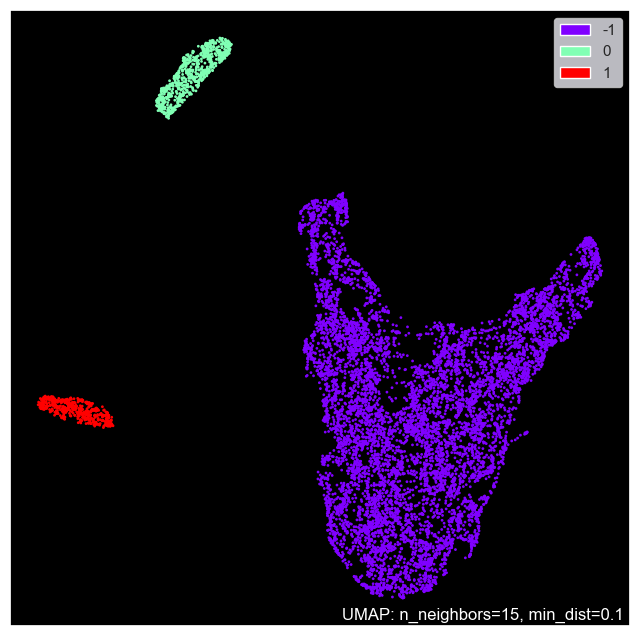

In [ ]:
plot_umap(df_val_db, "dbscan_val_cluster")


In [215]:
df_final_dem_db = df_final.merge(df_val_db[['cluster']],on='CustID', how='left')


NameError: name 'df_val_db' is not defined

In [ ]:

df_dem_db.groupby('cluster').count()


Age  years_as_cust  annual_salary
cluster                                     
-1          74             74             74
 0       10023          10023          10023
 1           4              4              4

In [ ]:
df_val_db.groupby('cluster').count()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
cluster                                                             
-1            8782           8782        8782      8782      8782   
 0             780            780         780       780       780   
 1             539            539         539       539       539   

         ClaimsRate_2y  
cluster                 
-1                8782  
 0                 780  
 1                 539

# VII.  Final Cluster Solution

## Formating final Dataset and cluster Labels

`df_val_km_h` std dataset with solution of value_labels - only value features
`df_dem_ms` std dataset with solution of demographic_labels - only demographic features

In [210]:
df_og_selected

Children  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1              1       0.240741   0.644732       0.705788    0.565258   
2              1       0.691358   0.138411       0.866987    0.491779   
3              0       0.172840   0.356778       0.797974    0.512369   
4              1       0.611111   0.316614       0.668827    0.849789   
5              1       0.555556   0.581559       0.673947    0.642704   
...          ...            ...        ...            ...         ...   
10291          1       0.524691   0.018665       0.959618    0.454340   
10292          0       0.592593   0.675089       0.675799    0.624981   
10294          1       0.129630   0.691870       0.747054    0.555686   
10295          1       0.401235   0.326981       0.791618    0.673095   
10296          1       0.166667   0.709602       0.718672    0.553330   

        PremLife  PremWork       Age  years_as_cust  annual_salary  \
CustID                                                               
1       0.373616  0.229047  0.287879       0.623378       0.393345   
2       0.882790  0.643019  0.090909       0.245748       0.073379   
3       0.552933  0.618536  0.469697       0.401274       0.414676   
4       0.309203  0.300515  0.303030       0.439193       0.163396   
5       0.205143  0.373285  0.424242       0.587240       0.305034   
...          ...       ...       ...            ...            ...   
10291   0.651222  0.901395  0.030303       0.083672       0.062500   
10292   0.140668  0.214920  0.787879       0.659181       0.609002   
10294   0.162081  0.143999  0.378788       0.285223       0.551408   
10295   0.456759  0.665491  0.363636       0.764632       0.349403   
10296   0.118521  0.201984  0.303030       0.439193       0.529437   

        EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  
CustID                                         
1                 1            0            0  
2                 1            0            0  
3                 0            0            0  
4                 0            1            0  
5                 0            1            0  
...             ...          ...          ...  
10291             0            0            0  
10292             0            0            1  
10294             0            1            0  
10295             0            0            0  
10296             0            0            1  

[10101 rows x 13 columns]

In [211]:
df_final_sol_std = df_og_selected.merge(df_val_km_h[['value_labels']],on='CustID', how='left')

In [212]:
df_final_sol_std = df_final_sol_std.merge(df_dem_ms[['demographic_labels']],on='CustID', how='left')

In [213]:
# Count label frequencies (contigency table)
df_final_sol_std.groupby(['demographic_labels', 'value_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('value_labels', 'demographic_labels', 0)

demographic_labels     0    1    2    3    4
value_labels                                
0                   1290  237  203  376  318
1                   1051  467  502  665  564
2                    490  531  753  488  295
3                    414  390  488  345  234

#### manual merging

In [214]:
# Clusters with low frequency to be merged:
to_merge = [(0,1), (0,2), (0,3), (0,4), (2,4), (3,1), (3,0), (3,3), (3,4)]

df_centroids = df_final_sol_std.groupby([ 'value_labels','demographic_labels'])\
    [metric_features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 1): (0, 4),
 (0, 2): (0, 1),
 (0, 3): (0, 4),
 (2, 4): (2, 1),
 (3, 1): (1, 1),
 (3, 0): (1, 2),
 (3, 3): (1, 3),
 (3, 4): (1, 4)}

In [215]:
df_ = df_final_sol_std.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['value_labels']==source[0]) & (df_['demographic_labels']==source[1])
    df_.loc[mask, 'value_labels'] = target[0]
    df_.loc[mask, 'demographic_labels'] = target[1]

# New contigency table
df_.groupby(['demographic_labels', 'value_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('value_labels', 'demographic_labels', 0)

demographic_labels       0      1      2       3      4
value_labels                                           
0                   1290.0  203.0    NaN     NaN  931.0
1                   1051.0  857.0  916.0  1010.0  798.0
2                    490.0  826.0  753.0   488.0    NaN
3                      NaN    NaN  488.0     NaN    NaN

### Hierarchical mergins

In [216]:
# Centroids of the concatenated cluster labels
df_centroids = df_final_sol_std.groupby(['value_labels', 'demographic_labels'])\
    [metric_features].mean()
df_centroids

ClaimsRate_2y  PremMotor  PremHousehold  \
value_labels demographic_labels                                            
0            0                        0.448072   0.218884       0.842251   
             1                        0.455670   0.347013       0.804684   
             2                        0.457642   0.363323       0.799655   
             3                        0.435481   0.325199       0.802413   
             4                        0.460207   0.314679       0.802818   
1            0                        0.442442   0.388465       0.787310   
             1                        0.487681   0.554373       0.745425   
             2                        0.509640   0.600734       0.721028   
             3                        0.473146   0.487023       0.759726   
             4                        0.459121   0.439555       0.760202   
2            0                        0.206916   0.655879       0.693446   
             1                        0.185290   0.722926       0.681840   
             2                        0.178955   0.736070       0.668752   
             3                        0.191649   0.696669       0.699454   
             4                        0.228102   0.645451       0.705149   
3            0                        0.599988   0.579122       0.706794   
             1                        0.611966   0.714246       0.666216   
             2                        0.615981   0.732793       0.646540   
             3                        0.608642   0.658284       0.677446   
             4                        0.599399   0.577117       0.711202   

                                 PremHealth  PremLife  PremWork       Age  \
value_labels demographic_labels                                             
0            0                     0.629603  0.631268  0.518952  0.148943   
             1                     0.630590  0.557496  0.398549  0.685654   
             2                     0.623486  0.548647  0.399252  0.429318   
             3                     0.653043  0.556196  0.417246  0.778731   
             4                     0.673924  0.544332  0.419278  0.826377   
1            0                     0.703578  0.233096  0.423876  0.219820   
             1                     0.605004  0.208940  0.322367  0.650444   
             2                     0.587672  0.194865  0.280507  0.429313   
             3                     0.655861  0.230562  0.352720  0.763203   
             4                     0.704621  0.232983  0.356318  0.830566   
2            0                     0.556289  0.204719  0.220401  0.280272   
             1                     0.462375  0.192191  0.212046  0.598699   
             2                     0.465316  0.176057  0.200216  0.454384   
             3                     0.493639  0.201005  0.216092  0.686848   
             4                     0.546881  0.233133  0.239530  0.794864   
3            0                     0.620233  0.217950  0.269341  0.270788   
             1                     0.459961  0.181024  0.239823  0.587529   
             2                     0.464019  0.168696  0.208190  0.456129   
             3                     0.525503  0.194104  0.250553  0.708169   
             4                     0.622585  0.219764  0.259354  0.824398   

                                 years_as_cust  annual_salary  
value_labels demographic_labels                                
0            0                        0.308875       0.199119  
             1                        0.885117       0.597075  
             2                        0.623583       0.405870  
             3                        0.307839       0.678353  
             4                        0.662072       0.713975  
1            0                        0.391886       0.249164  
             1                        0.873363       0.571984  
             2                        0.630942       0.405815  
             3           

In [217]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

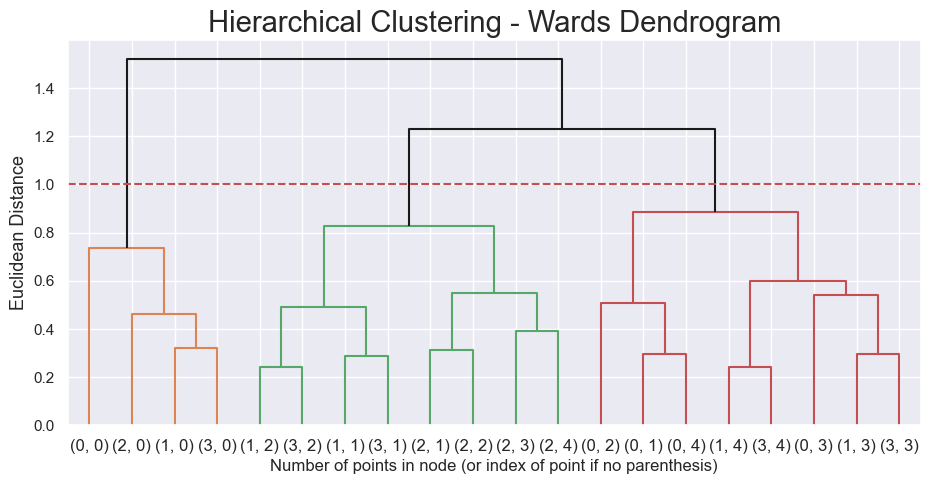

In [218]:

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 1
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - Wards Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [219]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=6
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

ClaimsRate_2y  PremMotor  PremHousehold  \
value_labels demographic_labels                                            
0            0                        0.448072   0.218884       0.842251   
             1                        0.455670   0.347013       0.804684   
             2                        0.457642   0.363323       0.799655   
             3                        0.435481   0.325199       0.802413   
             4                        0.460207   0.314679       0.802818   
1            0                        0.442442   0.388465       0.787310   
             1                        0.487681   0.554373       0.745425   
             2                        0.509640   0.600734       0.721028   
             3                        0.473146   0.487023       0.759726   
             4                        0.459121   0.439555       0.760202   
2            0                        0.206916   0.655879       0.693446   
             1                        0.185290   0.722926       0.681840   
             2                        0.178955   0.736070       0.668752   
             3                        0.191649   0.696669       0.699454   
             4                        0.228102   0.645451       0.705149   
3            0                        0.599988   0.579122       0.706794   
             1                        0.611966   0.714246       0.666216   
             2                        0.615981   0.732793       0.646540   
             3                        0.608642   0.658284       0.677446   
             4                        0.599399   0.577117       0.711202   

                                 PremHealth  PremLife  PremWork       Age  \
value_labels demographic_labels                                             
0            0                     0.629603  0.631268  0.518952  0.148943   
             1                     0.630590  0.557496  0.398549  0.685654   
             2                     0.623486  0.548647  0.399252  0.429318   
             3                     0.653043  0.556196  0.417246  0.778731   
             4                     0.673924  0.544332  0.419278  0.826377   
1            0                     0.703578  0.233096  0.423876  0.219820   
             1                     0.605004  0.208940  0.322367  0.650444   
             2                     0.587672  0.194865  0.280507  0.429313   
             3                     0.655861  0.230562  0.352720  0.763203   
             4                     0.704621  0.232983  0.356318  0.830566   
2            0                     0.556289  0.204719  0.220401  0.280272   
             1                     0.462375  0.192191  0.212046  0.598699   
             2                     0.465316  0.176057  0.200216  0.454384   
             3                     0.493639  0.201005  0.216092  0.686848   
             4                     0.546881  0.233133  0.239530  0.794864   
3            0                     0.620233  0.217950  0.269341  0.270788   
             1                     0.459961  0.181024  0.239823  0.587529   
             2                     0.464019  0.168696  0.208190  0.456129   
             3                     0.525503  0.194104  0.250553  0.708169   
             4                     0.622585  0.219764  0.259354  0.824398   

                                 years_as_cust  annual_salary  hclust_labels  
value_labels demographic_labels                                               
0            0                        0.308875       0.199119              5  
             1                        0.885117       0.597075              3  
             2                        0.623583       0.405870              3  
             3                        0.307839       0.678353              0  
             4                        0.662072       0.713975              3  
1            0                        0.391886       0.249164              2  
             1                   

In [220]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df_final_sol_std.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['value_labels'], row['demographic_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  PremLife  \
merged_labels                                                                  
0                   0.497971   0.483611       0.749002    0.643810  0.280332   
1                   0.190594   0.710458       0.684557    0.482888  0.194238   
2                   0.416772   0.495864       0.746733    0.649012  0.222776   
3                   0.458101   0.337816       0.802555    0.646867  0.549603   
4                   0.553791   0.647872       0.695942    0.532417  0.188587   
5                   0.448072   0.218884       0.842251    0.629603  0.631268   

               PremWork       Age  years_as_cust  annual_salary  
merged_labels                                                    
0              0.338616  0.781136       0.443193       0.681567  
1              0.212614  0.594933       0.604650       0.536232  
2              0.340152  0.245765       0.399234       0.264986  
3              0.407434  0.676041       0.721503       0.594911  
4              0.263393  0.525717       0.729804       0.478960  
5              0.518952  0.148943       0.308875       0.199119

In [221]:
df_for_vis=df_.groupby('merged_labels').mean()[metric_features]

In [222]:
#see mode of 'children' per cluster
df_.groupby(['merged_labels'])['Children'].mean()

merged_labels
0    0.364927
1    0.781809
2    0.926343
3    0.470976
4    0.834326
5    0.792248
Name: Children, dtype: float64

In [223]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['behavior_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['product_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('behavior_labels', 'product_labels', 0)

product_labels        0       2       4
behavior_labels                        
0                1290.0     NaN   758.0
2                   NaN     NaN  2067.0
3                1955.0  1847.0  2184.0

## Visualizations

In [224]:
def radar(df):
    categories=list(df)
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    fig = plt.figure(figsize=(10,10), dpi = 85)
    ax = plt.subplot(111, polar=True)
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], categories)
    
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6], ["0.22","0.44","0.66"], color="grey", size=7)
    plt.ylim(0,0.85)
    
    colors = ["b", "r", "g", "o", "y","m" ]

    for cluster in df.index:
        values=df.loc[cluster].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Cluster {cluster}")
        ax.yaxis.set_label_coords(-.1, .5)
        ax.fill(angles, values, colors[cluster] , alpha=0.1)
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

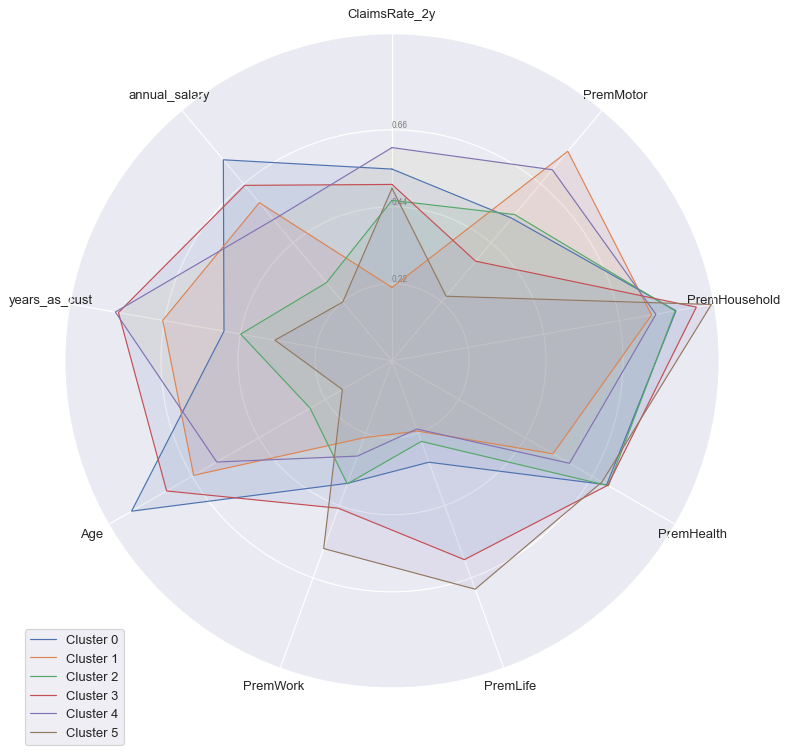

In [225]:
radar(df_for_vis)

In [226]:
df_for_vis

ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  PremLife  \
merged_labels                                                                  
0                   0.497971   0.483611       0.749002    0.643810  0.280332   
1                   0.190594   0.710458       0.684557    0.482888  0.194238   
2                   0.416772   0.495864       0.746733    0.649012  0.222776   
3                   0.458101   0.337816       0.802555    0.646867  0.549603   
4                   0.553791   0.647872       0.695942    0.532417  0.188587   
5                   0.448072   0.218884       0.842251    0.629603  0.631268   

               PremWork       Age  years_as_cust  annual_salary  
merged_labels                                                    
0              0.338616  0.781136       0.443193       0.681567  
1              0.212614  0.594933       0.604650       0.536232  
2              0.340152  0.245765       0.399234       0.264986  
3              0.407434  0.676041       0.721503       0.594911  
4              0.263393  0.525717       0.729804       0.478960  
5              0.518952  0.148943       0.308875       0.199119

In [227]:
df_original["merged_labels"] = df_["merged_labels"]
df_original.drop(["EducDeg", "GeoLivArea"], axis = 1, inplace = True)

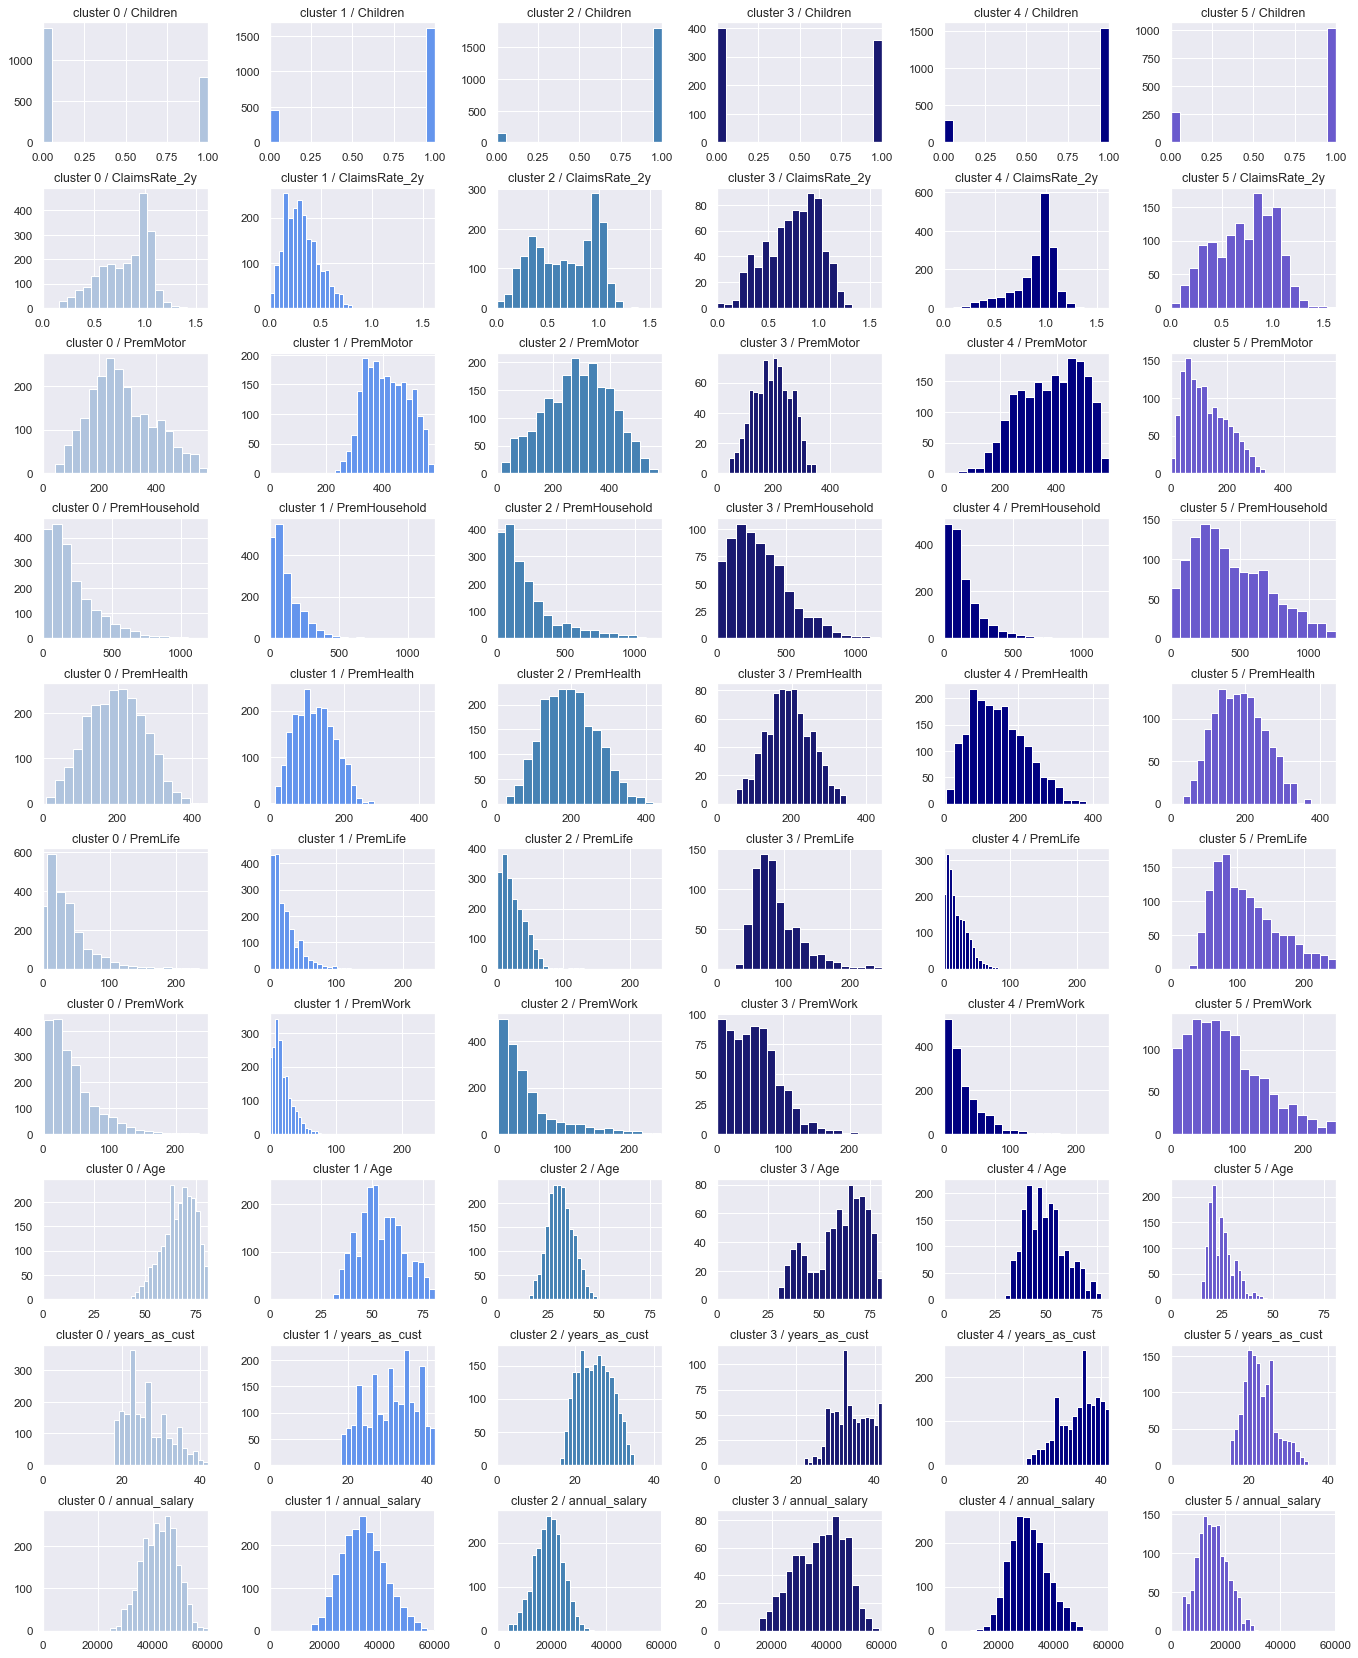

In [228]:
plot_hist(df_original, "merged_labels")

TO-DO IN THIS PART:
* append final clusters to original variables (non std) to get real values of mean etc and also categorical variables
* get mode and % for categorical
* umap 
* tsne 
* sshap


In [229]:
df_original_bp = df_original.drop("Children", axis = 1)

In [230]:
df_original_bp

ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  PremLife  \
CustID                                                                  
1                0.39     375.85          79.45      146.36     47.01   
2                1.12      77.46         416.20      116.69    194.48   
3                0.28     206.15         224.50      124.58     86.35   
4                0.99     182.48          43.35      311.17     35.34   
5                0.90     338.62          47.80      182.59     18.78   
...               ...        ...            ...         ...       ...   
10291            0.85       6.89         878.50      103.13    113.02   
10292            0.96     393.74          49.45      173.81      9.78   
10294            0.21     403.63         132.80      142.25     12.67   
10295            0.65     188.59         211.15      198.37     63.90   
10296            0.27     414.08          94.45      141.25      6.89   

        PremWork  Age  years_as_cust  annual_salary  merged_labels  
CustID                                                              
1          16.89   34             31          26124              1  
2         106.13   21             21           8124              5  
3          99.02   46             25          27324              3  
4          28.34   35             26          13188              2  
5          41.45   43             30          21156              4  
...          ...  ...            ...            ...            ...  
10291     201.26   17             17           7512              5  
10292      14.78   67             32          38256              0  
10294       4.89   40             22          35016              1  
10295     112.91   39             35          23652              3  
10296      12.89   35             26          33780              1  

[10101 rows x 10 columns]

In [231]:
df_original_bp.groupby('merged_labels').mean()[metric_features].T

merged_labels             0             1             2             3  \
ClaimsRate_2y      0.806712      0.308761      0.675171      0.742124   
PremMotor        280.896752    414.584167    288.117476    194.975156   
PremHousehold    193.691140     96.305806    201.671304    300.692084   
PremHealth       194.509786    120.213621    195.544638    191.610796   
PremLife          34.472404     18.967581     22.962226     88.788762   
PremWork          40.024596     15.702282     42.045881     53.711174   
Age               66.554945     54.265602     31.220460     59.618734   
years_as_cust     26.247711     30.667150     25.025575     33.857520   
annual_salary  42338.258242  34162.264151  18903.056777  37463.303430   

merged_labels             4             5  
ClaimsRate_2y      0.897141      0.725876  
PremMotor        377.700448    124.884851  
PremHousehold    116.285057    424.110581  
PremHealth       144.353771    184.708031  
PremLife          17.693969    112.871249  
PremWork          25.716045     82.209043  
Age               49.697347     24.830233  
years_as_cust     34.113698     22.682171  
annual_salary  30940.378993  15197.618605

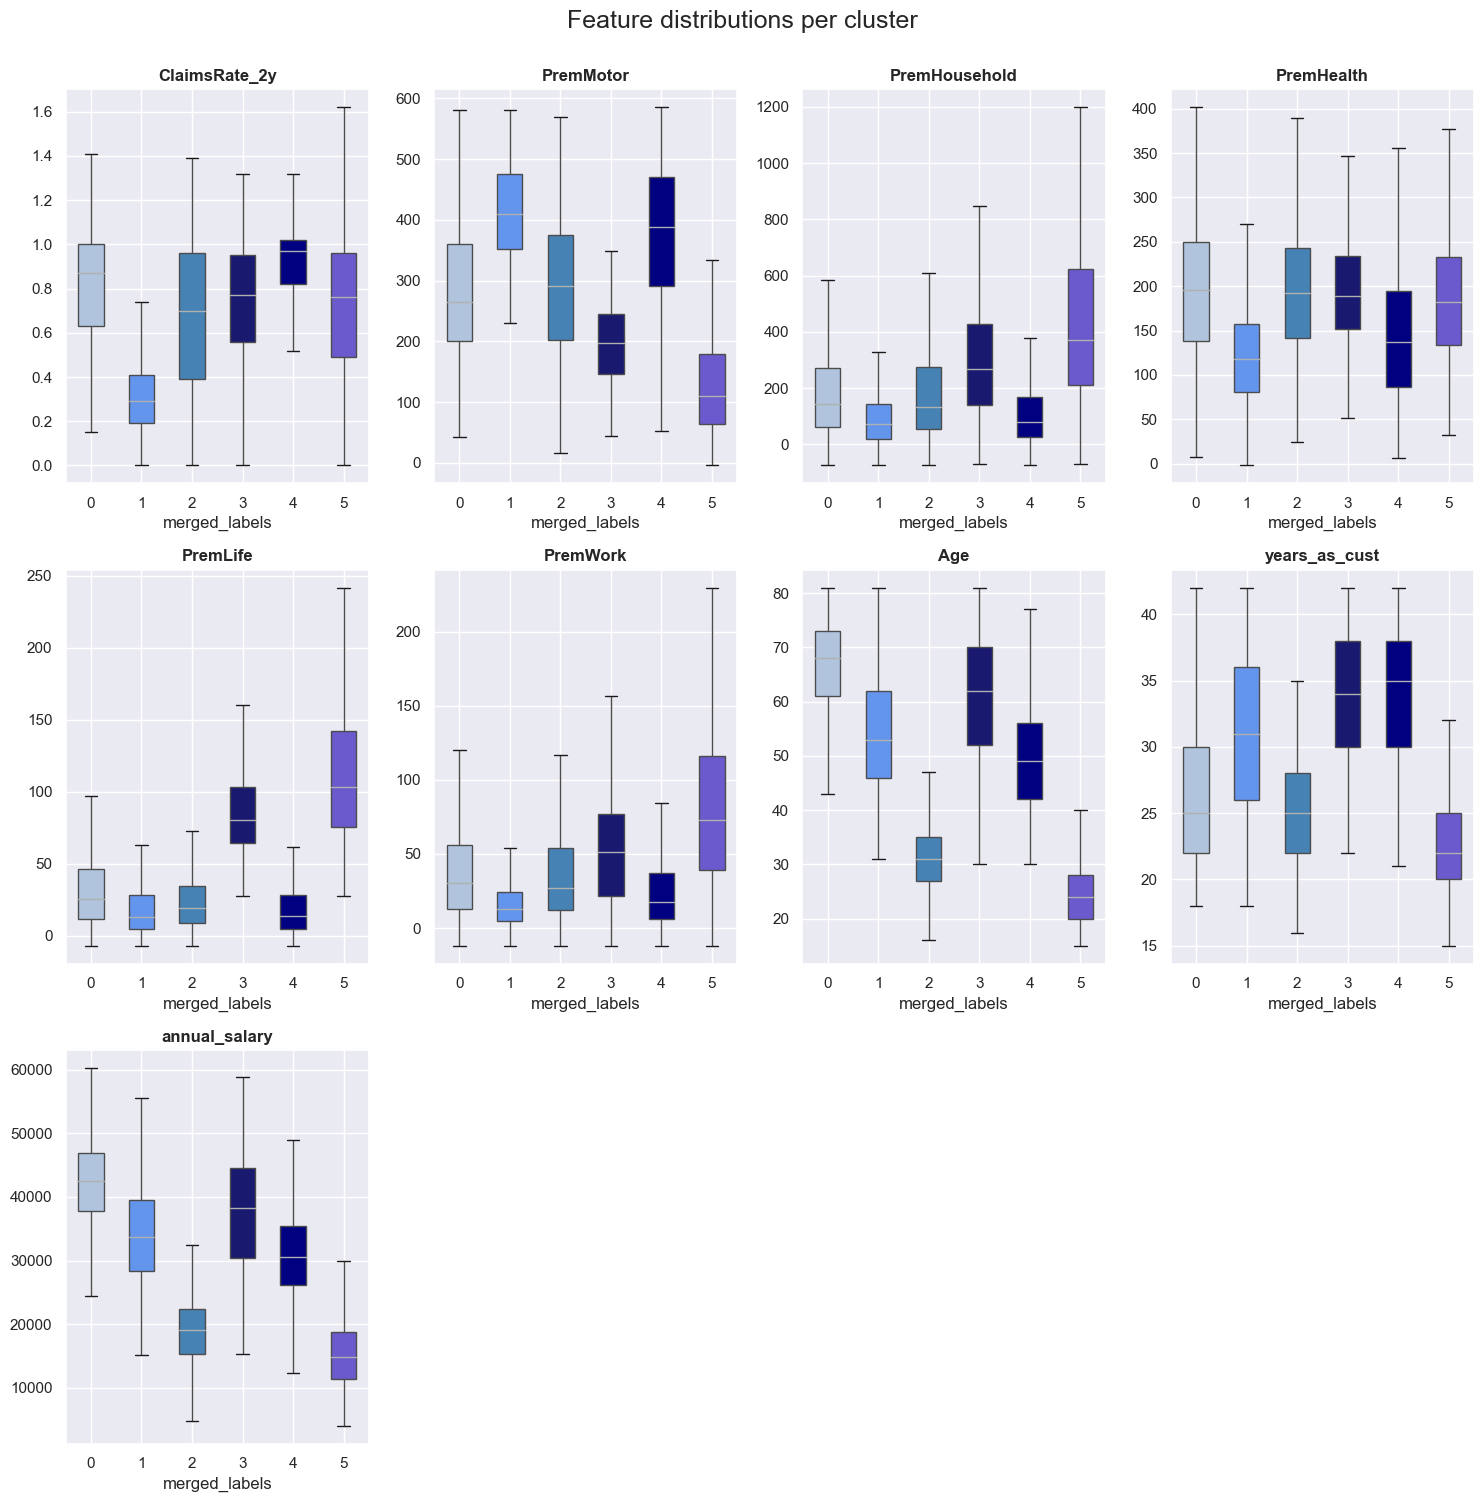

In [232]:
cluster_colors = [ "lightsteelblue", "cornflowerblue", "steelblue", "midnightblue", "navy", "slateblue", "darkslateblue"]
features = df_original_bp.drop("merged_labels", axis = 1).columns
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = df_original_bp[[feature, 'merged_labels']].boxplot(by='merged_labels',ax=ax,return_type='both',patch_artist = True, showfliers=False)

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('merged_labels')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
plt.tight_layout()
plt.show()

### UMAP

In [233]:
import umap.umap_ as umap
import umap.plot

def plot_umap(df, cluster_label_name):
    reducer = umap.UMAP()
    projected_data = reducer.fit_transform(df)
    umap.plot.points(reducer, labels=df[cluster_label_name], theme = "fire")

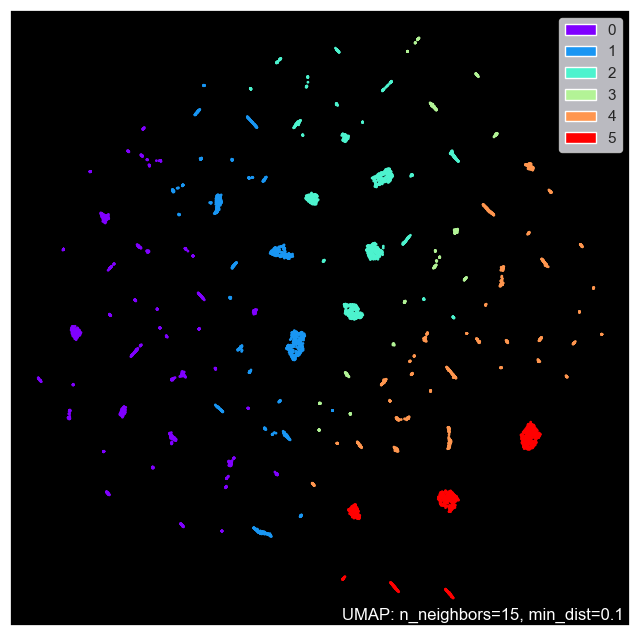

In [234]:
plot_umap(df_, "merged_labels")

### T-SNE

In [235]:
from sklearn.manifold import TSNE

In [244]:
df_

Children  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1              1       0.240741   0.644732       0.705788    0.565258   
2              1       0.691358   0.138411       0.866987    0.491779   
3              0       0.172840   0.356778       0.797974    0.512369   
4              1       0.611111   0.316614       0.668827    0.849789   
5              1       0.555556   0.581559       0.673947    0.642704   
...          ...            ...        ...            ...         ...   
10291          1       0.524691   0.018665       0.959618    0.454340   
10292          0       0.592593   0.675089       0.675799    0.624981   
10294          1       0.129630   0.691870       0.747054    0.555686   
10295          1       0.401235   0.326981       0.791618    0.673095   
10296          1       0.166667   0.709602       0.718672    0.553330   

        PremLife  PremWork       Age  years_as_cust  annual_salary  \
CustID                                                               
1       0.373616  0.229047  0.287879       0.623378       0.393345   
2       0.882790  0.643019  0.090909       0.245748       0.073379   
3       0.552933  0.618536  0.469697       0.401274       0.414676   
4       0.309203  0.300515  0.303030       0.439193       0.163396   
5       0.205143  0.373285  0.424242       0.587240       0.305034   
...          ...       ...       ...            ...            ...   
10291   0.651222  0.901395  0.030303       0.083672       0.062500   
10292   0.140668  0.214920  0.787879       0.659181       0.609002   
10294   0.162081  0.143999  0.378788       0.285223       0.551408   
10295   0.456759  0.665491  0.363636       0.764632       0.349403   
10296   0.118521  0.201984  0.303030       0.439193       0.529437   

        EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  value_labels  \
CustID                                                        
1                 1            0            0             2   
2                 1            0            0             0   
3                 0            0            0             0   
4                 0            1            0             1   
5                 0            1            0             3   
...             ...          ...          ...           ...   
10291             0            0            0             0   
10292             0            0            1             1   
10294             0            1            0             2   
10295             0            0            0             0   
10296             0            0            1             2   

        demographic_labels  merged_labels  
CustID                                     
1                        2              1  
2                        0              5  
3                        2              3  
4                        0              2  
5                        2              4  
...                    ...            ...  
10291                    0              5  
10292                    4              0  
10294                    2              1  
10295                    2              3  
10296                    2              1  

[10101 rows x 16 columns]

In [253]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df_)
df = pd.DataFrame()
df["cluster"] = df_["merged_labels"]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10101 samples in 0.000s...
[t-SNE] Computed neighbors for 10101 samples in 1.996s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10101
[t-SNE] Computed conditional probabilities for sample 2000 / 10101
[t-SNE] Computed conditional probabilities for sample 3000 / 10101
[t-SNE] Computed conditional probabilities for sample 4000 / 10101
[t-SNE] Computed conditional probabilities for sample 5000 / 10101
[t-SNE] Computed conditional probabilities for sample 6000 / 10101
[t-SNE] Computed conditional probabilities for sample 7000 / 10101
[t-SNE] Computed conditional probabilities for sample 8000 / 10101
[t-SNE] Computed conditional probabilities for sample 9000 / 10101
[t-SNE] Computed conditional probabilities for sample 10000 / 10101
[t-SNE] Computed conditional probabilities for sample 10101 / 10101
[t-SNE] Mean sigma: 0.172093
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.666874
[t-SNE] KL 

[Text(0.5, 1.0, 'T-SNE projection')]

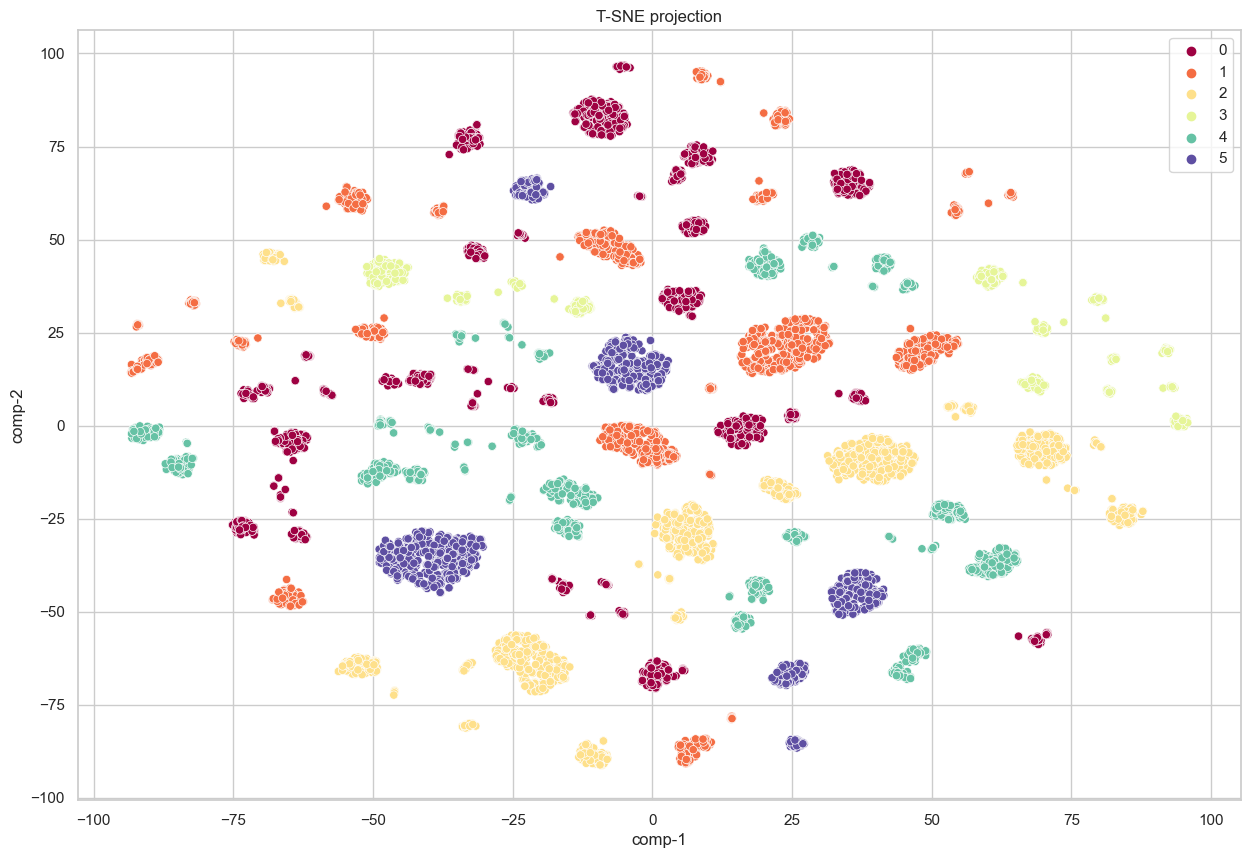

In [264]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,10), dpi = 100)
sns.scatterplot(x="comp-1", y="comp-2", hue=df.cluster.tolist(),
                palette="Spectral", data=df).set(title="T-SNE projection")

### SHAP

In [260]:
import shap

In [261]:
# felix
def sshap(X, cluster_labels):
    # Train a random forest model using X as training data
    model = RandomForestClassifier(random_state=0).fit(X, cluster_labels)

    # Create a SHAP explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    # Plot SHAP values for each cluster
    for i in range(np.unique(cluster_labels).sum()):
        shap.summary_plot(shap_values[i-1], X)


In [265]:
df_

Children  ClaimsRate_2y  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1              1       0.240741   0.644732       0.705788    0.565258   
2              1       0.691358   0.138411       0.866987    0.491779   
3              0       0.172840   0.356778       0.797974    0.512369   
4              1       0.611111   0.316614       0.668827    0.849789   
5              1       0.555556   0.581559       0.673947    0.642704   
...          ...            ...        ...            ...         ...   
10291          1       0.524691   0.018665       0.959618    0.454340   
10292          0       0.592593   0.675089       0.675799    0.624981   
10294          1       0.129630   0.691870       0.747054    0.555686   
10295          1       0.401235   0.326981       0.791618    0.673095   
10296          1       0.166667   0.709602       0.718672    0.553330   

        PremLife  PremWork       Age  years_as_cust  annual_salary  \
CustID                                                               
1       0.373616  0.229047  0.287879       0.623378       0.393345   
2       0.882790  0.643019  0.090909       0.245748       0.073379   
3       0.552933  0.618536  0.469697       0.401274       0.414676   
4       0.309203  0.300515  0.303030       0.439193       0.163396   
5       0.205143  0.373285  0.424242       0.587240       0.305034   
...          ...       ...       ...            ...            ...   
10291   0.651222  0.901395  0.030303       0.083672       0.062500   
10292   0.140668  0.214920  0.787879       0.659181       0.609002   
10294   0.162081  0.143999  0.378788       0.285223       0.551408   
10295   0.456759  0.665491  0.363636       0.764632       0.349403   
10296   0.118521  0.201984  0.303030       0.439193       0.529437   

        EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  value_labels  \
CustID                                                        
1                 1            0            0             2   
2                 1            0            0             0   
3                 0            0            0             0   
4                 0            1            0             1   
5                 0            1            0             3   
...             ...          ...          ...           ...   
10291             0            0            0             0   
10292             0            0            1             1   
10294             0            1            0             2   
10295             0            0            0             0   
10296             0            0            1             2   

        demographic_labels  merged_labels  
CustID                                     
1                        2              1  
2                        0              5  
3                        2              3  
4                        0              2  
5                        2              4  
...                    ...            ...  
10291                    0              5  
10292                    4              0  
10294                    2              1  
10295                    2              3  
10296                    2              1  

[10101 rows x 16 columns]

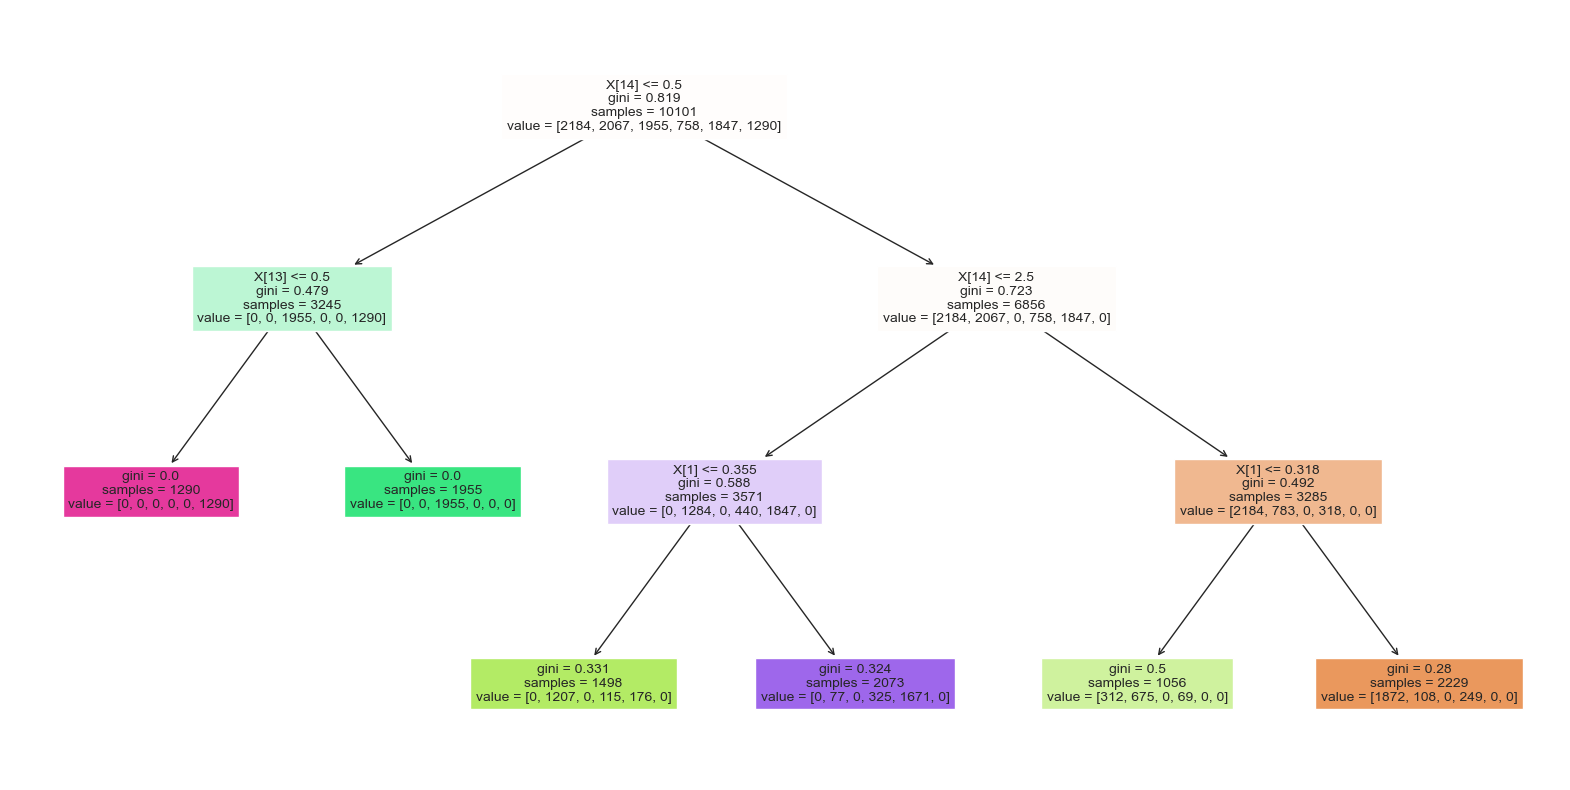

In [272]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

# Perform K-Means clustering
clusters = df_["merged_labels"]

# Train a decision tree on the cluster labels
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(df_.drop("merged_labels", axis = 1), clusters)

from sklearn.tree import plot_tree
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, fontsize=10)
plt.show()

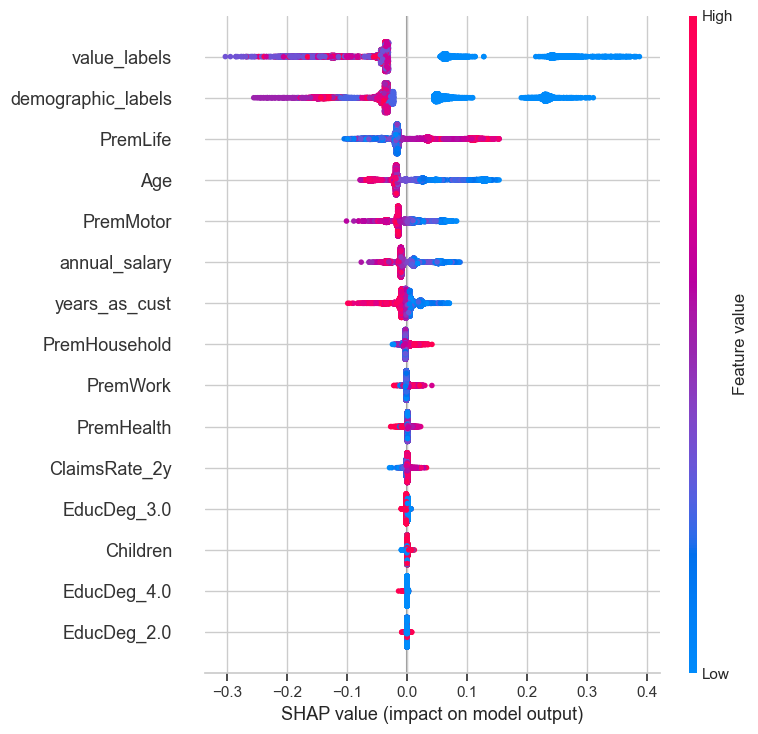

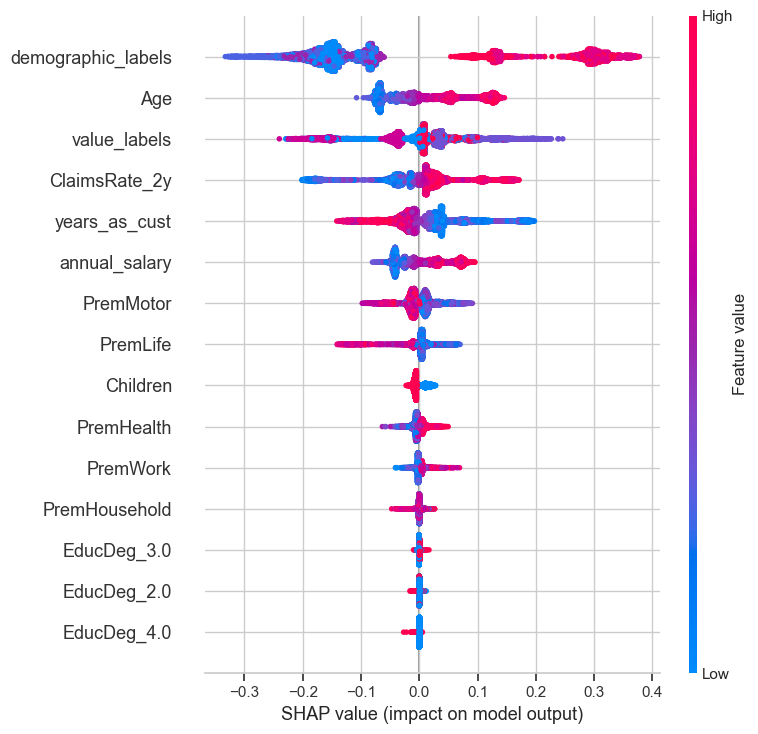

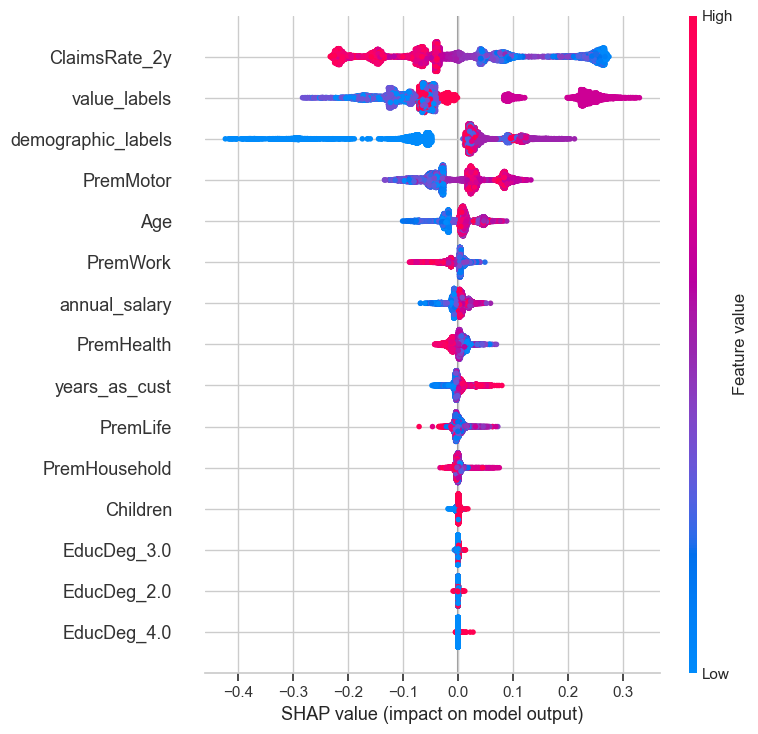

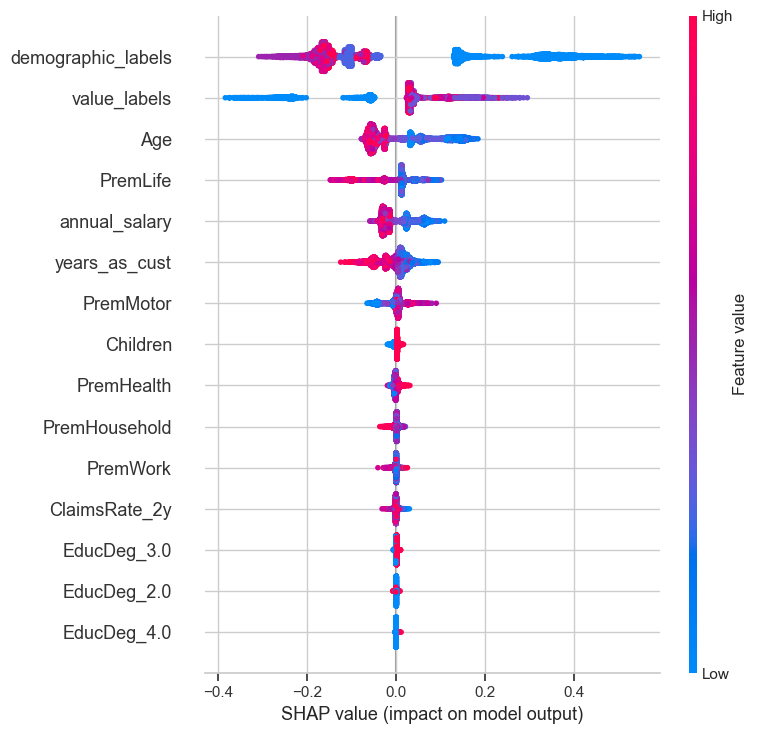

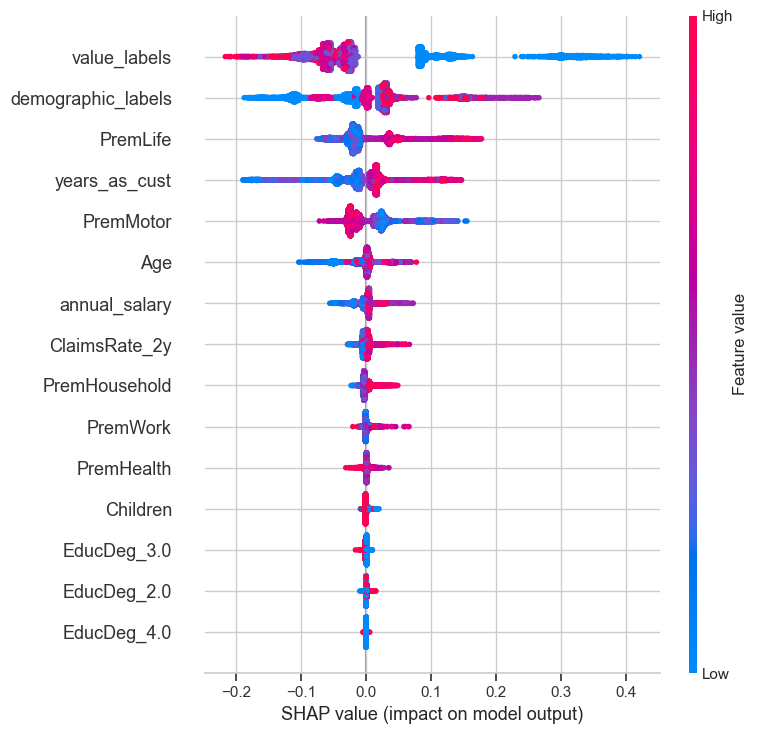

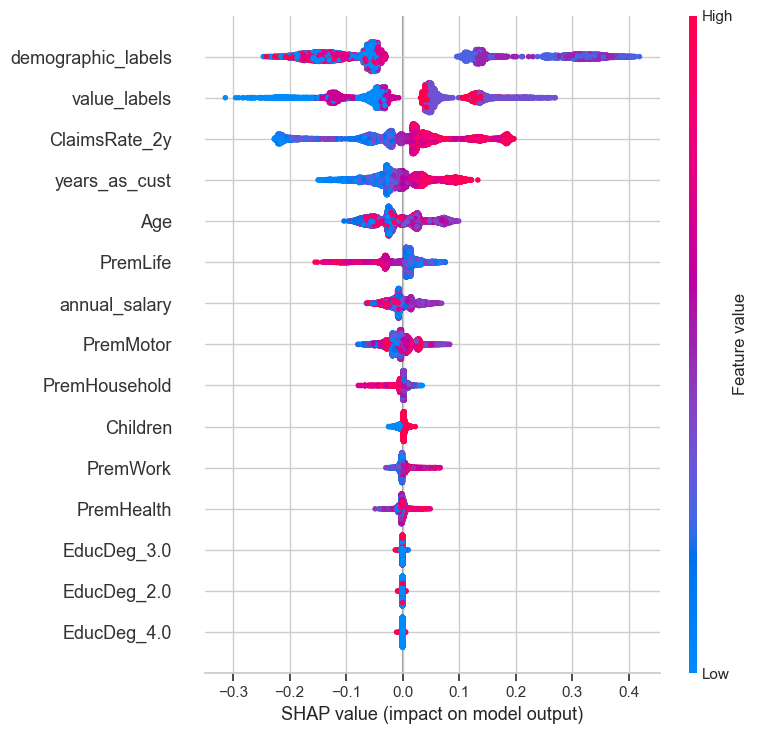

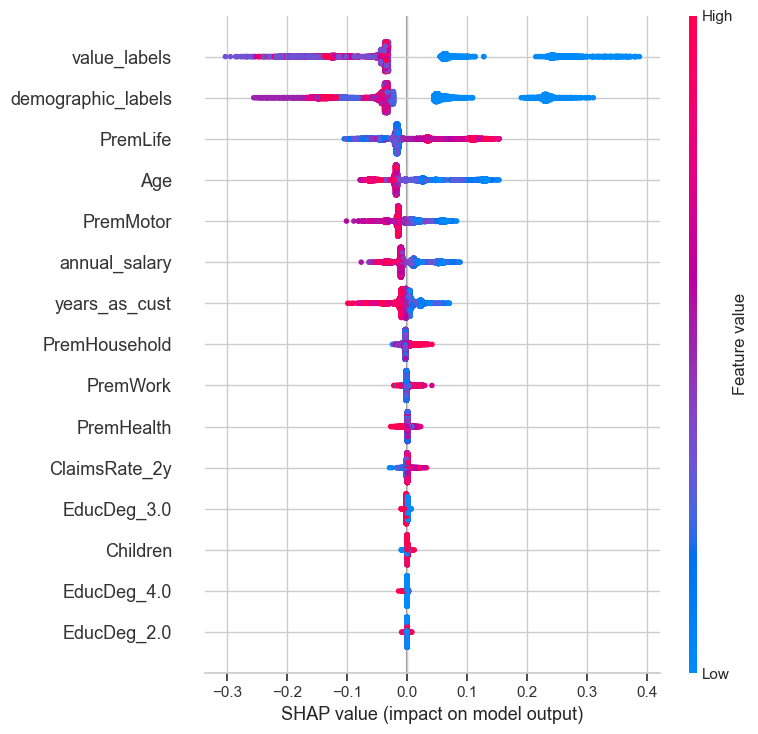

IndexError: list index out of range

In [263]:
sshap(df_.drop("merged_labels", axis = 1), df_["merged_labels"])

In [242]:
import sklearn, shap, matplotlib
# blobs, labels = sklearn.datasets.make_blobs(n_samples=[100,100,100], n_features=2,random_state=49)
# clusterer = sklearn.cluster.KMeans(n_clusters=3).fit(blobs)
# matplotlib.pyplot.scatter(blobs[:,0],blobs[:,1],s=6,c=clusterer.labels_); plt.show()
# explainer = shap.KernelExplainer(model=clusterer.predict,data=blobs)
# shap_values = explainer.shap_values(blobs)
# shap.initjs()
# shap.summary_plot(shap_values, blobs)


In [ ]:
# # data preparation, min max scaler: 

# value = df_kmeans.copy().values
# min_max_scaler = preprocessing.MinMaxScaler()
# scaled = min_max_scaler.fit_transform(value)
# df_kmeans_scaled = pd.DataFrame(scaled, columns=df_kmeans.columns)




# # explain cluster results with shap values:

# kmclust = KMeans(n_clusters=3)
# y=kmclust.fit(df_kmeans).labels_
# y = label_binarize(y, classes=[0,1,2])
# clf=RandomForestClassifier()
# clf.fit(df_kmeans,y)

# explainer = shap.TreeExplainer(clf)
# shap_values = explainer(df_kmeans).values
# shap.summary_plot(shap_values[0], df_kmeans) 


## 5. Cluster Interpretation


### a) Variance within variables and between clusters


scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_kmeans))
df_scaled['kmeans'] = kmeans.labels_
df_mean = (df_scaled.loc[df_scaled.kmeans!=-1, :]
                    .groupby('kmeans').mean())

df_mean

### b) Random Forest Feature Selection


 https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb

umap agorithm # visualization
t SNE only visualization 

classification tree
what are the most important variables & what are the ruules for classification ? 
